In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/catboost/catboost_model.pkl
/kaggle/input/kuc-hackathon-winter-2018/drugsComTest_raw.csv
/kaggle/input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv
/kaggle/input/xgbmodel/XGB_model.pkl


In [865]:
#!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [8]:
train = pd.read_csv("/kaggle/input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv")

In [9]:
train.head(15)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [11]:
text = ""
for val in train["condition"].value_counts().head(30).index:
    text = text + " " + val

In [870]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

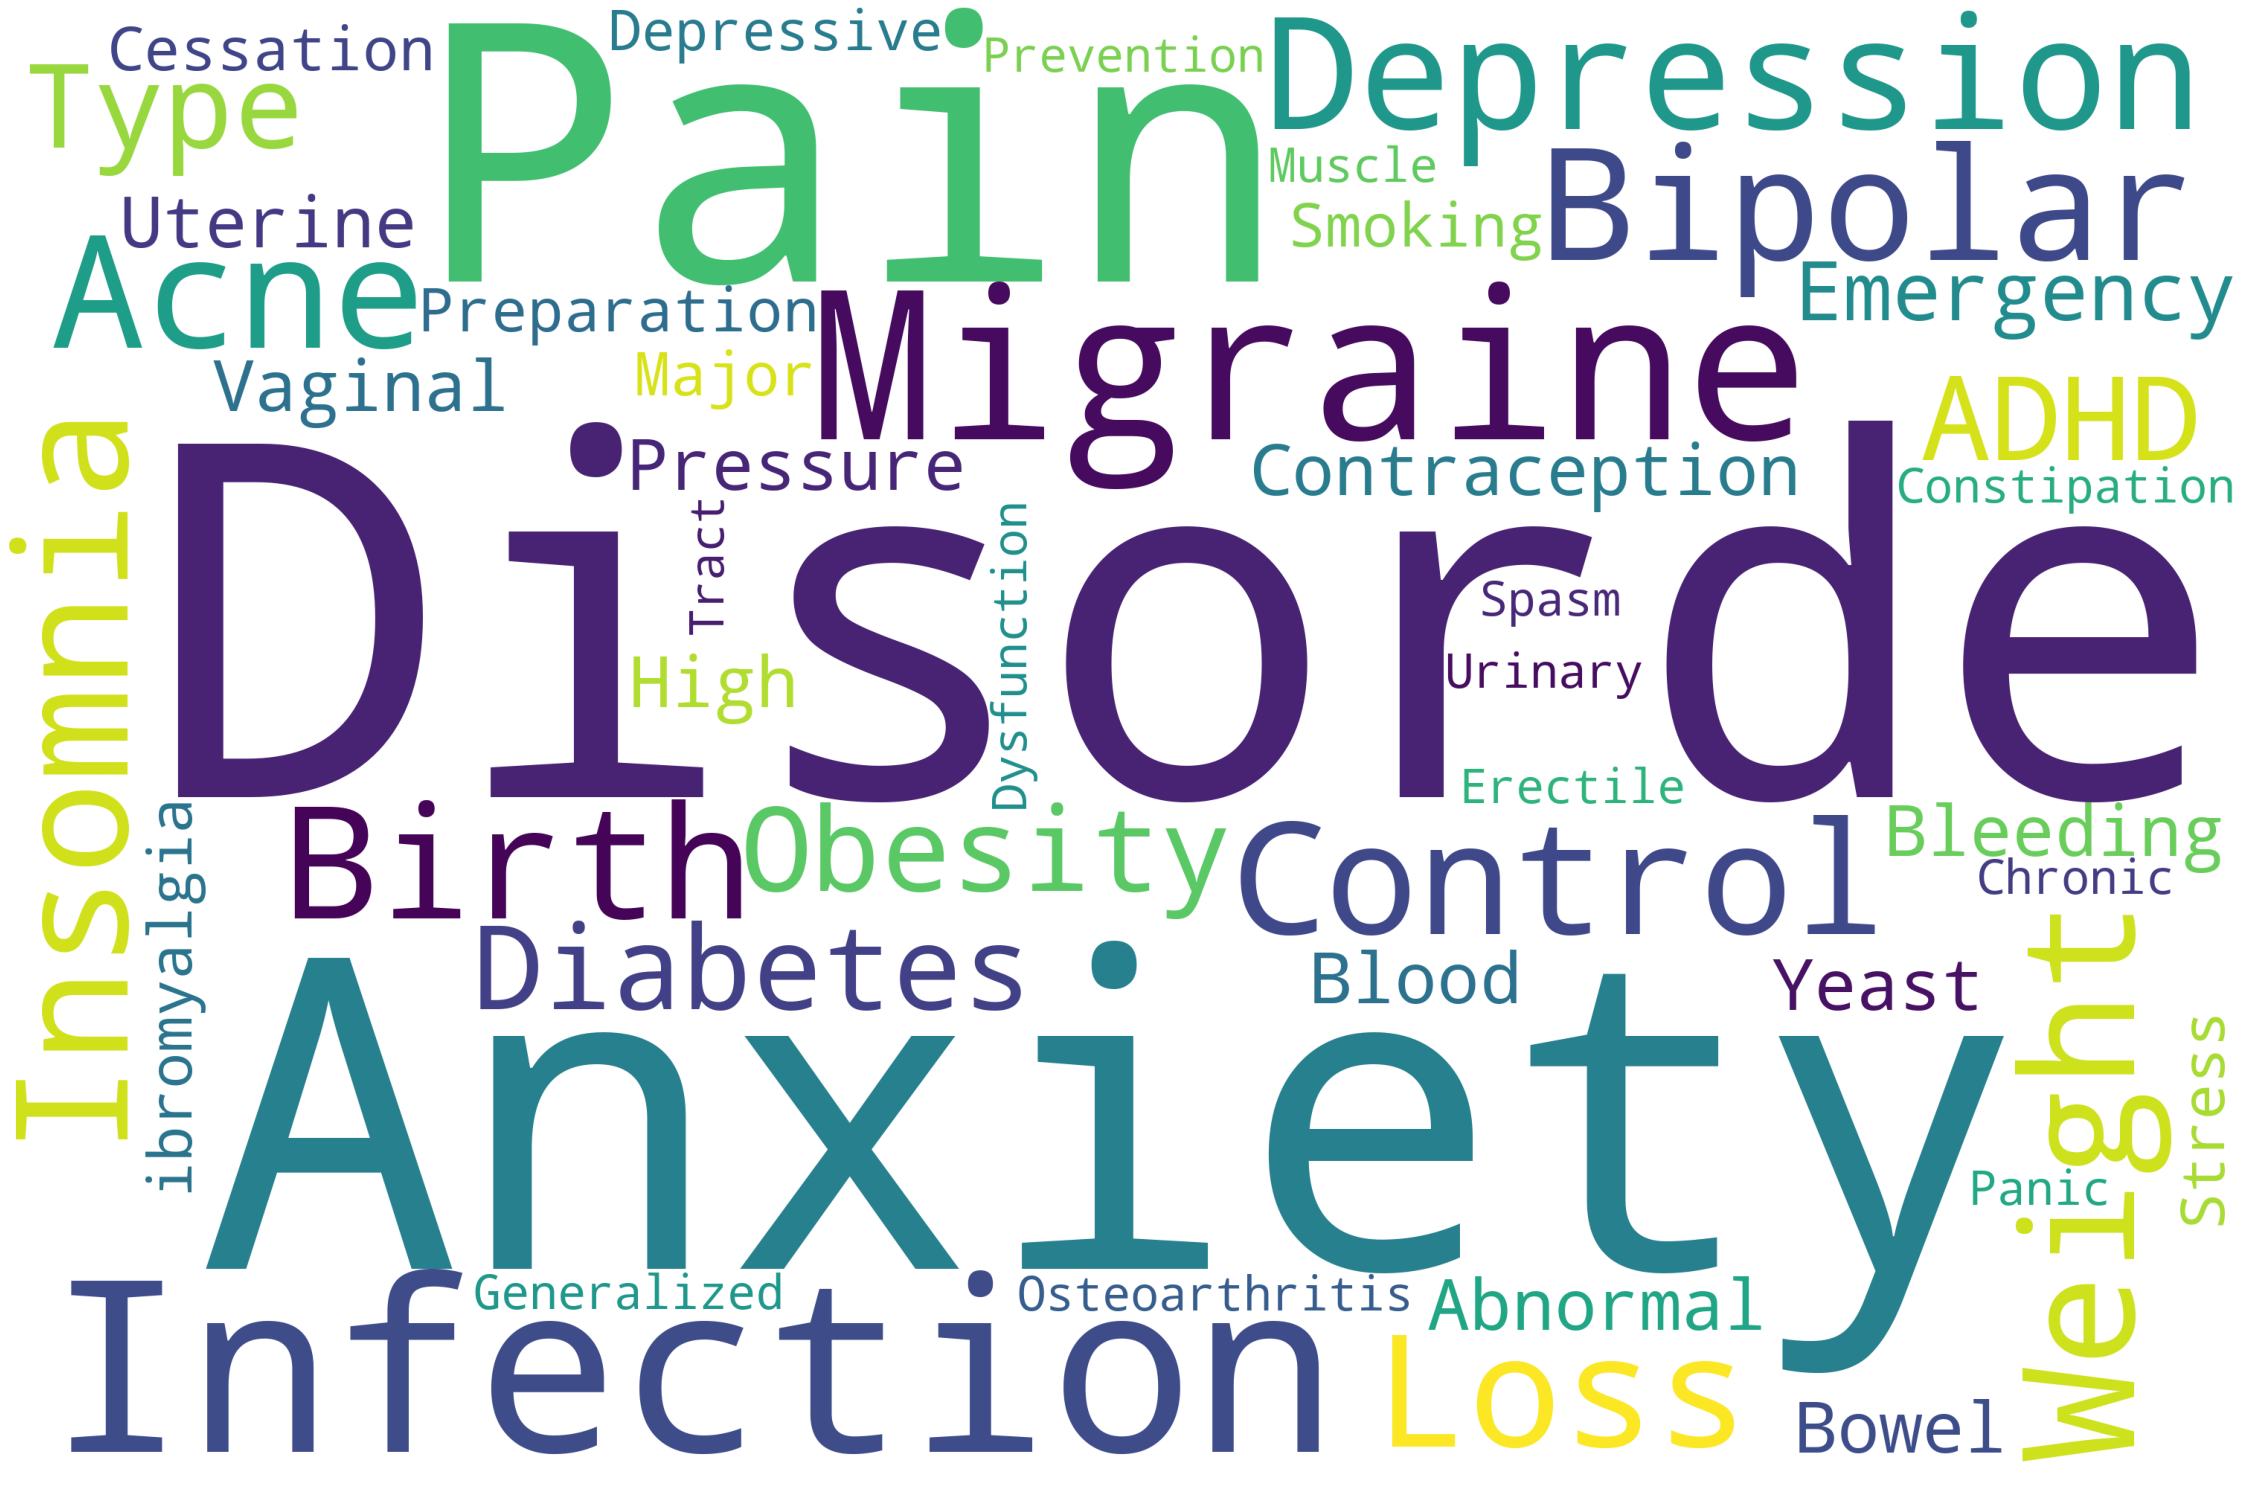

In [871]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', 
                      colormap='viridis', collocations=False).generate(text)
plot_cloud(wordcloud)

In [872]:
wordcloud.to_file('wordcloud_condition.png')

In [5]:
test = pd.read_csv("/kaggle/input/kuc-hackathon-winter-2018/drugsComTest_raw.csv")

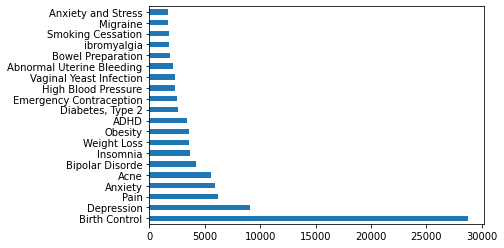

In [6]:
fig = train["condition"].value_counts().head(20).plot(kind='barh')
#fig.savefig('plot_drugs.pdf')

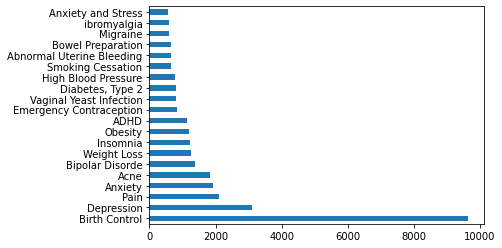

In [7]:
fig = test["condition"].value_counts().head(20).plot(kind='barh')

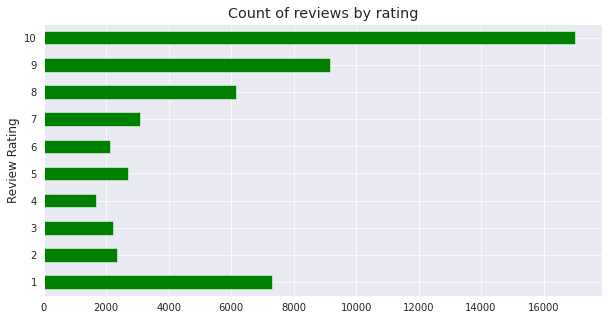

In [876]:
ax = test['rating'].value_counts().sort_index().plot(kind='barh',
                                                      title='Count of reviews by rating',
                                                      figsize=(10,5),
                                                      color='green')

ax.set_ylabel('Review Rating')
plt.show()

In [877]:
top_conditions = train["condition"].value_counts().head(20).index

In [878]:
top_conditions

Index(['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne',
       'Bipolar Disorde', 'Insomnia', 'Weight Loss', 'Obesity', 'ADHD',
       'Diabetes, Type 2', 'Emergency Contraception', 'High Blood Pressure',
       'Vaginal Yeast Infection', 'Abnormal Uterine Bleeding',
       'Bowel Preparation', 'ibromyalgia', 'Smoking Cessation', 'Migraine',
       'Anxiety and Stress'],
      dtype='object')

In [879]:
drugs = []
conditions = []
drug_to_condtion = {}
for val in top_conditions:
    print(train["drugName"][train["condition"] == val].mode()[0] + "---->" + val)
    drugs.append(train["drugName"][train["condition"] == val].mode()[0])
    conditions.append(val)
    drug_to_condtion[train["drugName"][train["condition"] == val].mode()[0]] = val

Etonogestrel---->Birth Control
Bupropion---->Depression
Tramadol---->Pain
Escitalopram---->Anxiety
Isotretinoin---->Acne
Lamotrigine---->Bipolar Disorde
Zolpidem---->Insomnia
Phentermine---->Weight Loss
Bupropion / naltrexone---->Obesity
Lisdexamfetamine---->ADHD
Liraglutide---->Diabetes, Type 2
Levonorgestrel---->Emergency Contraception
Lisinopril---->High Blood Pressure
Miconazole---->Vaginal Yeast Infection
Medroxyprogesterone---->Abnormal Uterine Bleeding
Magnesium sulfate / potassium sulfate / sodium sulfate---->Bowel Preparation
Pregabalin---->ibromyalgia
Varenicline---->Smoking Cessation
Sumatriptan---->Migraine
Citalopram---->Anxiety and Stress


In [880]:
conditions

['Birth Control',
 'Depression',
 'Pain',
 'Anxiety',
 'Acne',
 'Bipolar Disorde',
 'Insomnia',
 'Weight Loss',
 'Obesity',
 'ADHD',
 'Diabetes, Type 2',
 'Emergency Contraception',
 'High Blood Pressure',
 'Vaginal Yeast Infection',
 'Abnormal Uterine Bleeding',
 'Bowel Preparation',
 'ibromyalgia',
 'Smoking Cessation',
 'Migraine',
 'Anxiety and Stress']

In [881]:
drugs

['Etonogestrel',
 'Bupropion',
 'Tramadol',
 'Escitalopram',
 'Isotretinoin',
 'Lamotrigine',
 'Zolpidem',
 'Phentermine',
 'Bupropion / naltrexone',
 'Lisdexamfetamine',
 'Liraglutide',
 'Levonorgestrel',
 'Lisinopril',
 'Miconazole',
 'Medroxyprogesterone',
 'Magnesium sulfate / potassium sulfate / sodium sulfate',
 'Pregabalin',
 'Varenicline',
 'Sumatriptan',
 'Citalopram']

In [882]:
df = pd.DataFrame(data={"Drug":drugs, "Condition":conditions})

In [883]:
df

,Drug,Condition
0,Etonogestrel,Birth Control
1,Bupropion,Depression
2,Tramadol,Pain
3,Escitalopram,Anxiety
4,Isotretinoin,Acne
5,Lamotrigine,Bipolar Disorde
6,Zolpidem,Insomnia
7,Phentermine,Weight Loss
8,Bupropion / naltrexone,Obesity
9,Lisdexamfetamine,ADHD


In [884]:
train

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [885]:
test

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [886]:
train.dropna(inplace=True)
test.dropna(inplace=True)

# df

In [892]:
train

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


# More corelation between drugs and conditions

In [893]:
train["drugName"][train["condition"] == "Birth Control"].value_counts()

Etonogestrel                          3314
Ethinyl estradiol / norethindrone     2337
Nexplanon                             2149
Levonorgestrel                        2129
Ethinyl estradiol / levonorgestrel    1600
                                      ... 
Necon 7 / 7 / 7                          1
depo-subQ provera 104                    1
Loestrin 21 1.5 / 30                     1
Pirmella 1 / 35                          1
Amethyst                                 1
Name: drugName, Length: 172, dtype: int64

In [894]:
map_of_drugs = {}

In [895]:
for cond in train["condition"].unique():
    map_of_drugs[cond] = [(drug, apps) for drug,apps in tuple(zip(train["drugName"][train["condition"] == cond].value_counts().index, 
                                                                  train["drugName"][train["condition"] == cond].value_counts())) if apps > 50]

In [897]:
map_of_cond = {}

In [898]:
for drug in train["drugName"].unique():
    map_of_cond[drug] = [(drg, apps) for drg,apps in tuple(zip(train["condition"][train["drugName"] == drug].value_counts().index, 
                                                                  train["condition"][train["drugName"] == drug].value_counts()))]

In [900]:
to_drop = ('users found this comment helpful', 'Not Listed')

In [901]:
 train.loc[train["condition"].str.contains((to_drop[0]), case=False) | train["condition"].str.contains((to_drop[1]), case=False)]  #df.loc[df['Name'].str.contains("pokemon", case=False)]

,uniqueID,drugName,condition,review,rating,date,usefulCount
105,220696,Loestrin 24 Fe,2</span> users found this comment helpful.,"""I&#039;m 16 and I have been on Loestrin 24 f...",3,3-Nov-10,2
196,67383,Provera,4</span> users found this comment helpful.,"""I&#039;m 24 years old and have always had a p...",1,27-Mar-16,4
243,81588,Yaz,3</span> users found this comment helpful.,"""I took Yaz for a little over 2 years. From a...",3,1-Jun-10,3
264,132965,Loestrin 24 Fe,4</span> users found this comment helpful.,"""Took this pill for 1.) Acne and 2.) Birth Con...",2,24-Jun-14,4
391,91050,Norco,11</span> users found this comment helpful.,"""I have suffered with low back pain - 2 surger...",9,15-Mar-09,11
...,...,...,...,...,...,...,...
160899,209239,Geodon,7</span> users found this comment helpful.,"""I&#039;ve been taking Geodon for about a mont...",7,4-Feb-11,7
160900,197750,Desvenlafaxine,Not Listed / Othe,"""Has helped me more than any treatment in the ...",9,24-Jun-08,0
160921,96527,Neurontin,92</span> users found this comment helpful.,"""At 300mg 4x daily my pain was almost gone. """,9,8-Jul-13,92
161123,8606,Zolpidem,Not Listed / Othe,"""I have been on this generic Ambien for about ...",10,28-Jul-10,1


# Get from the maps info about meds and conditons

In [903]:
most_piopular_conditions = train["condition"].value_counts()[:15]

In [904]:
for cond in most_piopular_conditions.index:
    print(str(cond) + "\n")
    print(map_of_drugs[cond])
    print("\n")

Birth Control

[('Etonogestrel', 3314), ('Ethinyl estradiol / norethindrone', 2337), ('Nexplanon', 2149), ('Levonorgestrel', 2129), ('Ethinyl estradiol / levonorgestrel', 1600), ('Ethinyl estradiol / norgestimate', 1580), ('Implanon', 1095), ('Mirena', 965), ('Skyla', 822), ('Lo Loestrin Fe', 667), ('Ethinyl estradiol / etonogestrel', 631), ('NuvaRing', 620), ('Copper', 607), ('Drospirenone / ethinyl estradiol', 522), ('Medroxyprogesterone', 502), ('Desogestrel / ethinyl estradiol', 494), ('Depo-Provera', 479), ('Sprintec', 432), ('Ethinyl estradiol / norelgestromin', 373), ('ParaGard', 368), ('Norethindrone', 338), ('Microgestin Fe 1 / 20', 323), ('Loestrin 24 Fe', 276), ('Tri-Sprintec', 257), ('Aviane', 219), ('Ortho Evra', 219), ('Apri', 210), ('Liletta', 209), ('Lutera', 195), ('TriNessa', 191), ('Yaz', 188), ('Ortho Tri-Cyclen Lo', 179), ('Junel Fe 1 / 20', 174), ('Xulane', 159), ('Minastrin 24 Fe', 156), ('Gildess Fe 1 / 20', 153), ('Kyleena', 151), ('Orsythia', 143), ('Seasoniqu

In [905]:
most_popular_drugs = train["drugName"].value_counts()[:15]

In [906]:
for drug in most_popular_drugs.index:
    print(str(drug) + "\n")
    print(map_of_cond[drug])
    print("\n")

Levonorgestrel

[('Birth Control', 2129), ('Emergency Contraception', 1221), ('Abnormal Uterine Bleeding', 276), ('Not Listed / Othe', 5)]


Etonogestrel

[('Birth Control', 3314), ('Endometriosis', 7)]


Ethinyl estradiol / norethindrone

[('Birth Control', 2337), ('Acne', 129), ('Menstrual Disorders', 93), ('Abnormal Uterine Bleeding', 85), ('Polycystic Ovary Syndrome', 53), ('Endometriosis', 43), ('Postmenopausal Symptoms', 5), ('Not Listed / Othe', 5)]


Nexplanon

[('Birth Control', 2149), ('8</span> users found this comment helpful.', 2), ('2</span> users found this comment helpful.', 1), ('4</span> users found this comment helpful.', 1), ('9</span> users found this comment helpful.', 1), ('3</span> users found this comment helpful.', 1), ('1</span> users found this comment helpful.', 1)]


Ethinyl estradiol / norgestimate

[('Birth Control', 1580), ('Acne', 215), ('Abnormal Uterine Bleeding', 148), ('Ovarian Cysts', 54), ('Endometriosis', 34), ('Not Listed / Othe', 2)]


Ethinyl

# Most of the popular drugs treat the most popular condition:Birth Control

# Corelation between rating and usefullness

In [907]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style; style.use('ggplot')

In [908]:
use_ls = []

for i in range(1, 11):
    use_ls.append([i, np.sum(train[train.rating == i].usefulCount) / np.sum([train.rating == i])])
    
use_arr = np.asarray(use_ls)

-get corelation between rating and usefulness

-get corelation between rating and popular drugs

-get corelation between rating and conditon

-get between rating and most popular pairs of drug/corelation and least popular

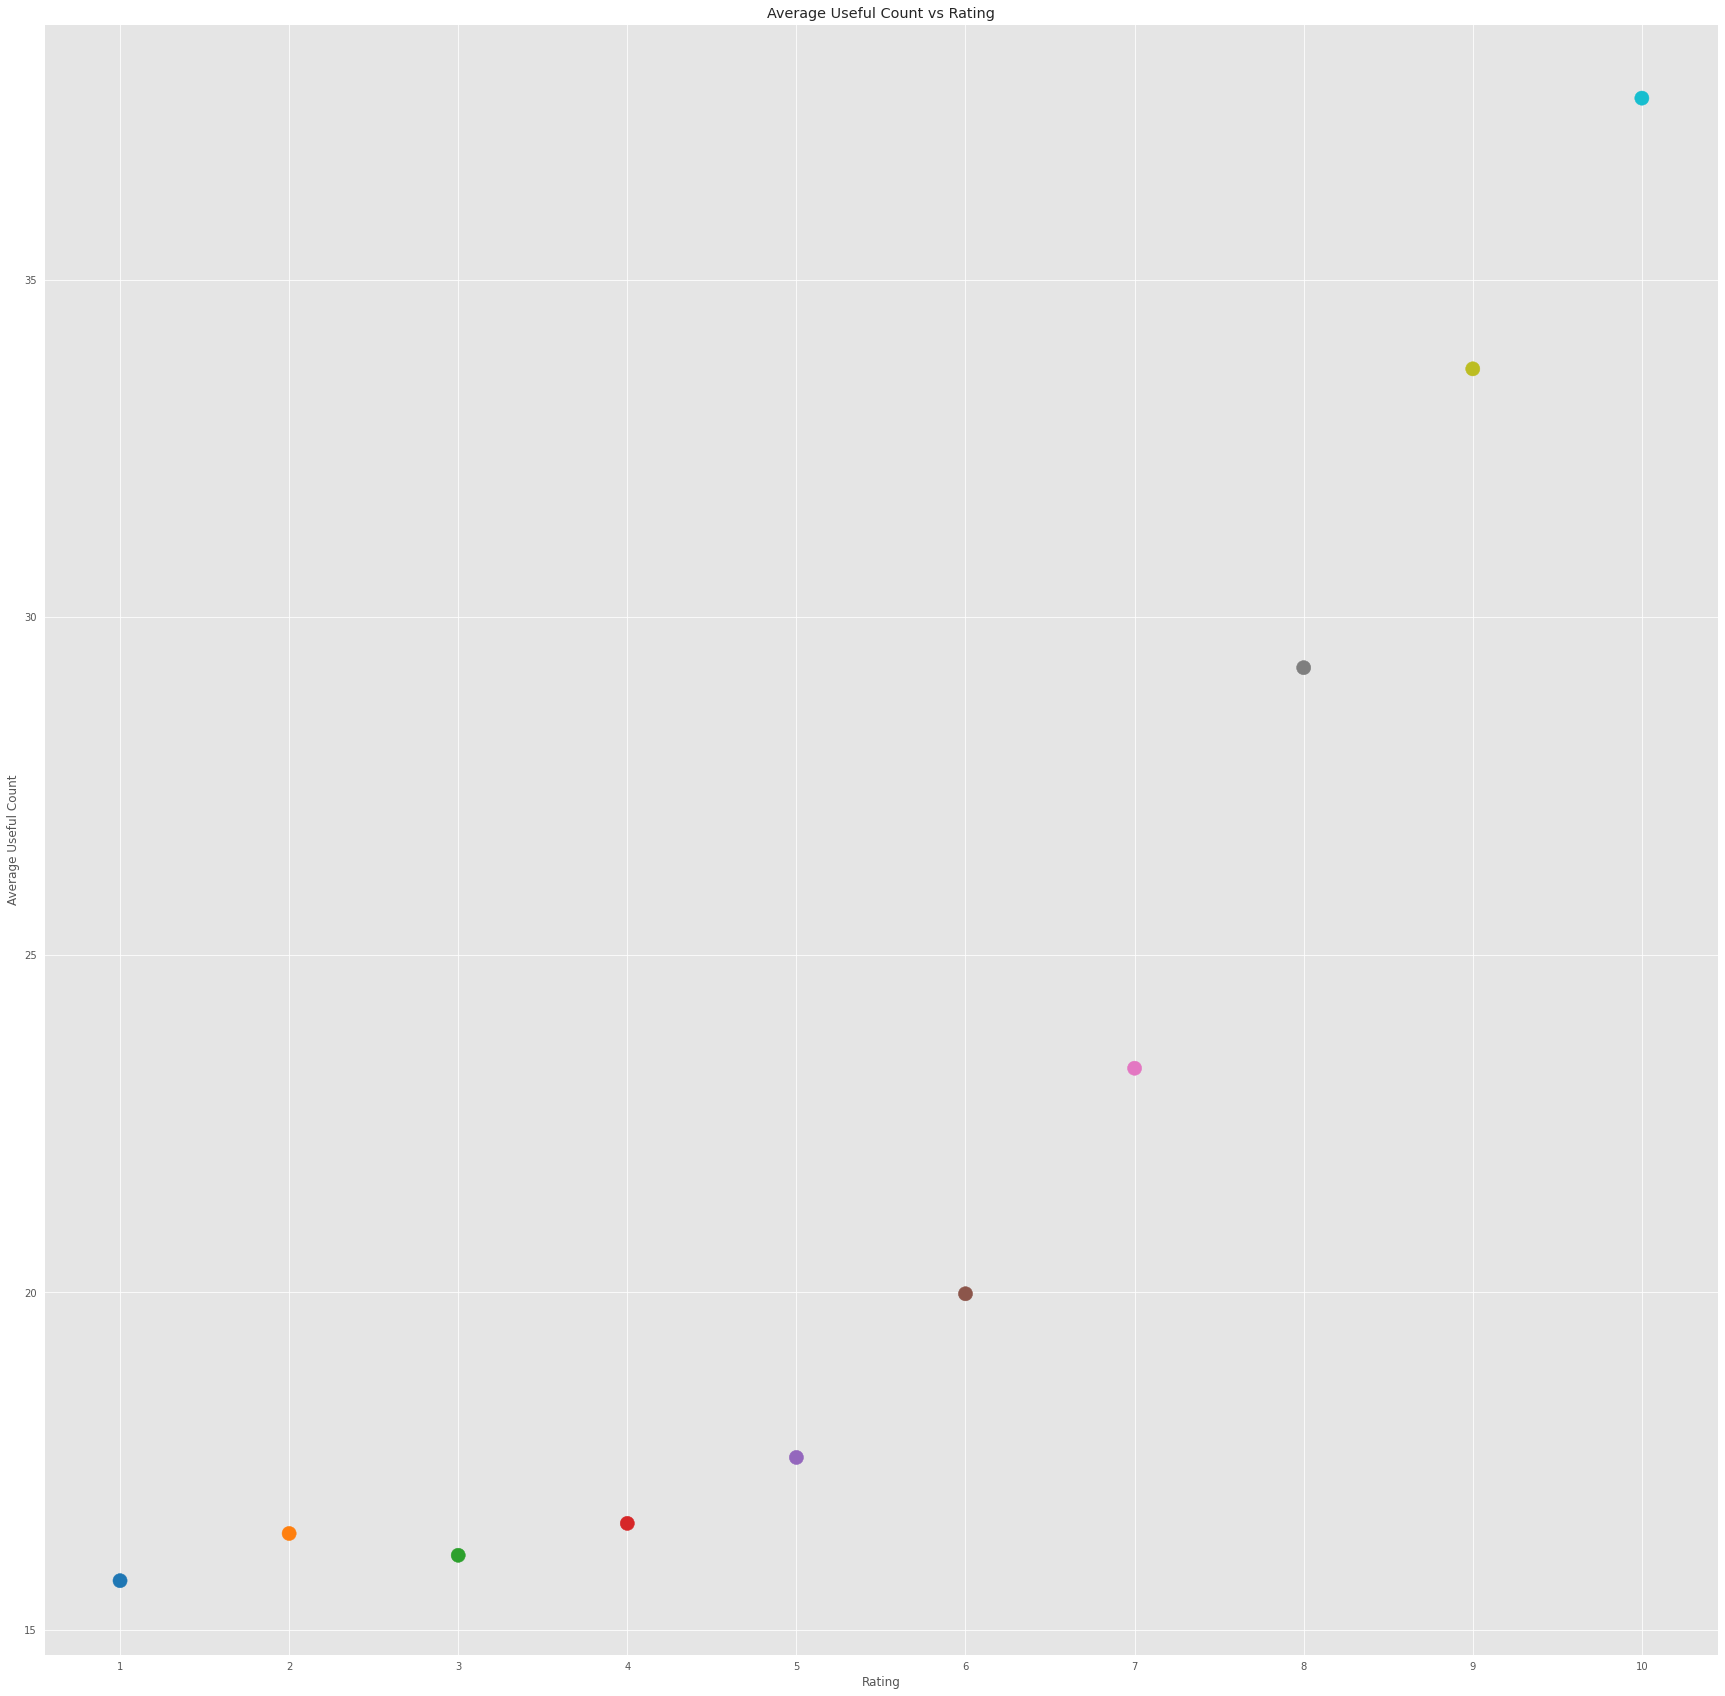

In [910]:
plt.scatter(use_arr[:, 0], use_arr[:, 1], c=use_arr[:, 0], cmap='tab10', s=200)
plt.title('Average Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Average Useful Count')
plt.xticks([i for i in range(1, 11)]);

# The bigger the rating, more usefull the review is

In [911]:
most_popular_drugs.index

Index(['Levonorgestrel', 'Etonogestrel', 'Ethinyl estradiol / norethindrone',
       'Nexplanon', 'Ethinyl estradiol / norgestimate',
       'Ethinyl estradiol / levonorgestrel', 'Phentermine', 'Sertraline',
       'Escitalopram', 'Mirena', 'Implanon', 'Gabapentin', 'Bupropion',
       'Venlafaxine', 'Miconazole'],
      dtype='object')

In [912]:
avg_rating_for_most_popular_drugs = [train['rating'][train["drugName"] == drug].mean() for drug in most_popular_drugs.index]

In [913]:
avg_rating_for_most_popular_drugs

[7.403470118424677,
 5.80517916290274,
 5.589090909090909,
 5.6730055658627085,
 5.8362026561731435,
 5.798783858485351,
 8.78218465539662,
 7.492239467849224,
 7.846930846930847,
 6.587761674718196,
 6.078039927404719,
 7.436660268714012,
 7.442477876106195,
 6.7895256916996045,
 3.0250501002004007]

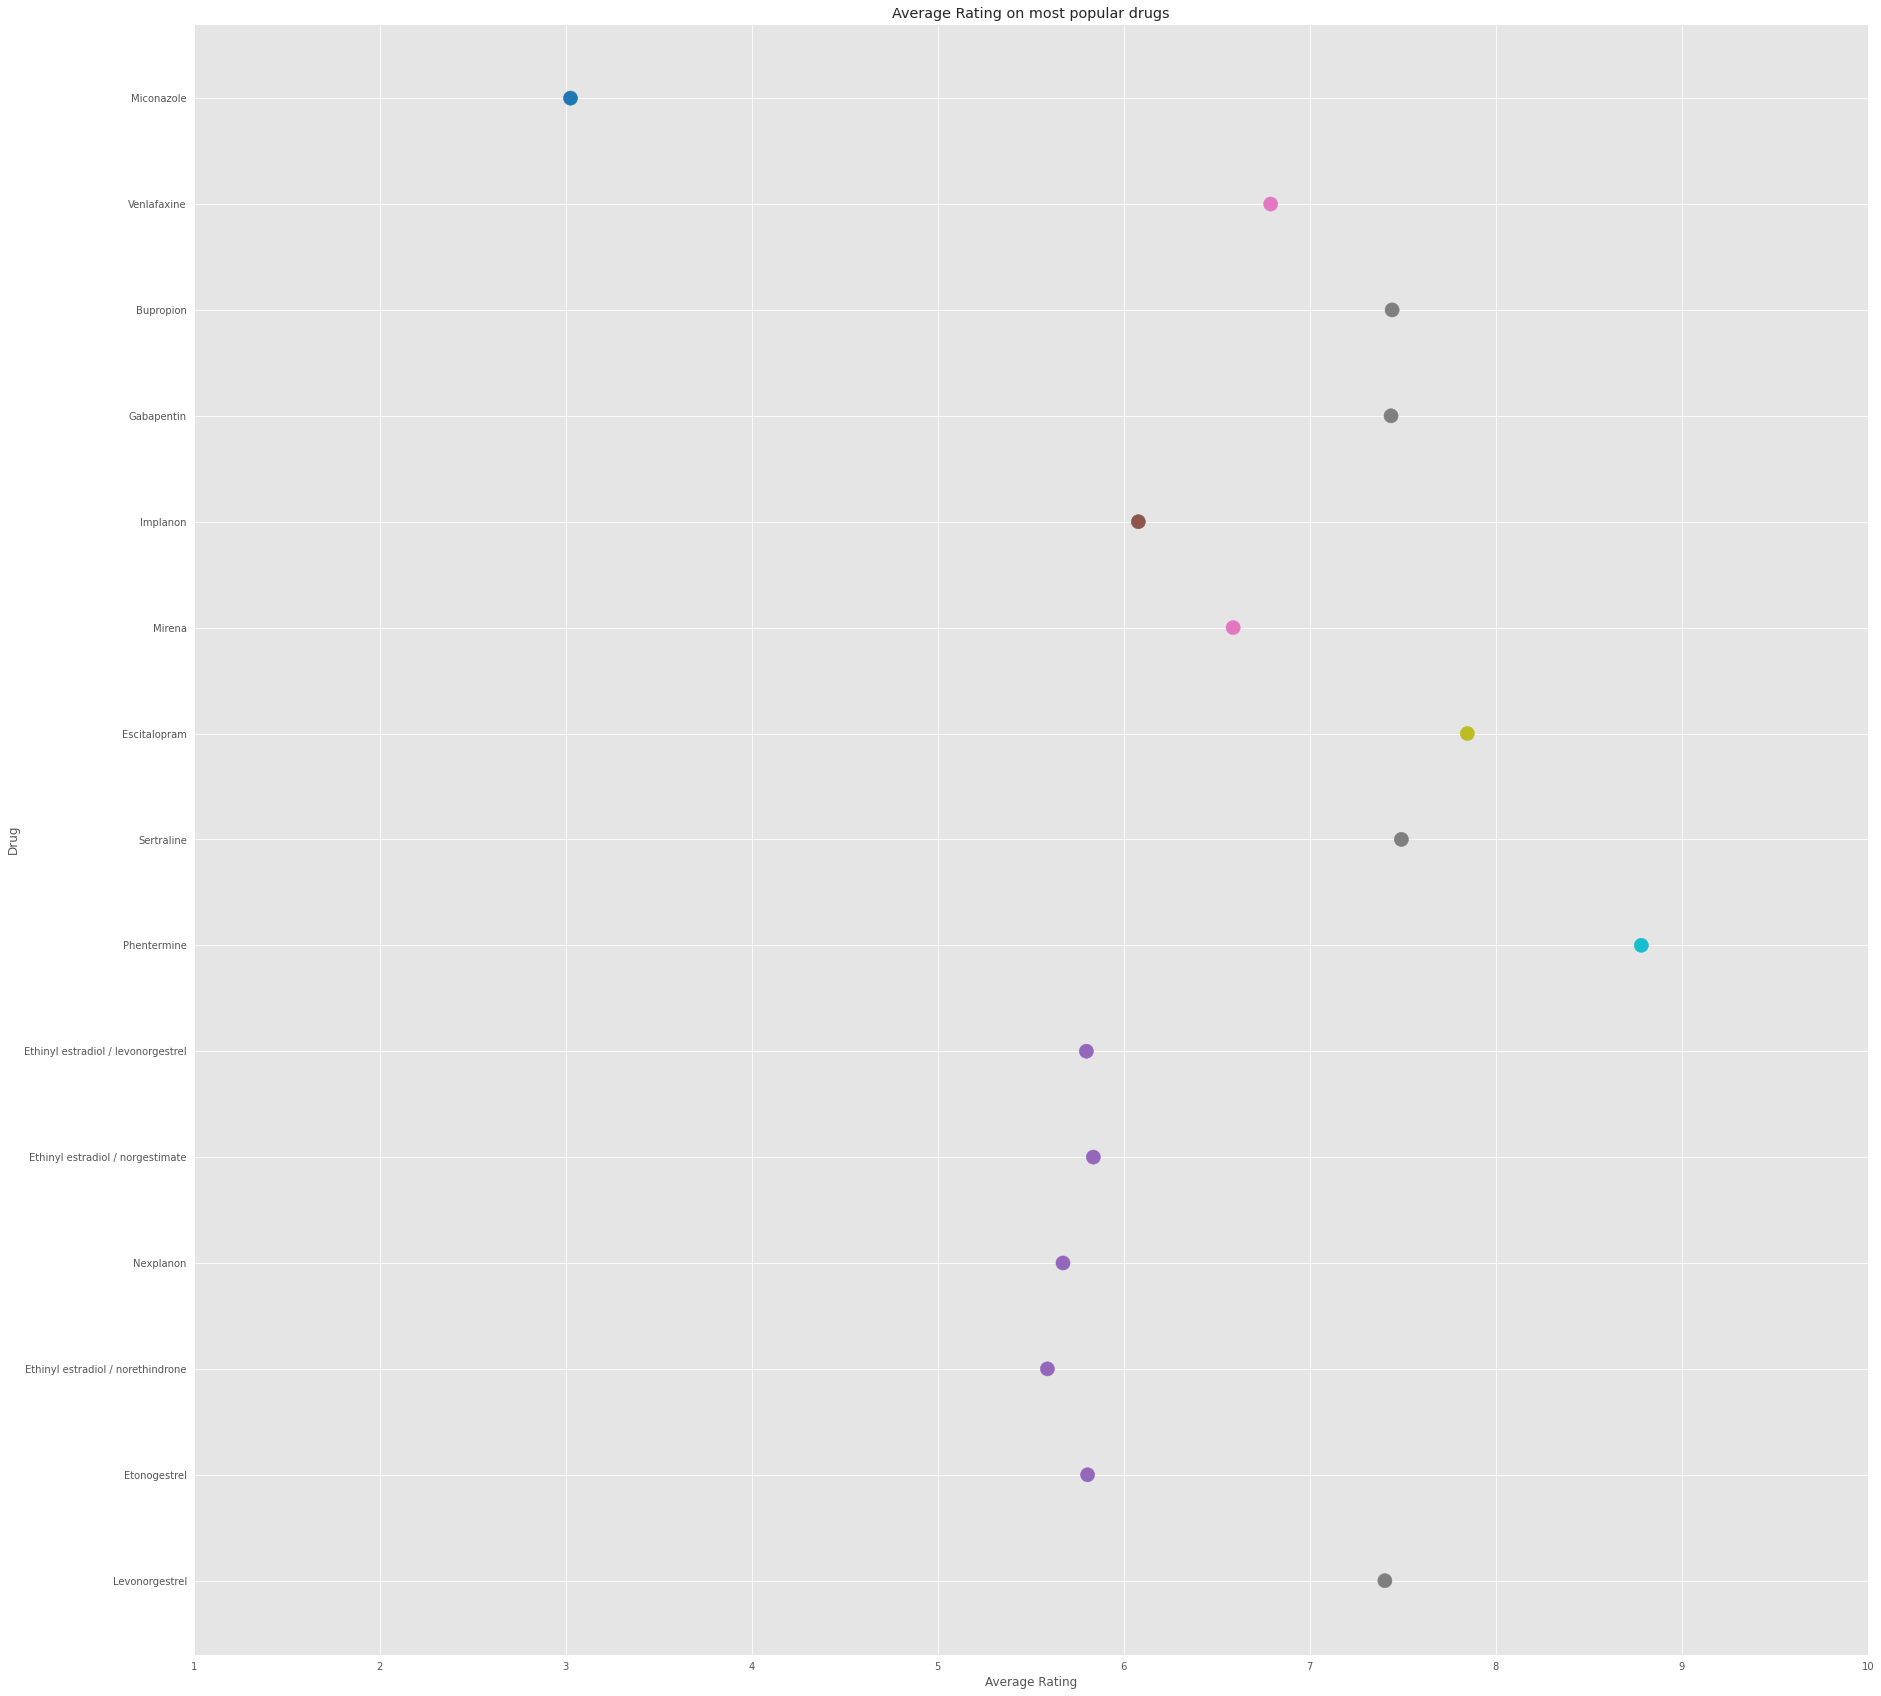

In [914]:
plt.scatter(avg_rating_for_most_popular_drugs, most_popular_drugs.index , c=avg_rating_for_most_popular_drugs, cmap='tab10', s=200)
plt.title('Average Rating on most popular drugs')
plt.xlabel('Average Rating')
plt.ylabel('Drug')
plt.xticks([i for i in range(1, 11)]);

In [915]:
avg_usefulness_for_most_popular_drugs = [train['usefulCount'][train["drugName"] == drug].mean() for drug in most_popular_drugs.index]

In [916]:
avg_usefulness_for_most_popular_drugs

[10.082071054805839,
 6.5904847937368265,
 7.710181818181818,
 5.963821892393321,
 8.307919331037874,
 7.0563847429519075,
 30.20546163849155,
 42.90761271249076,
 40.61072261072261,
 14.568438003220612,
 7.942831215970962,
 53.701535508637235,
 49.538839724680436,
 33.60770750988142,
 6.3216432865731464]

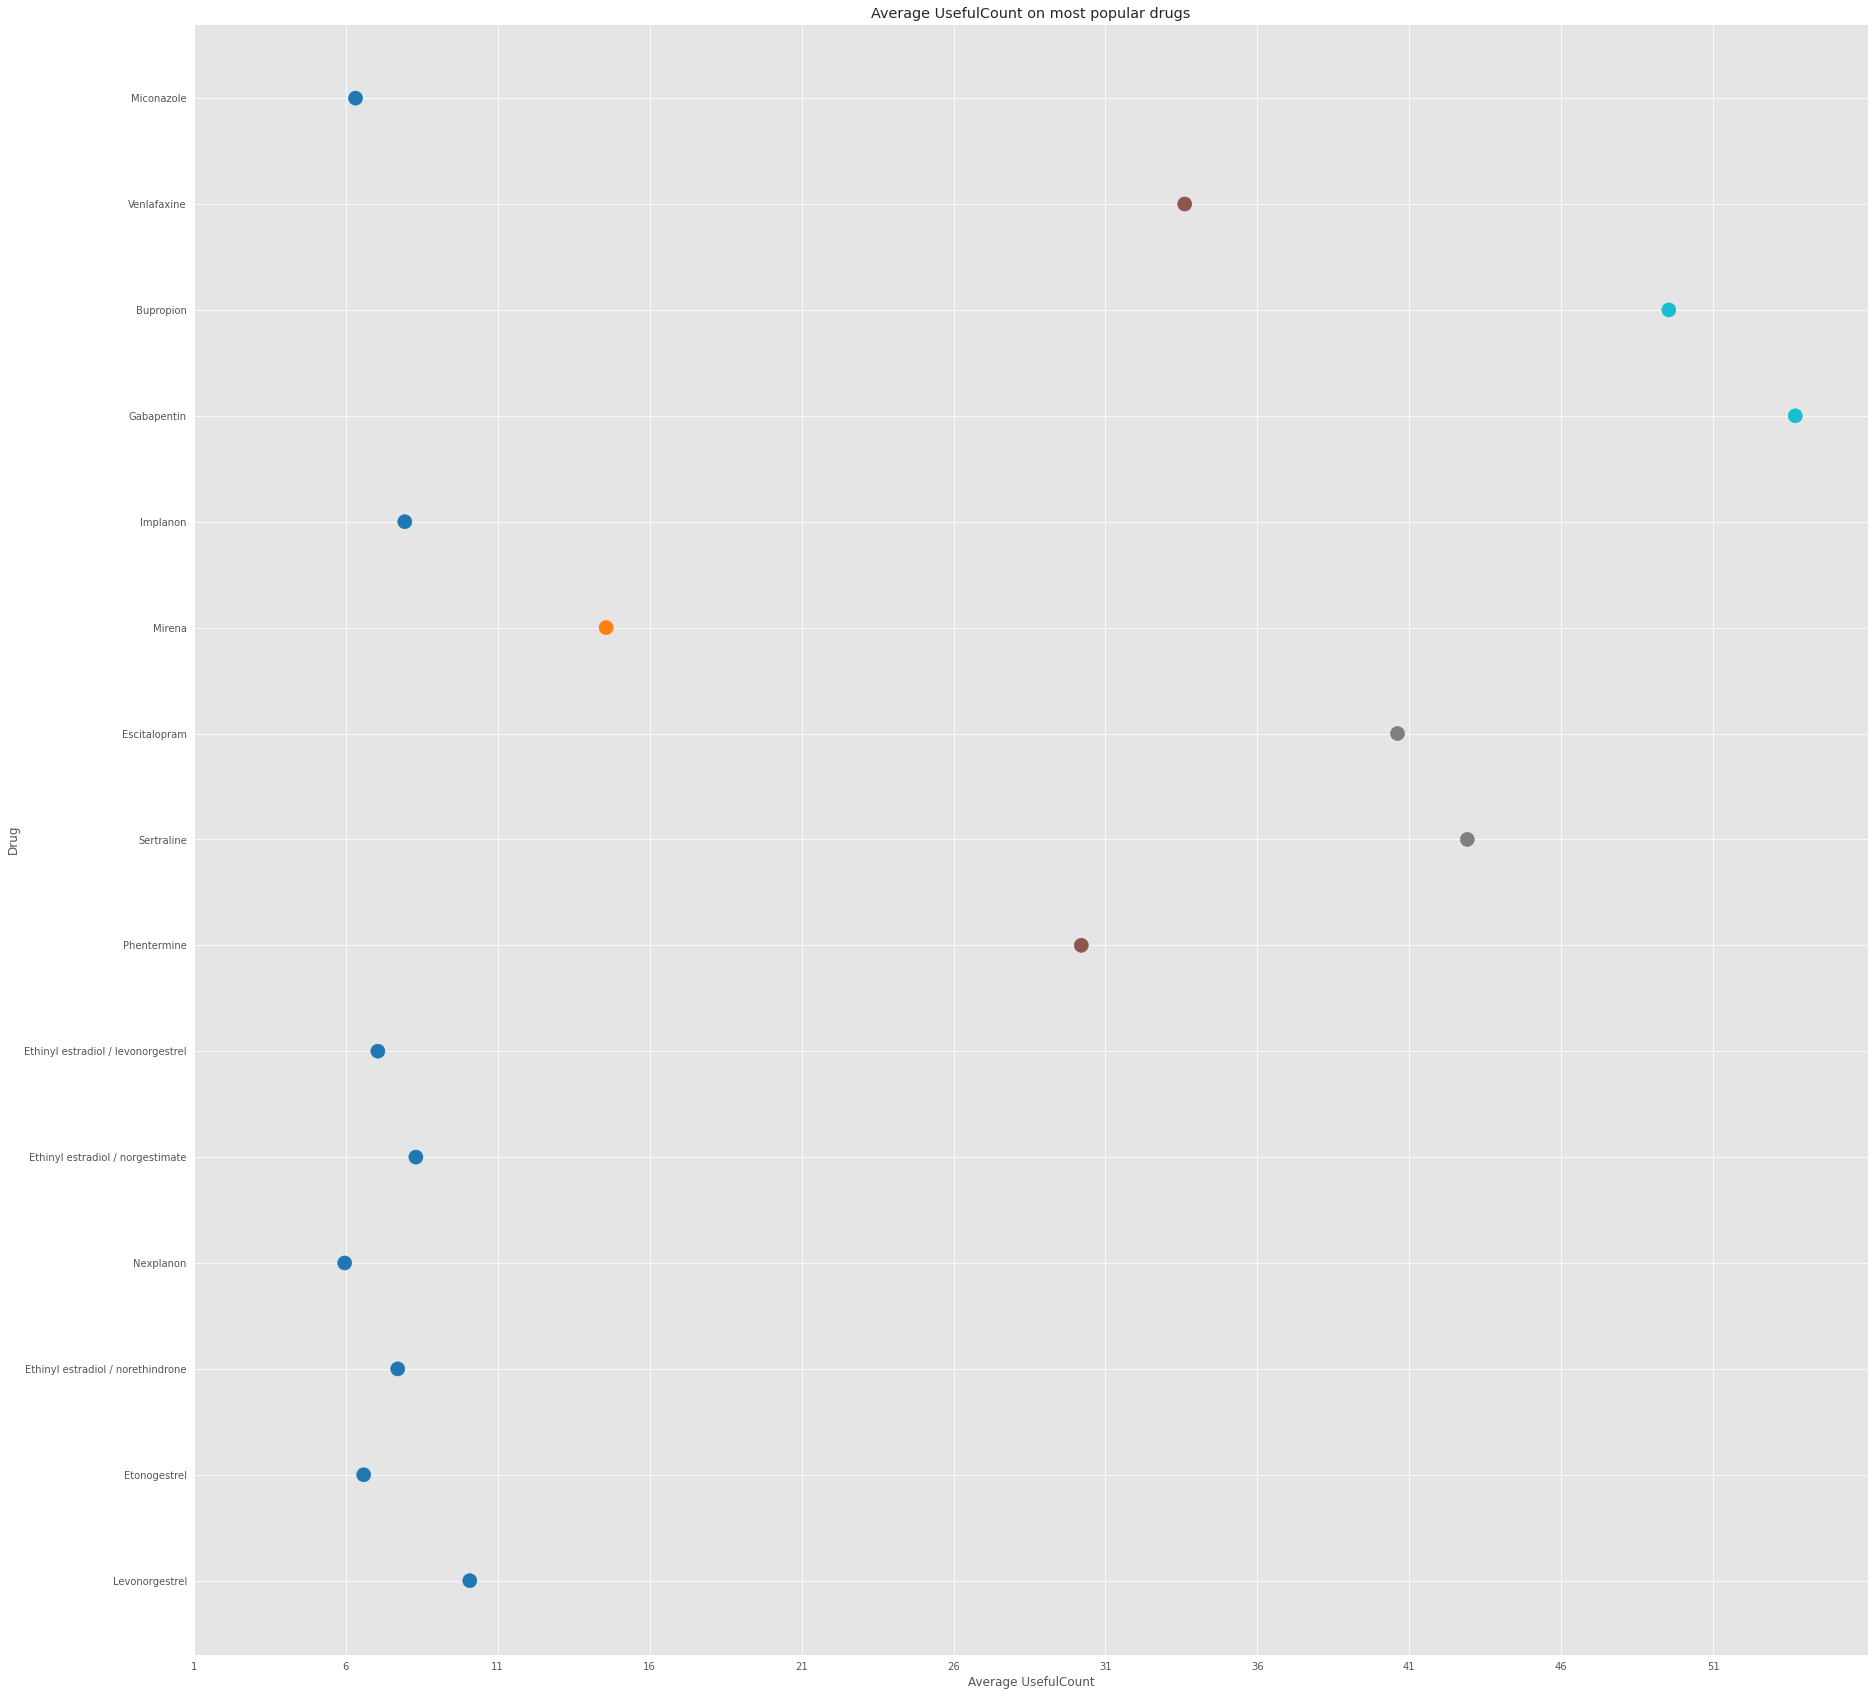

In [917]:
plt.scatter(avg_usefulness_for_most_popular_drugs, most_popular_drugs.index , c=avg_usefulness_for_most_popular_drugs, cmap='tab10', s=200)
plt.title('Average UsefulCount on most popular drugs')
plt.xlabel('Average UsefulCount')
plt.ylabel('Drug')
plt.xticks([i for i in range(1, 55, 5)]);

In [918]:
most_popular_conditions = train["condition"].value_counts()[:15]

In [919]:
avg_rating_for_most_popular_conditions = [train['rating'][train["condition"] == cond].mean() for cond in most_popular_conditions.index]

In [920]:
avg_rating_for_most_popular_conditions

[6.089933305543977,
 7.099459697871871,
 7.6322213181448335,
 7.691056910569106,
 7.374194702934861,
 7.152698863636363,
 6.724203648243942,
 8.051260737046274,
 7.744674887892376,
 7.3502808158439255,
 6.611981205951449,
 8.432399512789281,
 6.214993537268419,
 4.082233948988566,
 4.372614503816794]

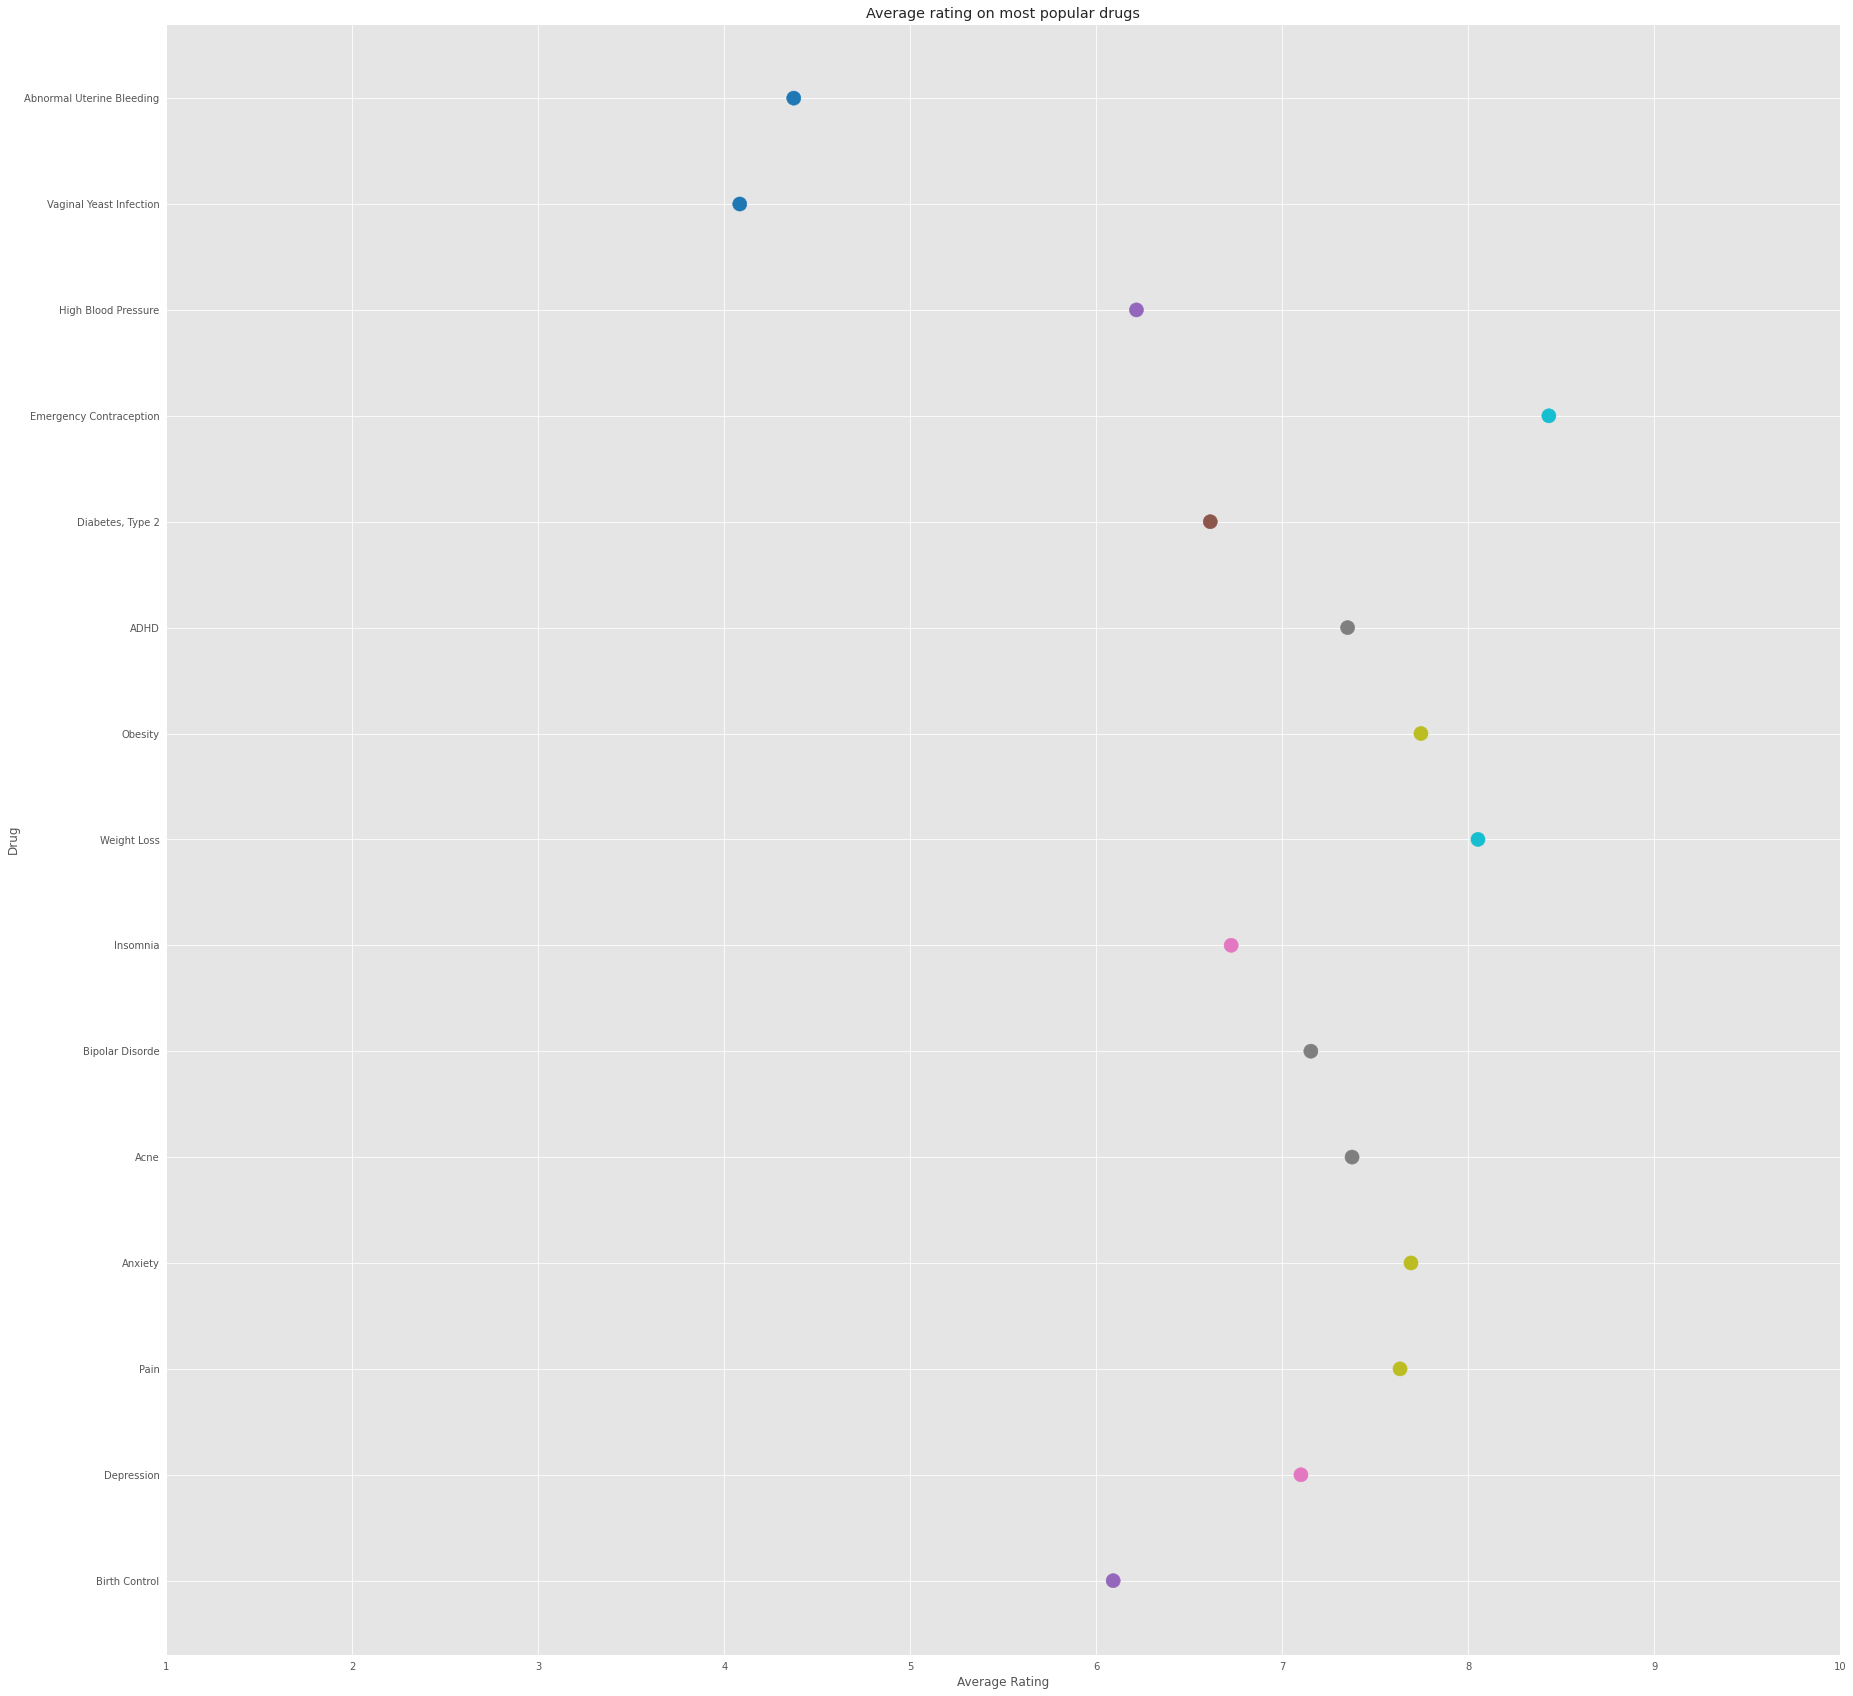

In [921]:
plt.scatter(avg_rating_for_most_popular_conditions, most_popular_conditions.index , c=avg_rating_for_most_popular_conditions, cmap='tab10', s=200)
plt.title('Average rating on most popular drugs')
plt.xlabel('Average Rating')
plt.ylabel('Drug')
plt.xticks([i for i in range(1, 11)]);

In [922]:
avg_usefull_for_most_popular_conditions = [train['usefulCount'][train["condition"] == cond].mean() for cond in most_popular_conditions.index]

In [923]:
avg_usefull_for_most_popular_conditions

[7.792344032235654,
 50.602933068695556,
 35.57445077298617,
 50.859078590785906,
 15.848604151753758,
 36.127604166666664,
 35.611489245848084,
 38.75145469659186,
 37.88508968609865,
 36.1764705882353,
 28.62490211433046,
 13.584246853430775,
 45.55924170616114,
 9.66754617414248,
 12.907442748091603]

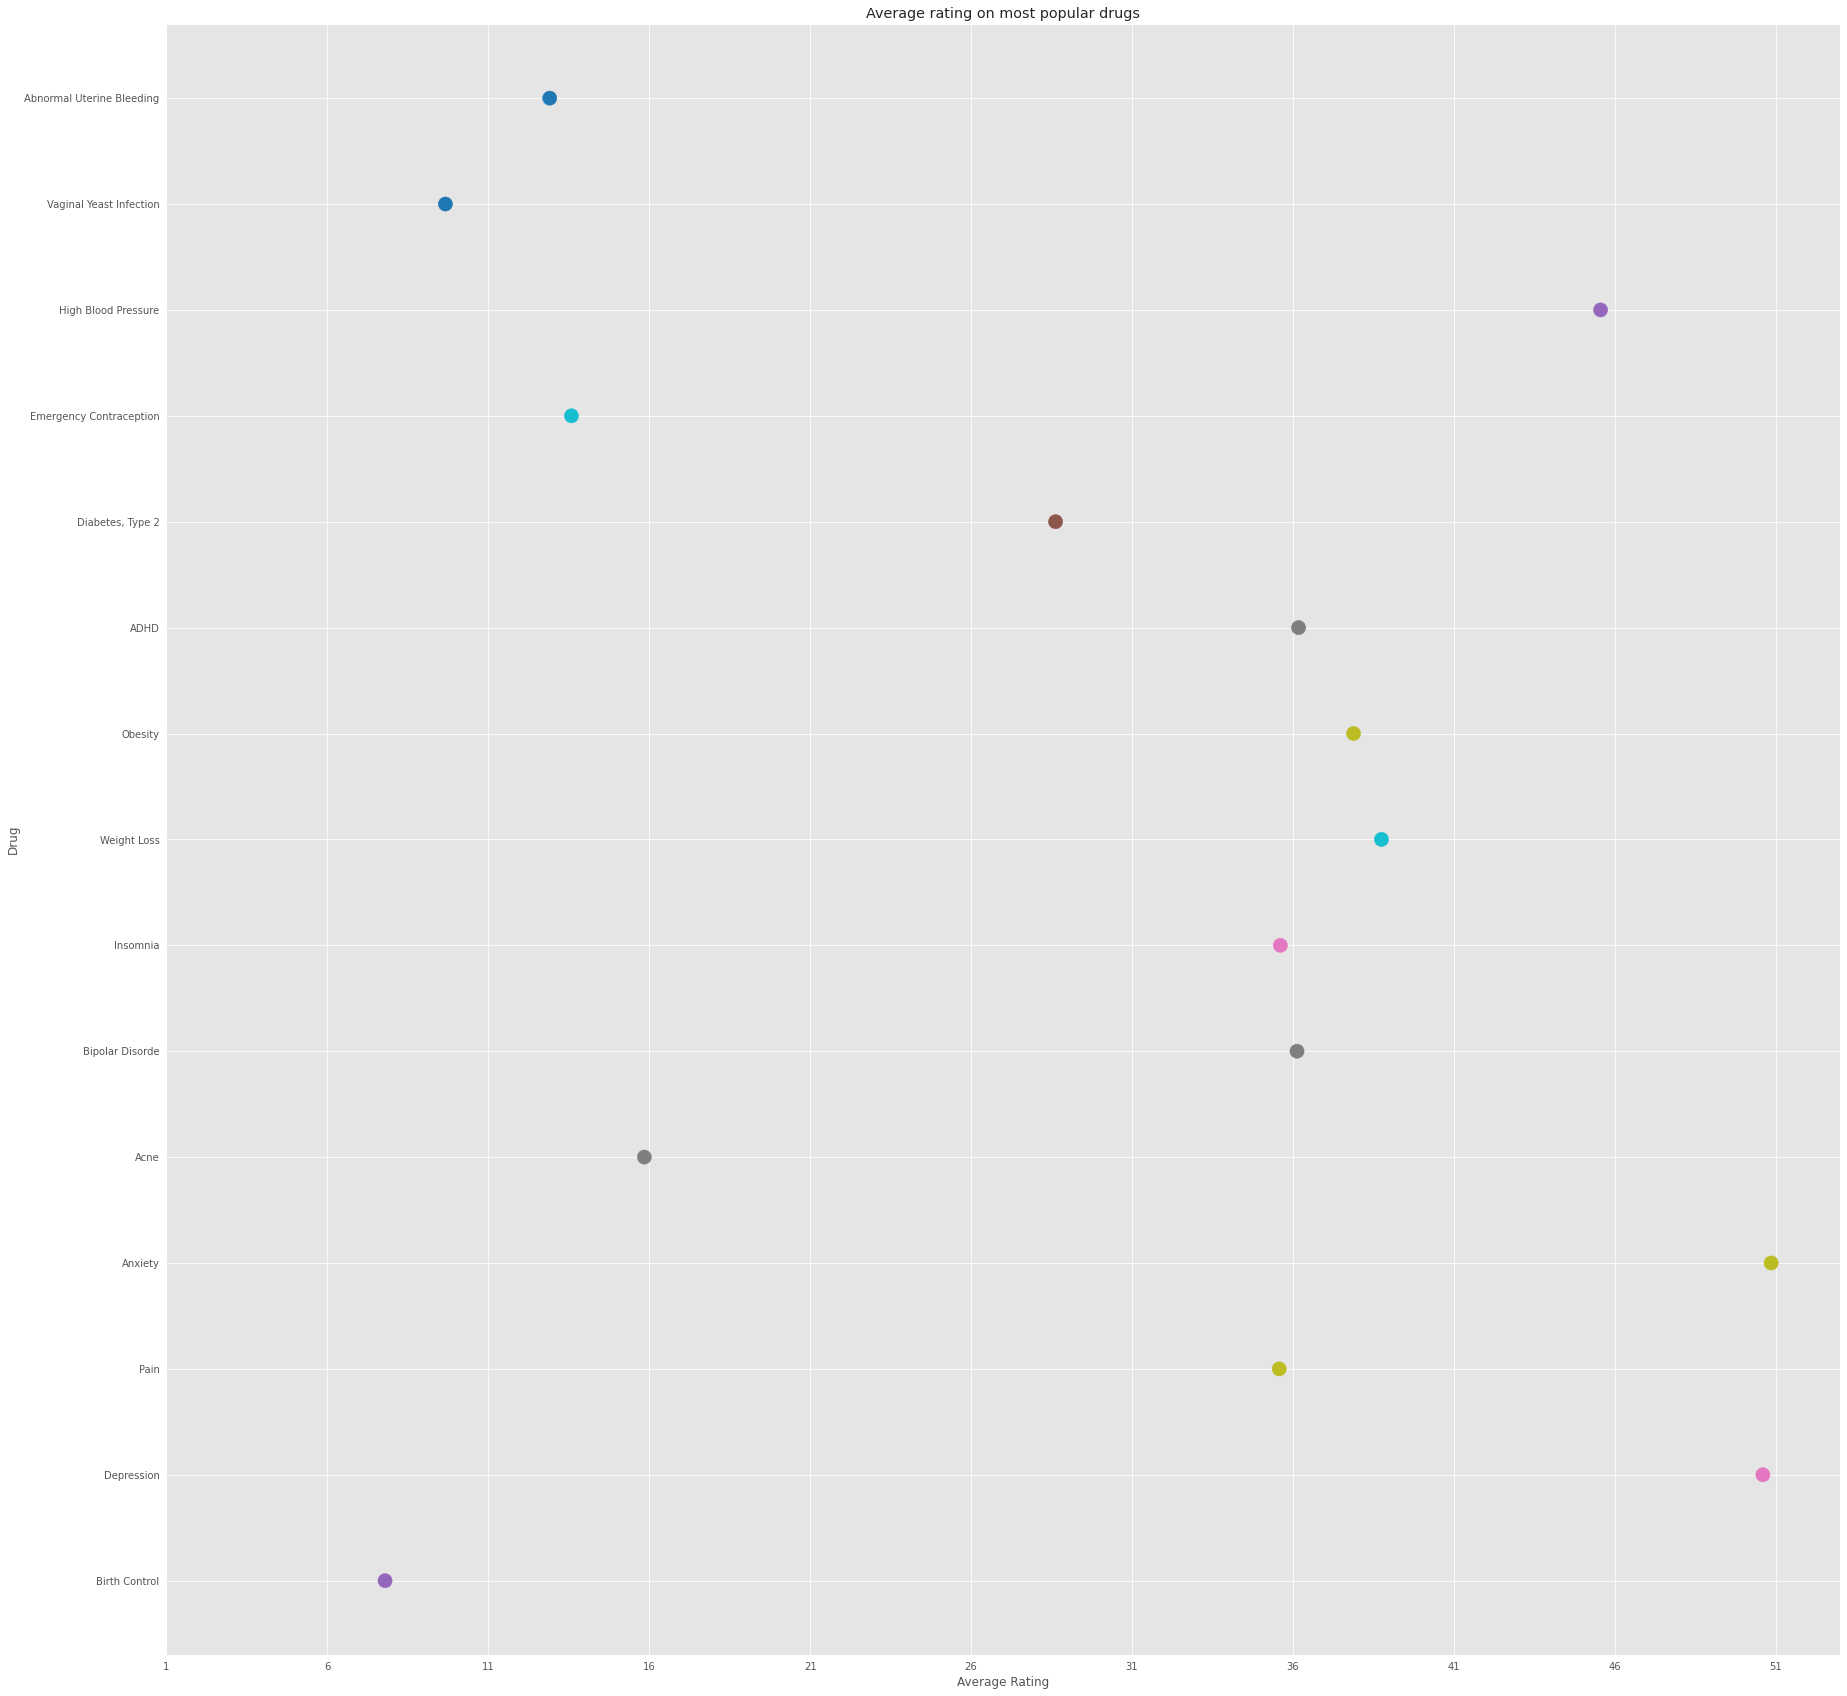

In [924]:
plt.scatter(avg_usefull_for_most_popular_conditions, most_popular_conditions.index , c=avg_rating_for_most_popular_conditions, cmap='tab10', s=200)
plt.title('Average rating on most popular drugs')
plt.xlabel('Average Rating')
plt.ylabel('Drug')
plt.xticks([i for i in range(1, 55, 5)]);

In [925]:
train

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


# Feature ideas

# Get a feature out of the time regarding the date of review

# Feature for how frequent a pair of drug and condition is

In [12]:
train["year"] = [x[-2:] for x in train["date"]]

In [13]:
x = train["year"].value_counts().index
y = train["year"].value_counts()

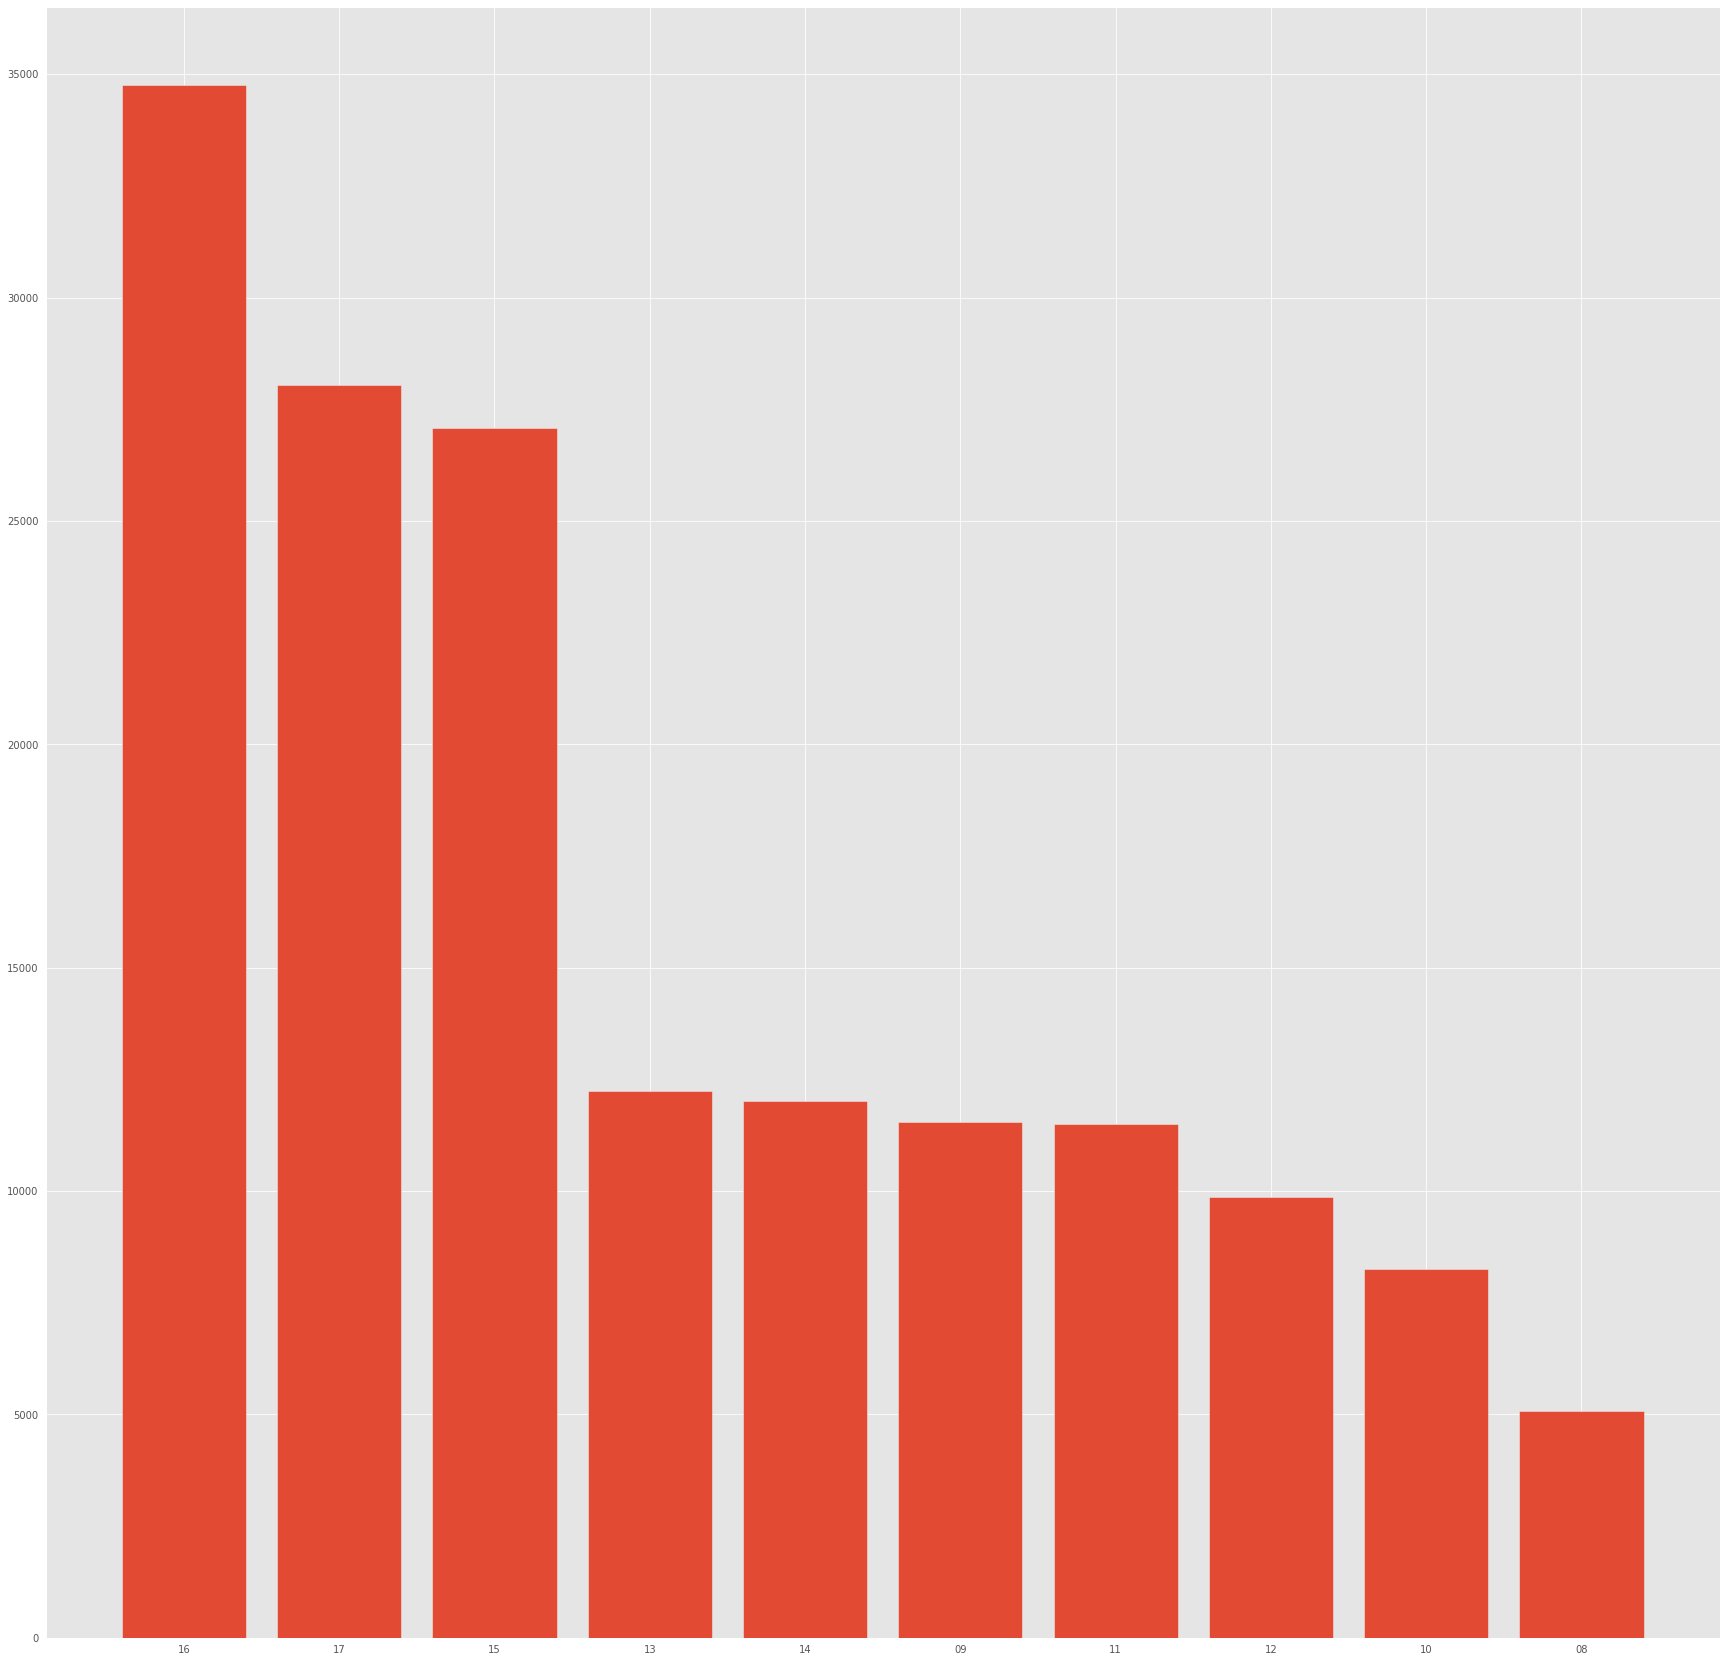

In [928]:
plt.bar(x, y)
plt.show()

In [929]:
train['year'][train['condition'] == "Birth Control"].value_counts()

16    7424
17    5903
15    5567
11    2022
13    2003
14    1981
12    1855
10    1099
09     819
08     115
Name: year, dtype: int64

Text(0.5, 1.0, 'Birth control review count over the years')

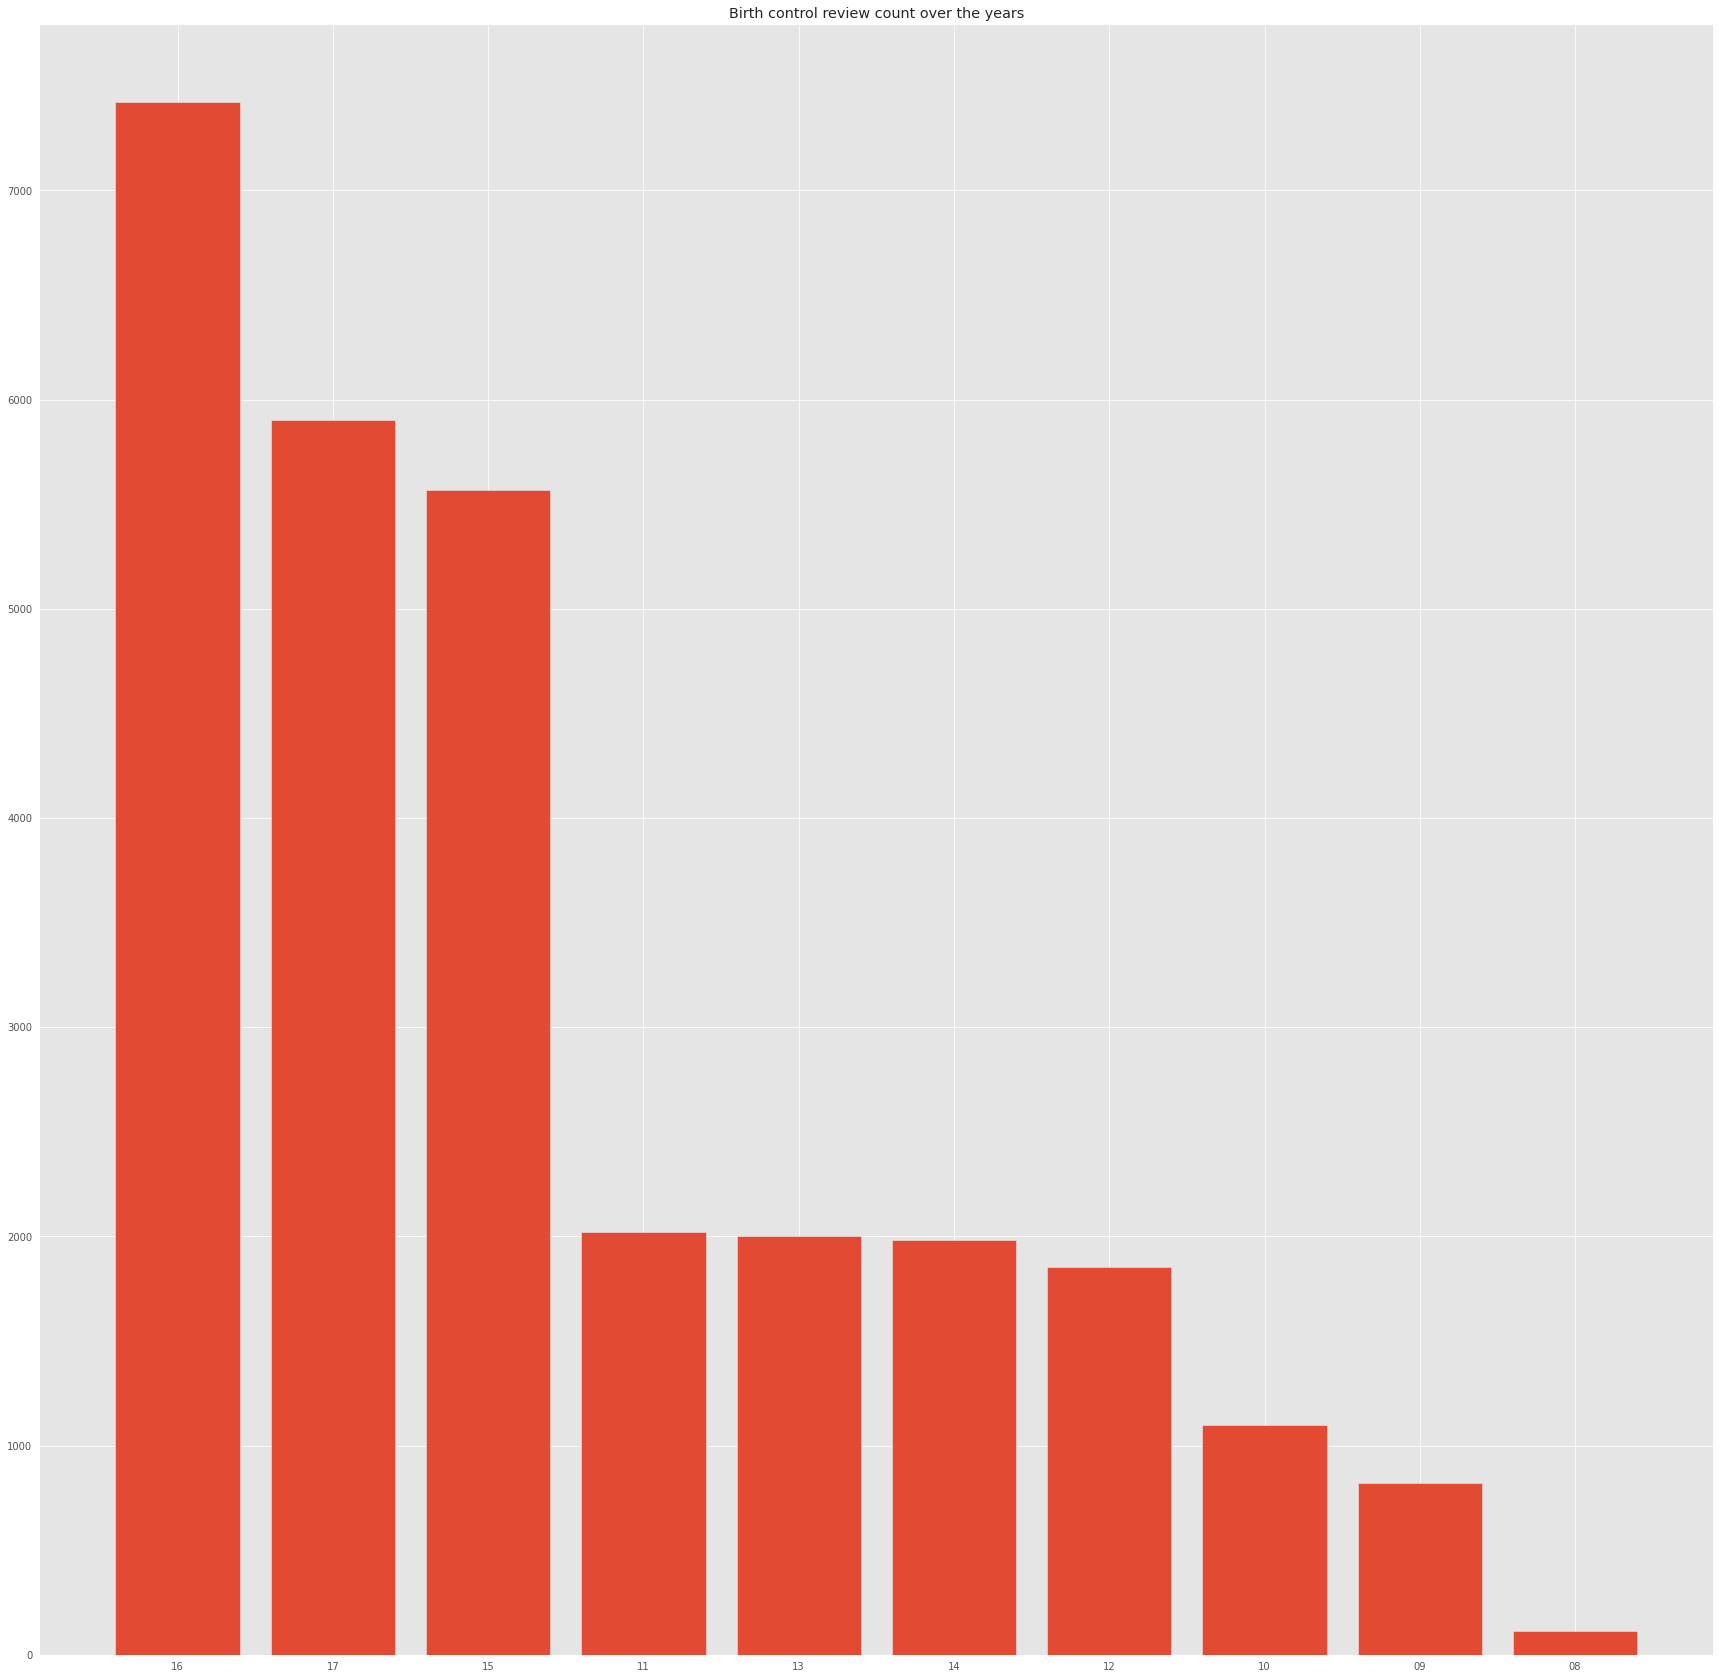

In [930]:
plt.bar(train['year'][train['condition'] == "Birth Control"].value_counts().index, train['year'][train['condition'] == "Birth Control"].value_counts())
plt.title('Birth control review count over the years')

In [931]:
most_popular_conditions

Birth Control                28788
Depression                    9069
Pain                          6145
Anxiety                       5904
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3673
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Name: condition, dtype: int64

Birth Control


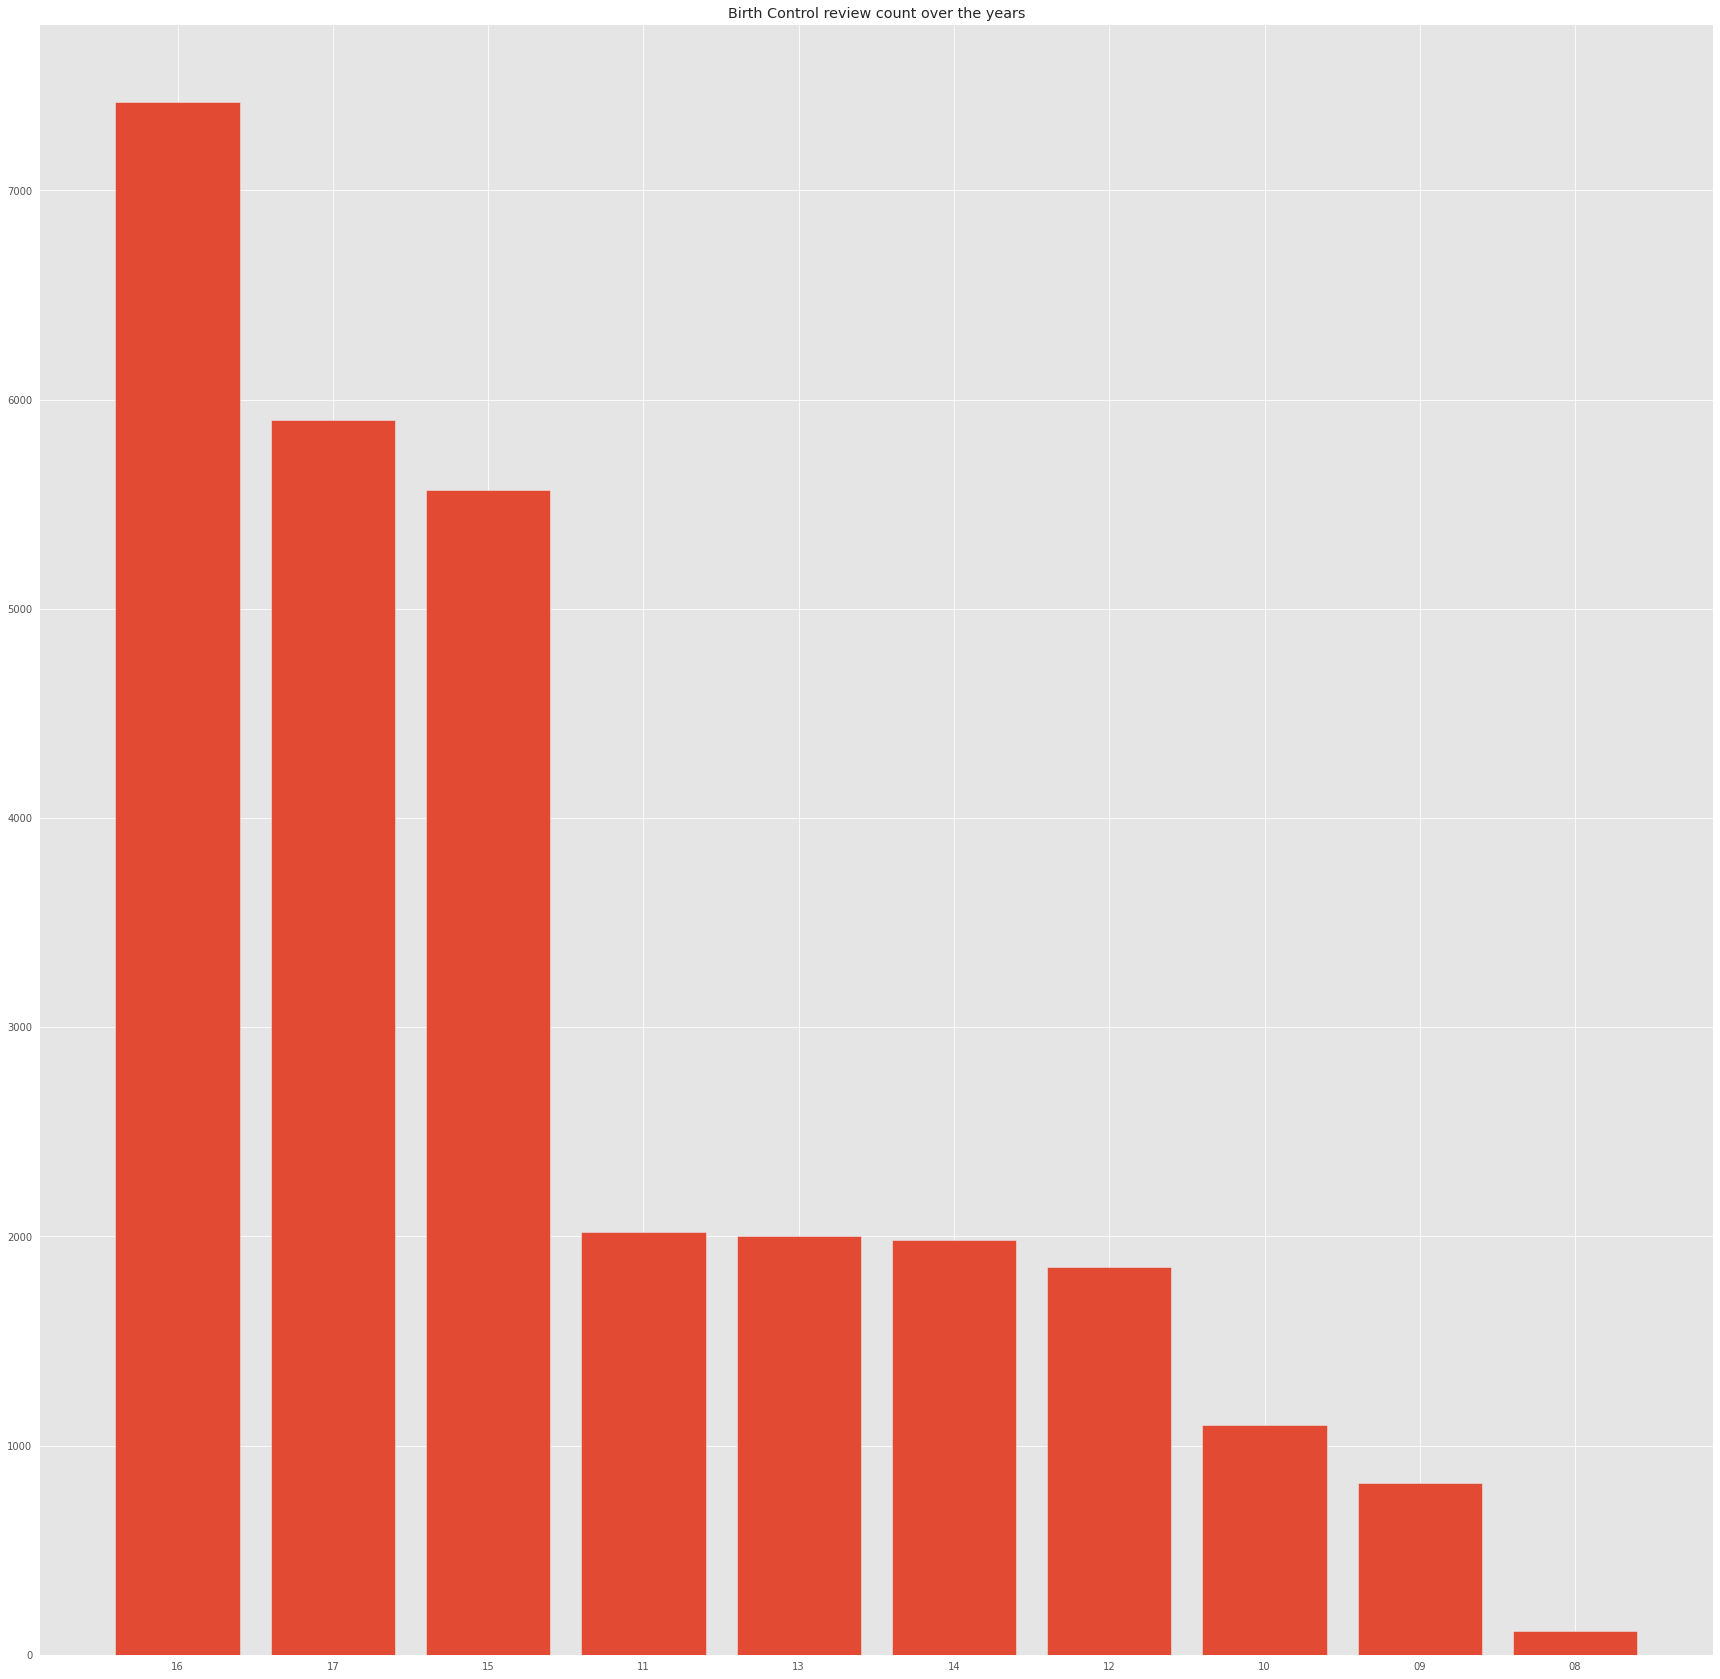

Depression


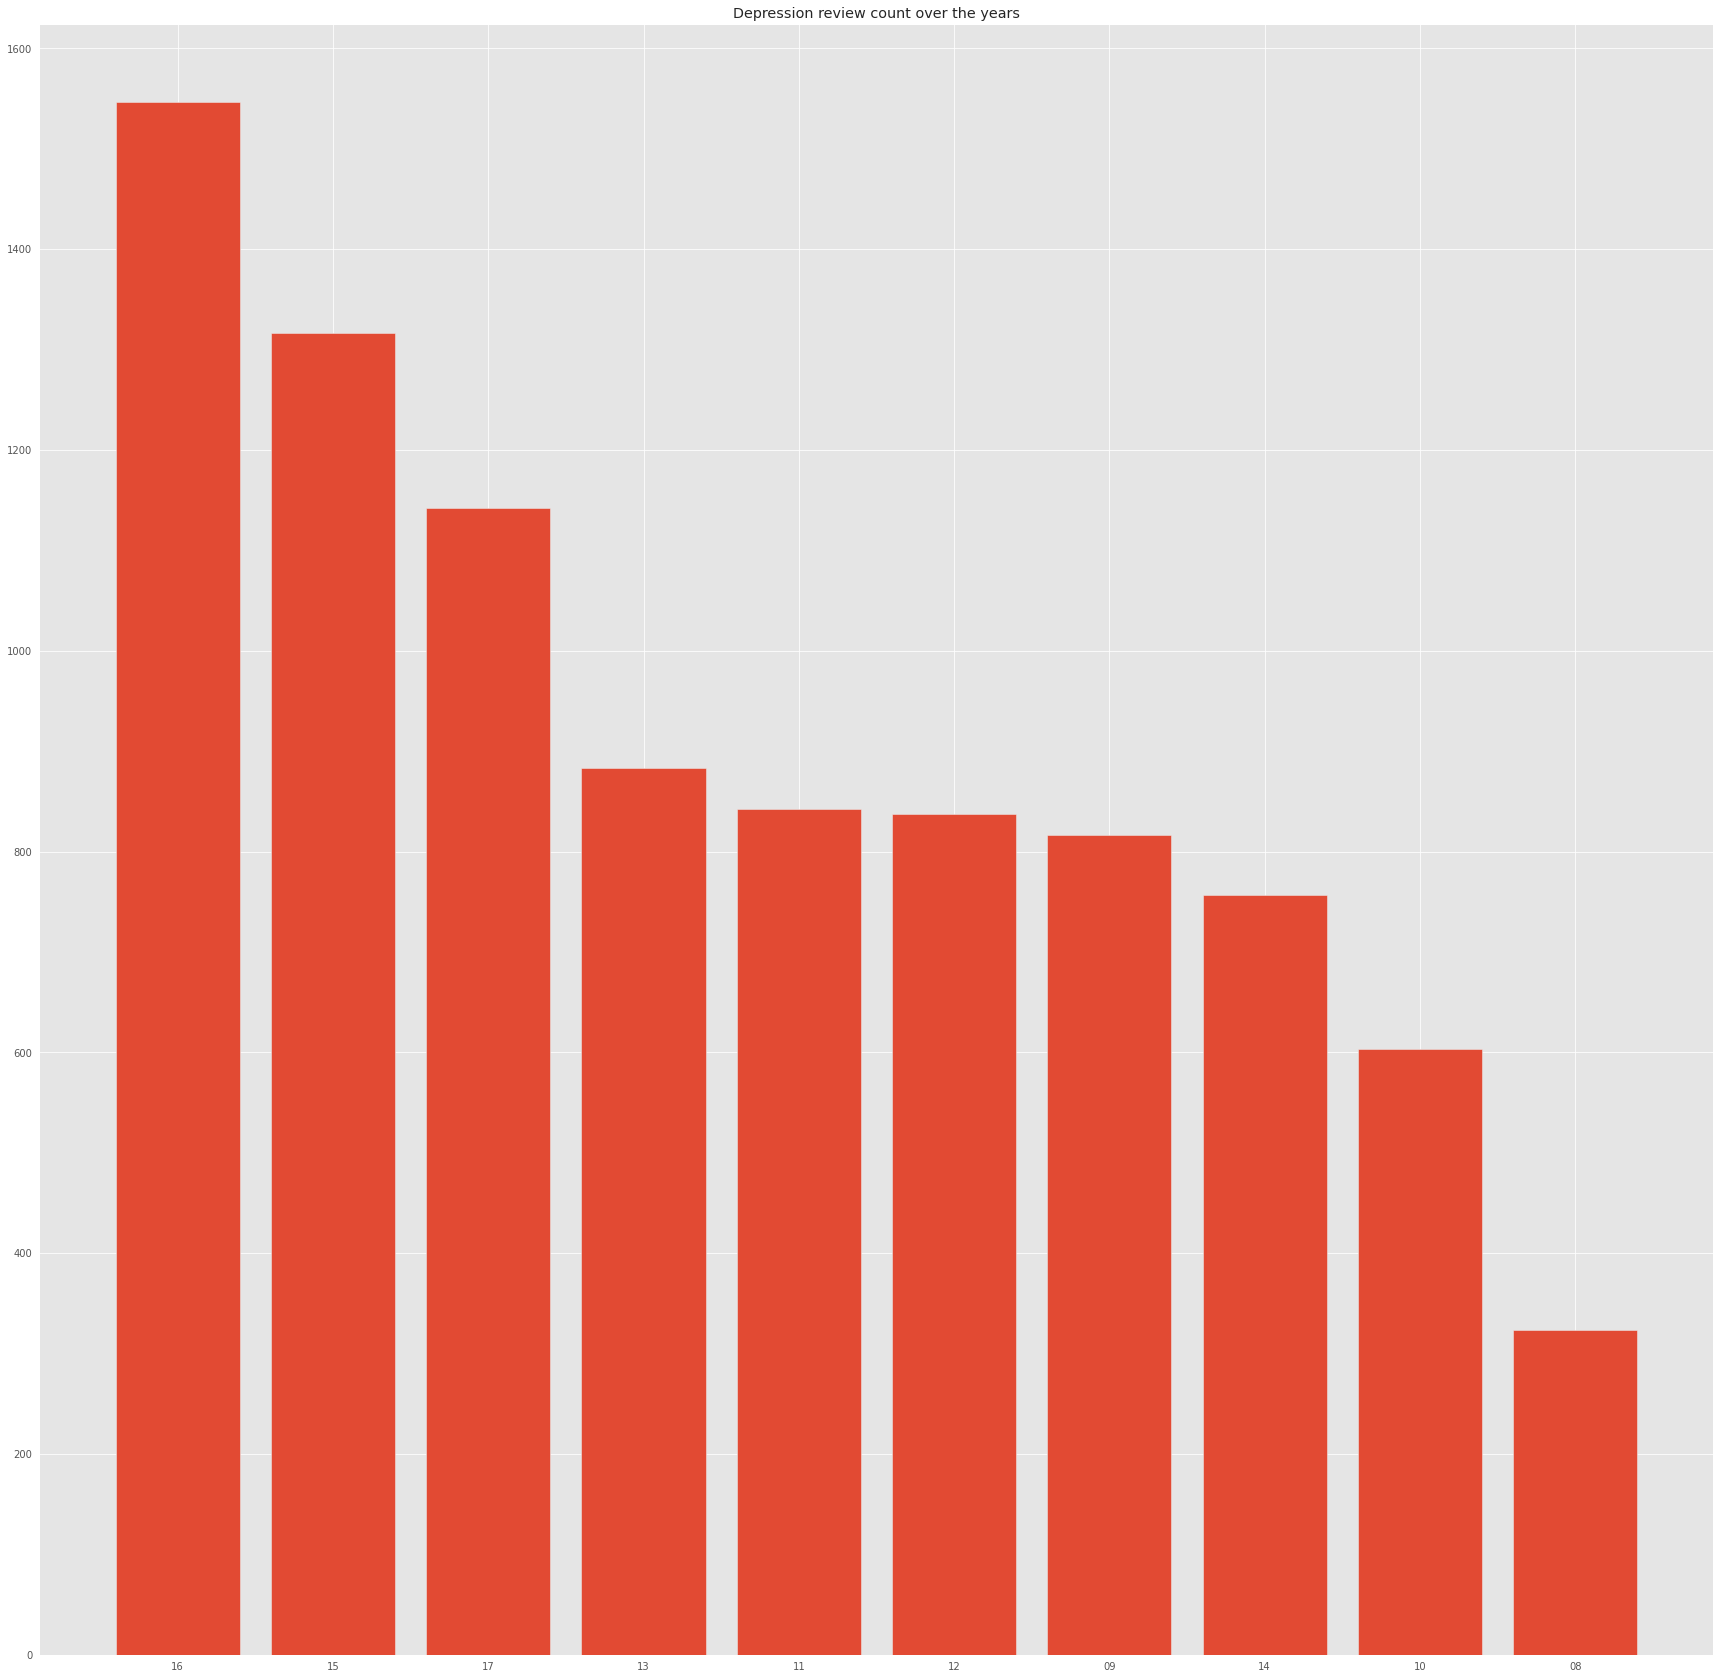

Pain


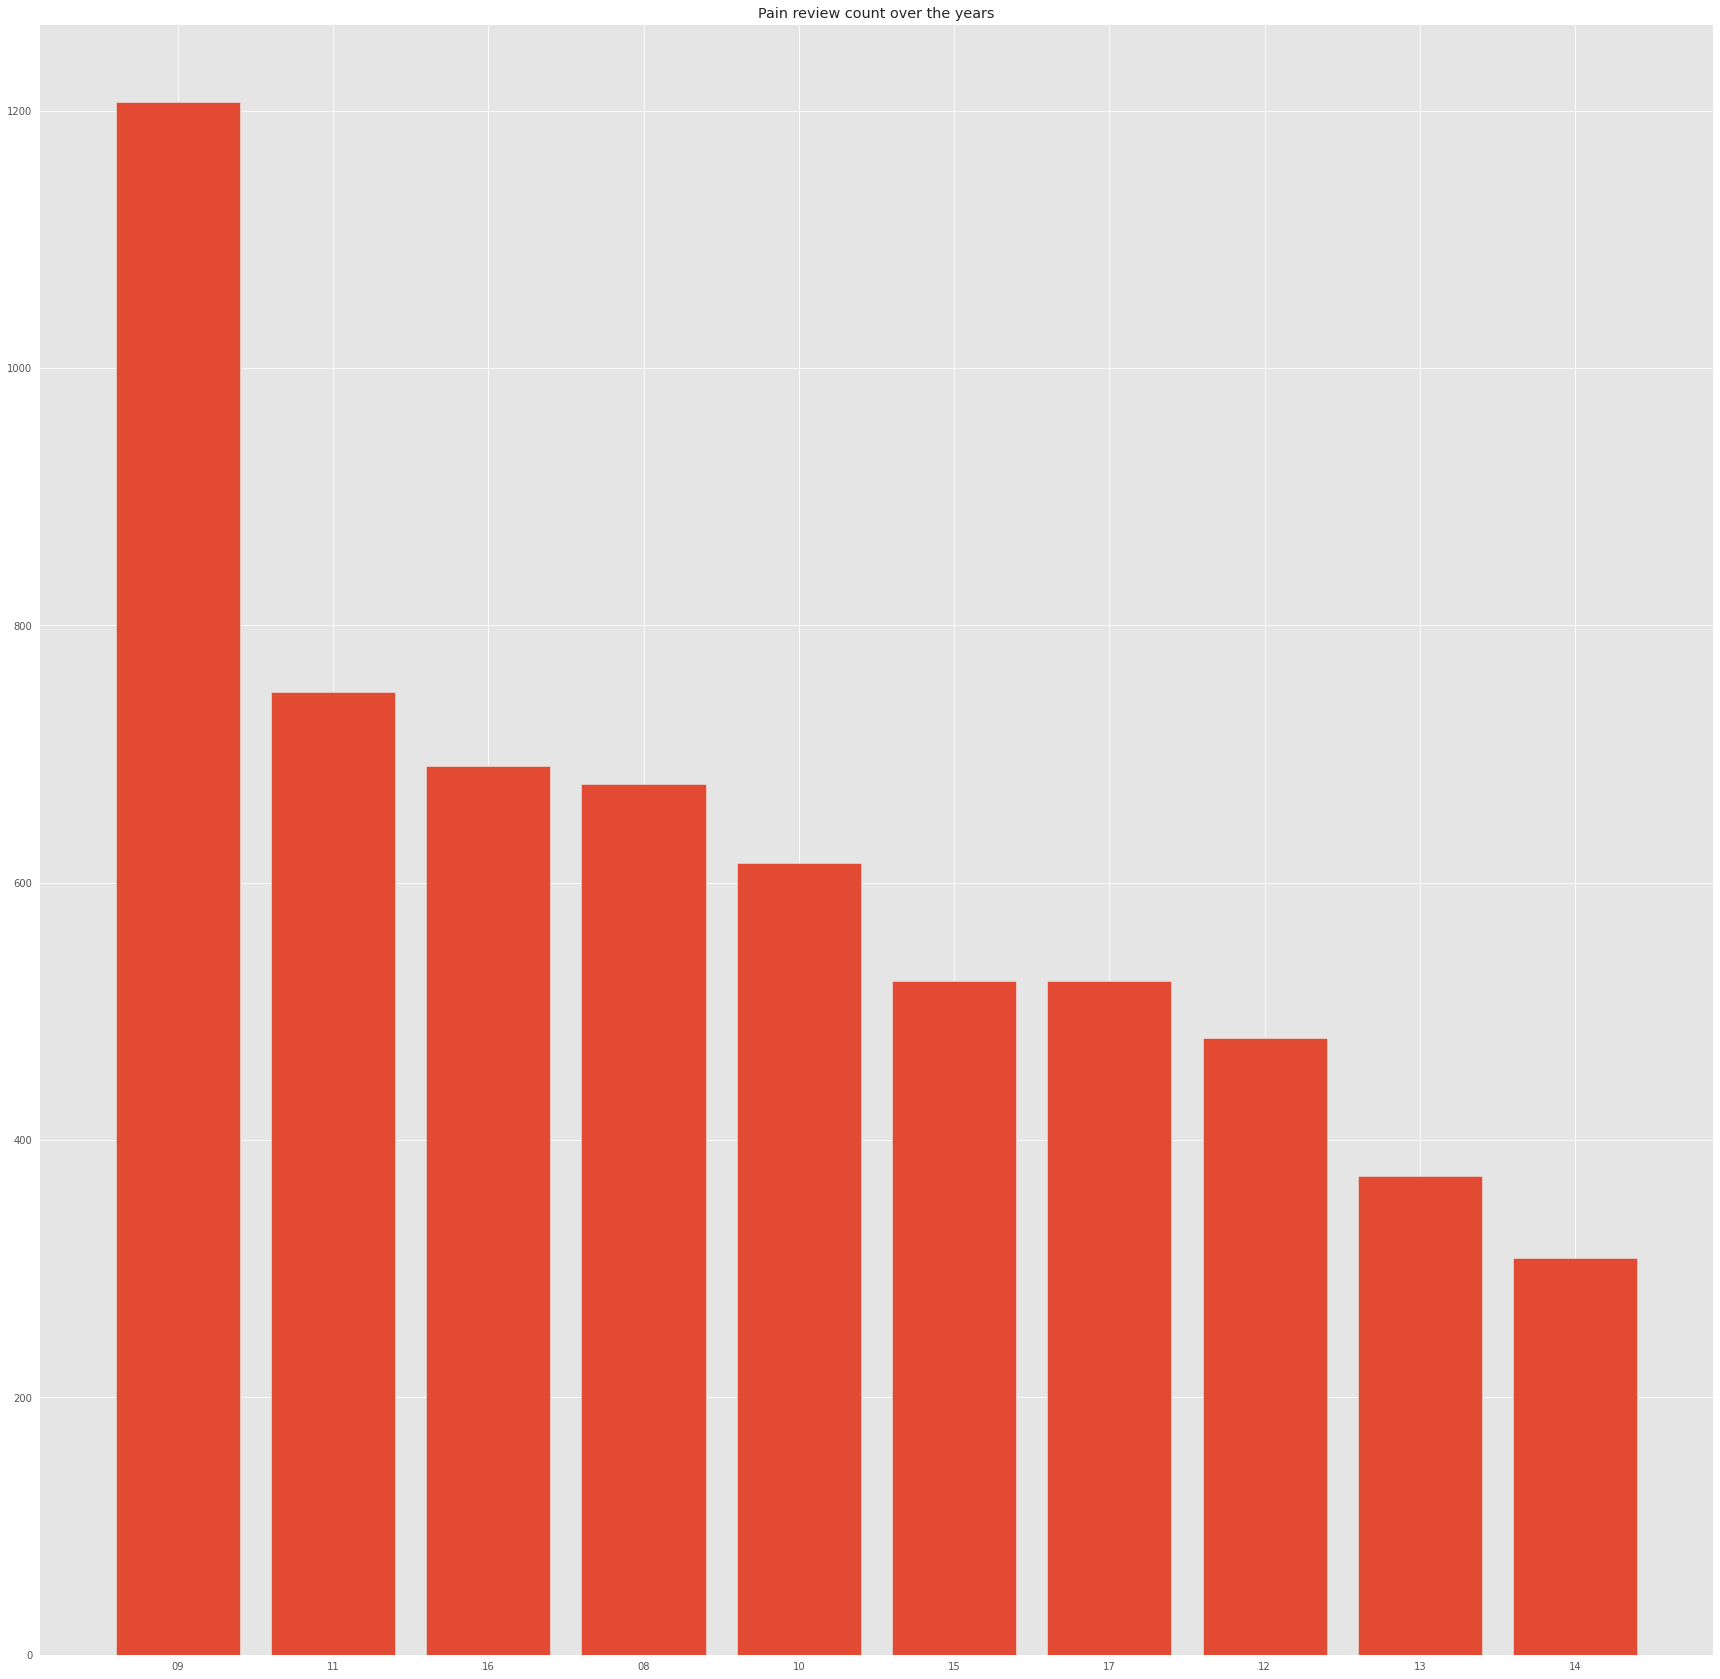

Anxiety


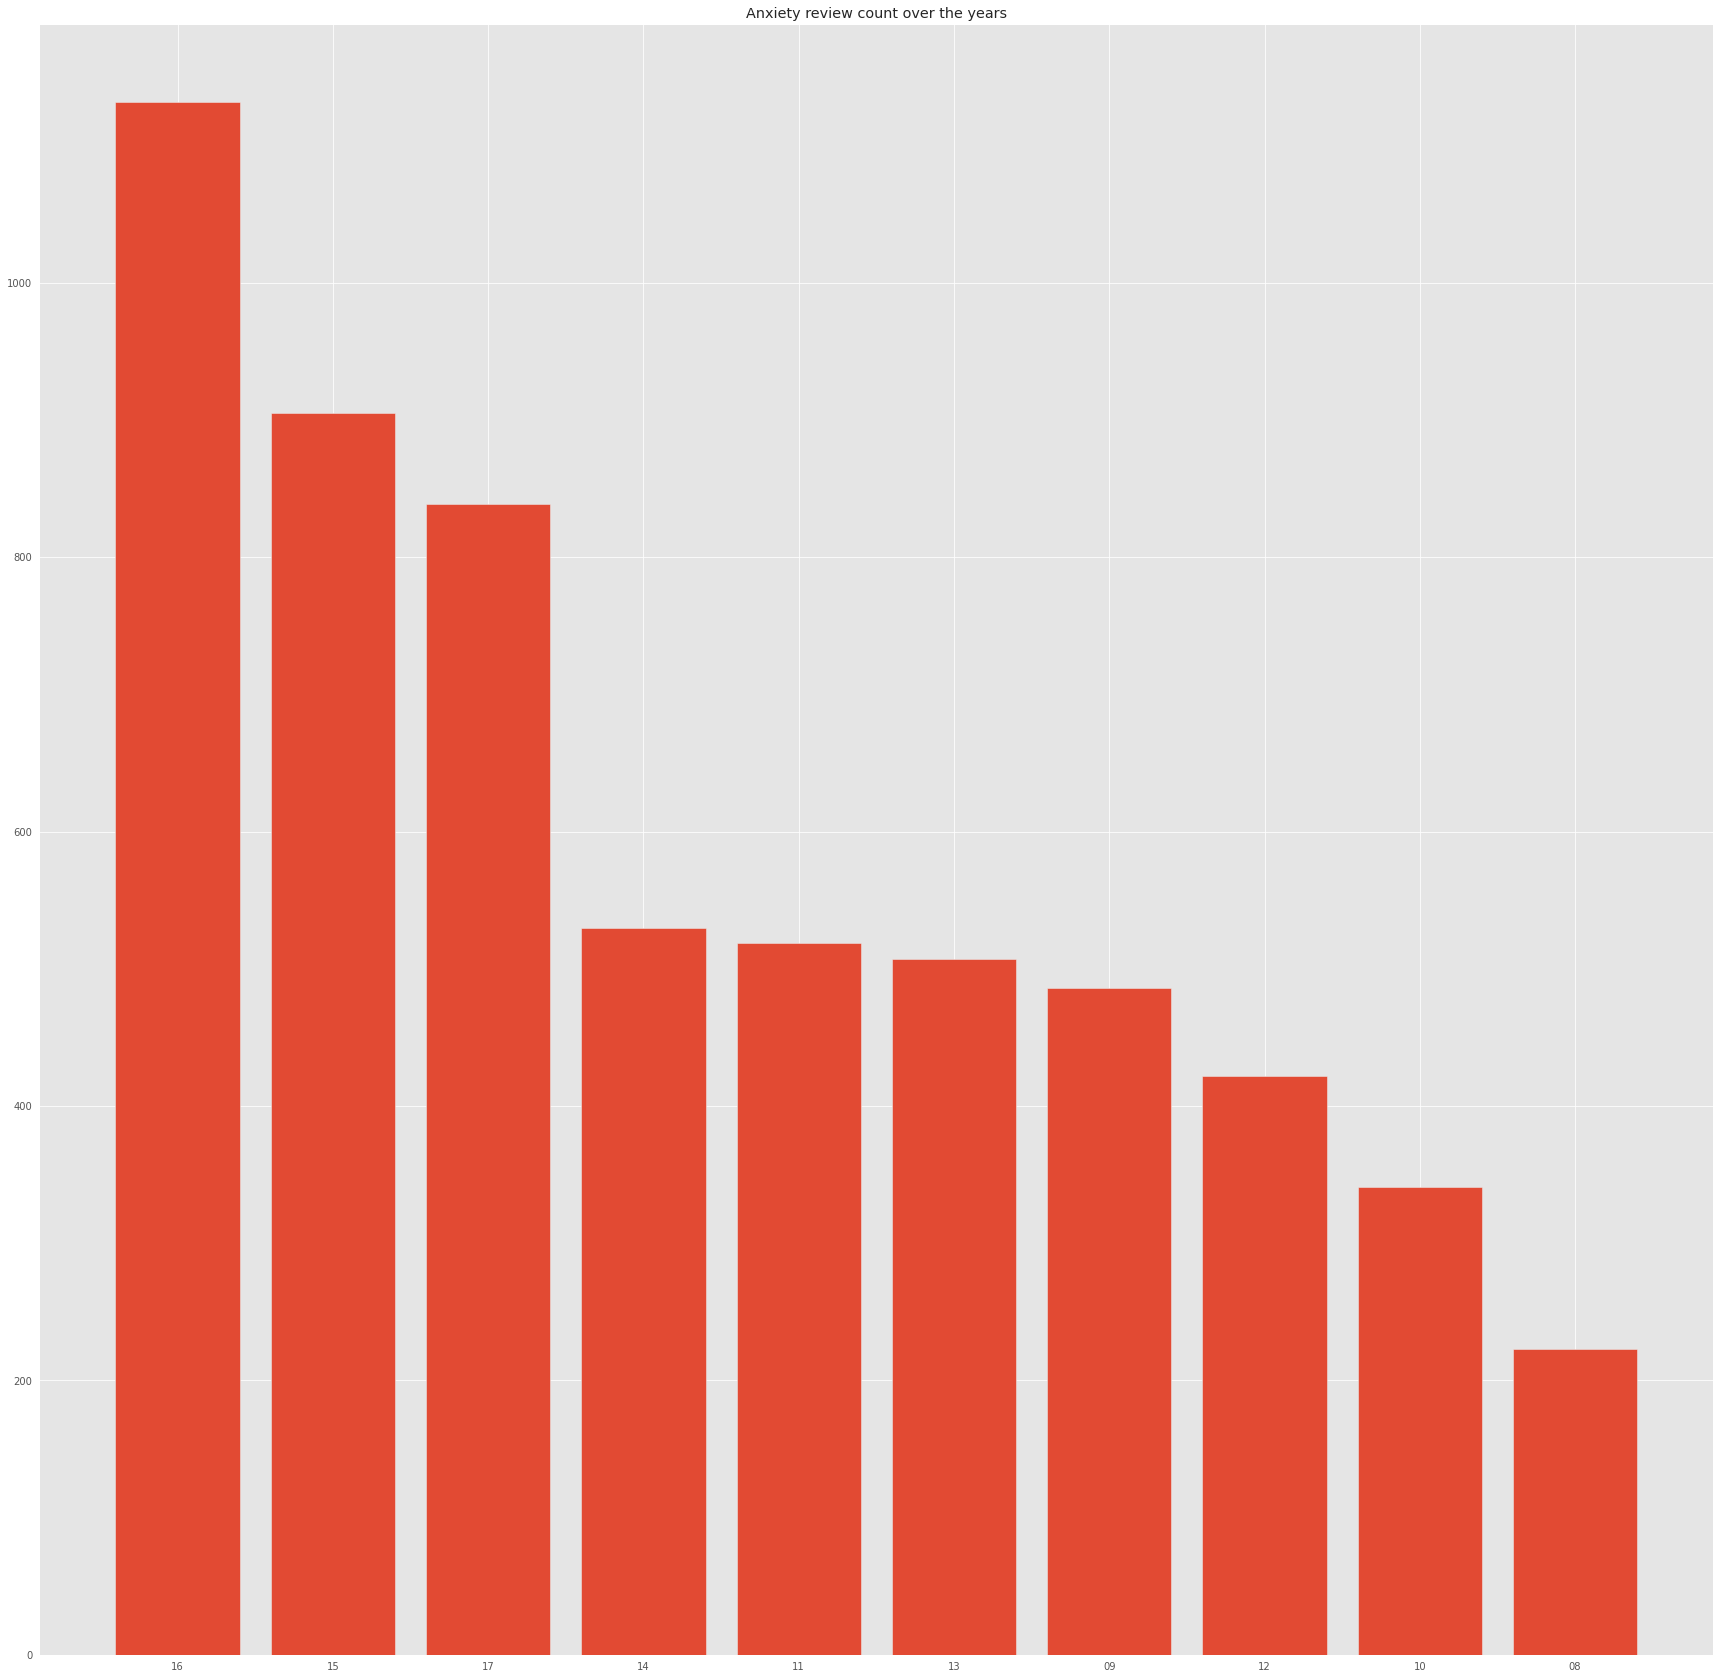

Acne


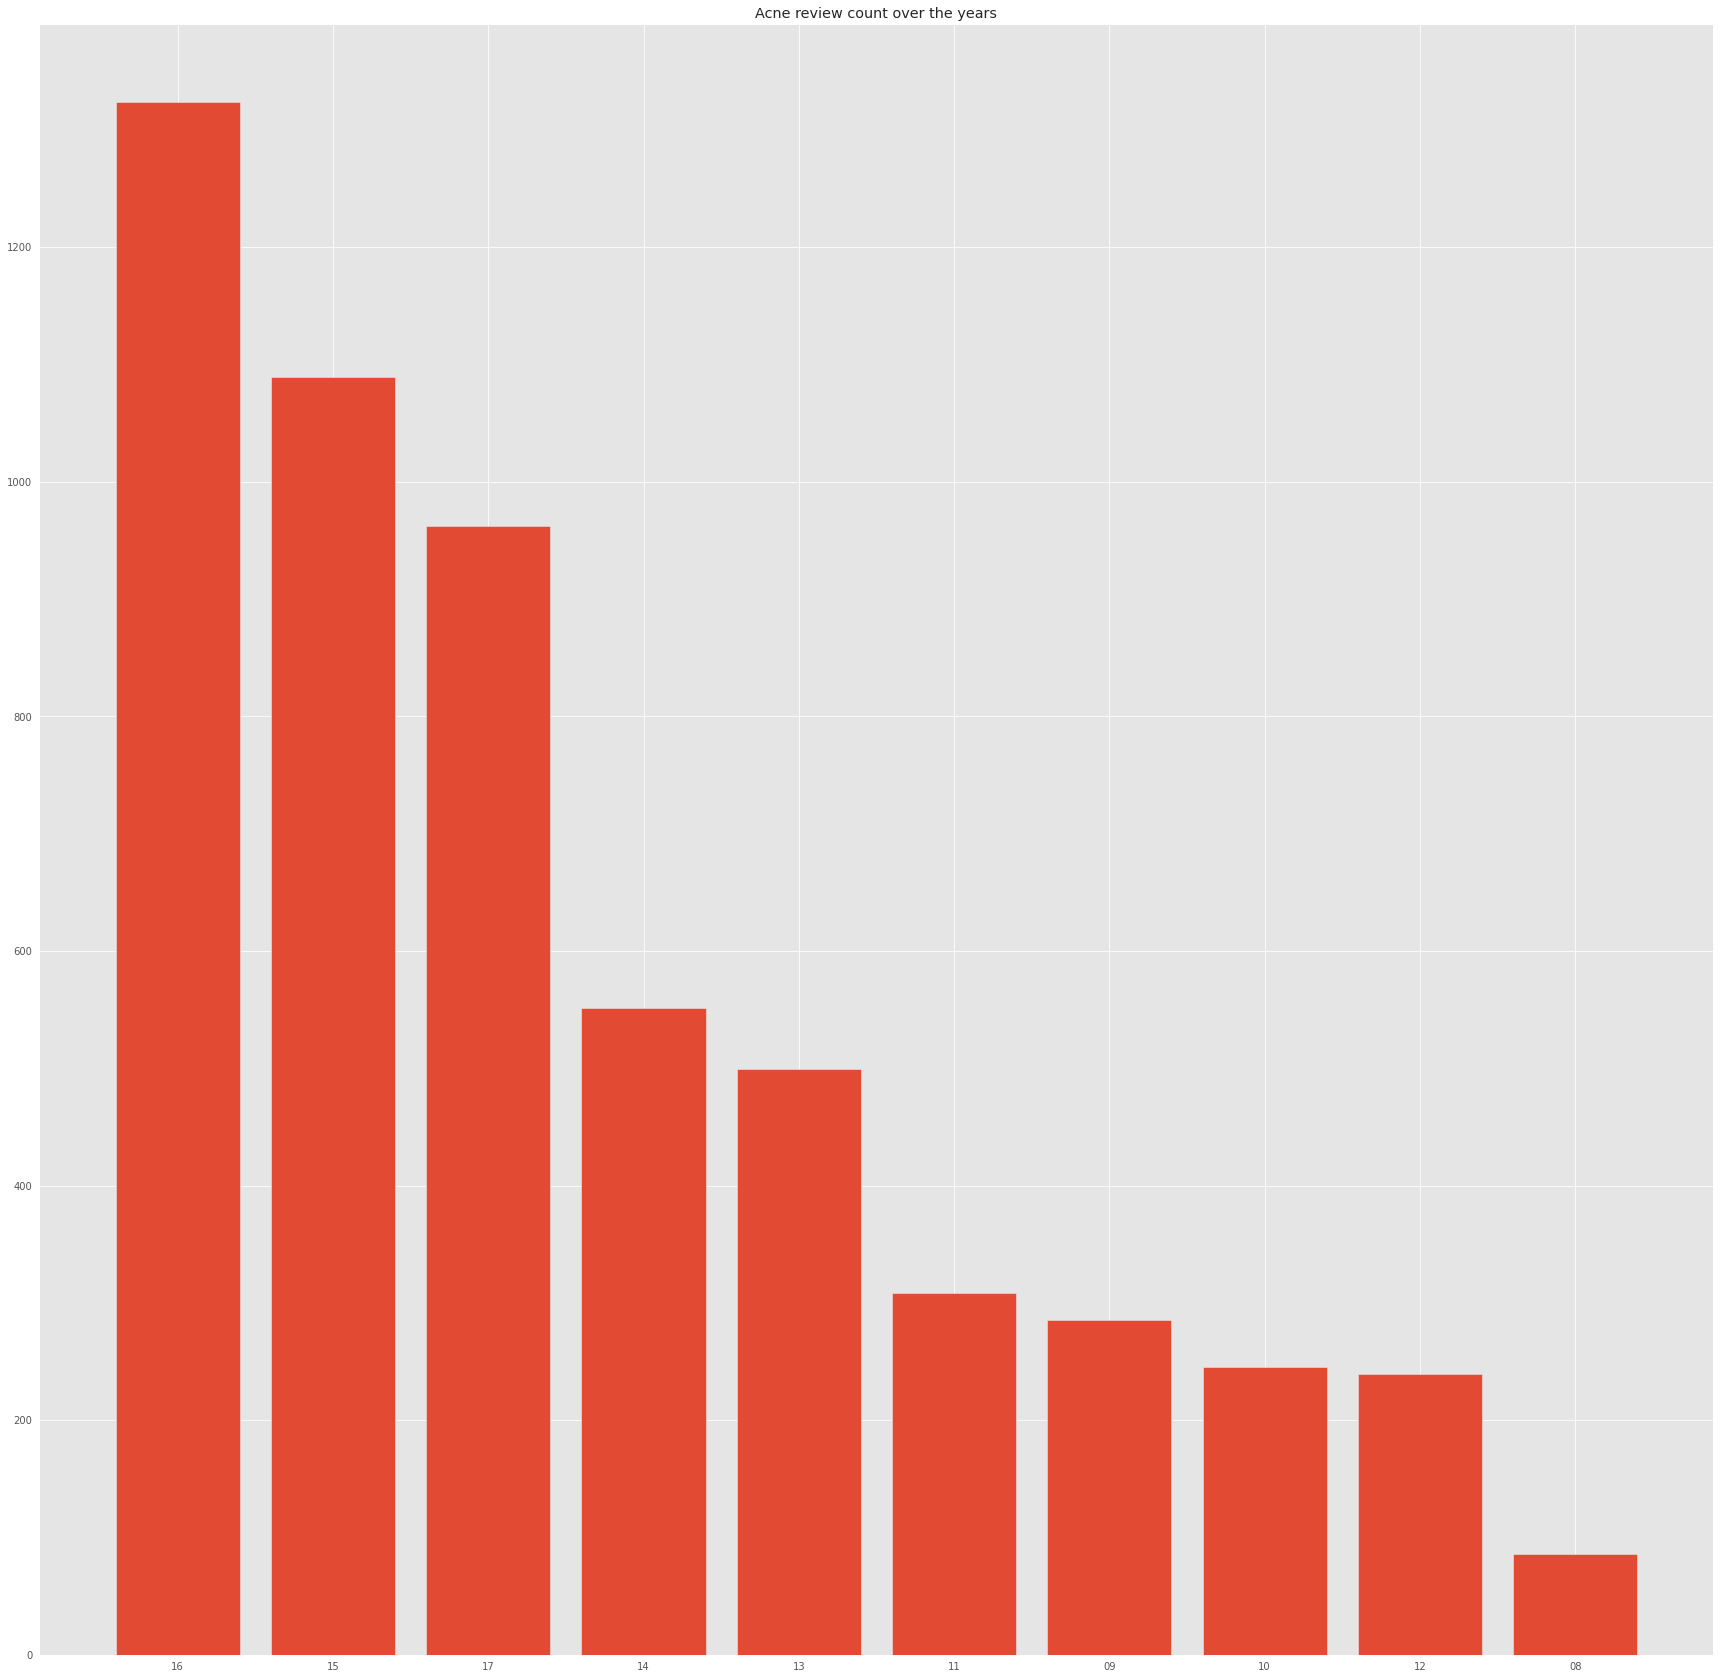

In [932]:

for cond in most_popular_conditions.index[:5]:
    print(cond)
    plt.bar(train['year'][train['condition'] == cond].value_counts().index, train['year'][train['condition'] == cond].value_counts())
    plt.title(cond + ' review count over the years')
    plt.show()
    

Levonorgestrel


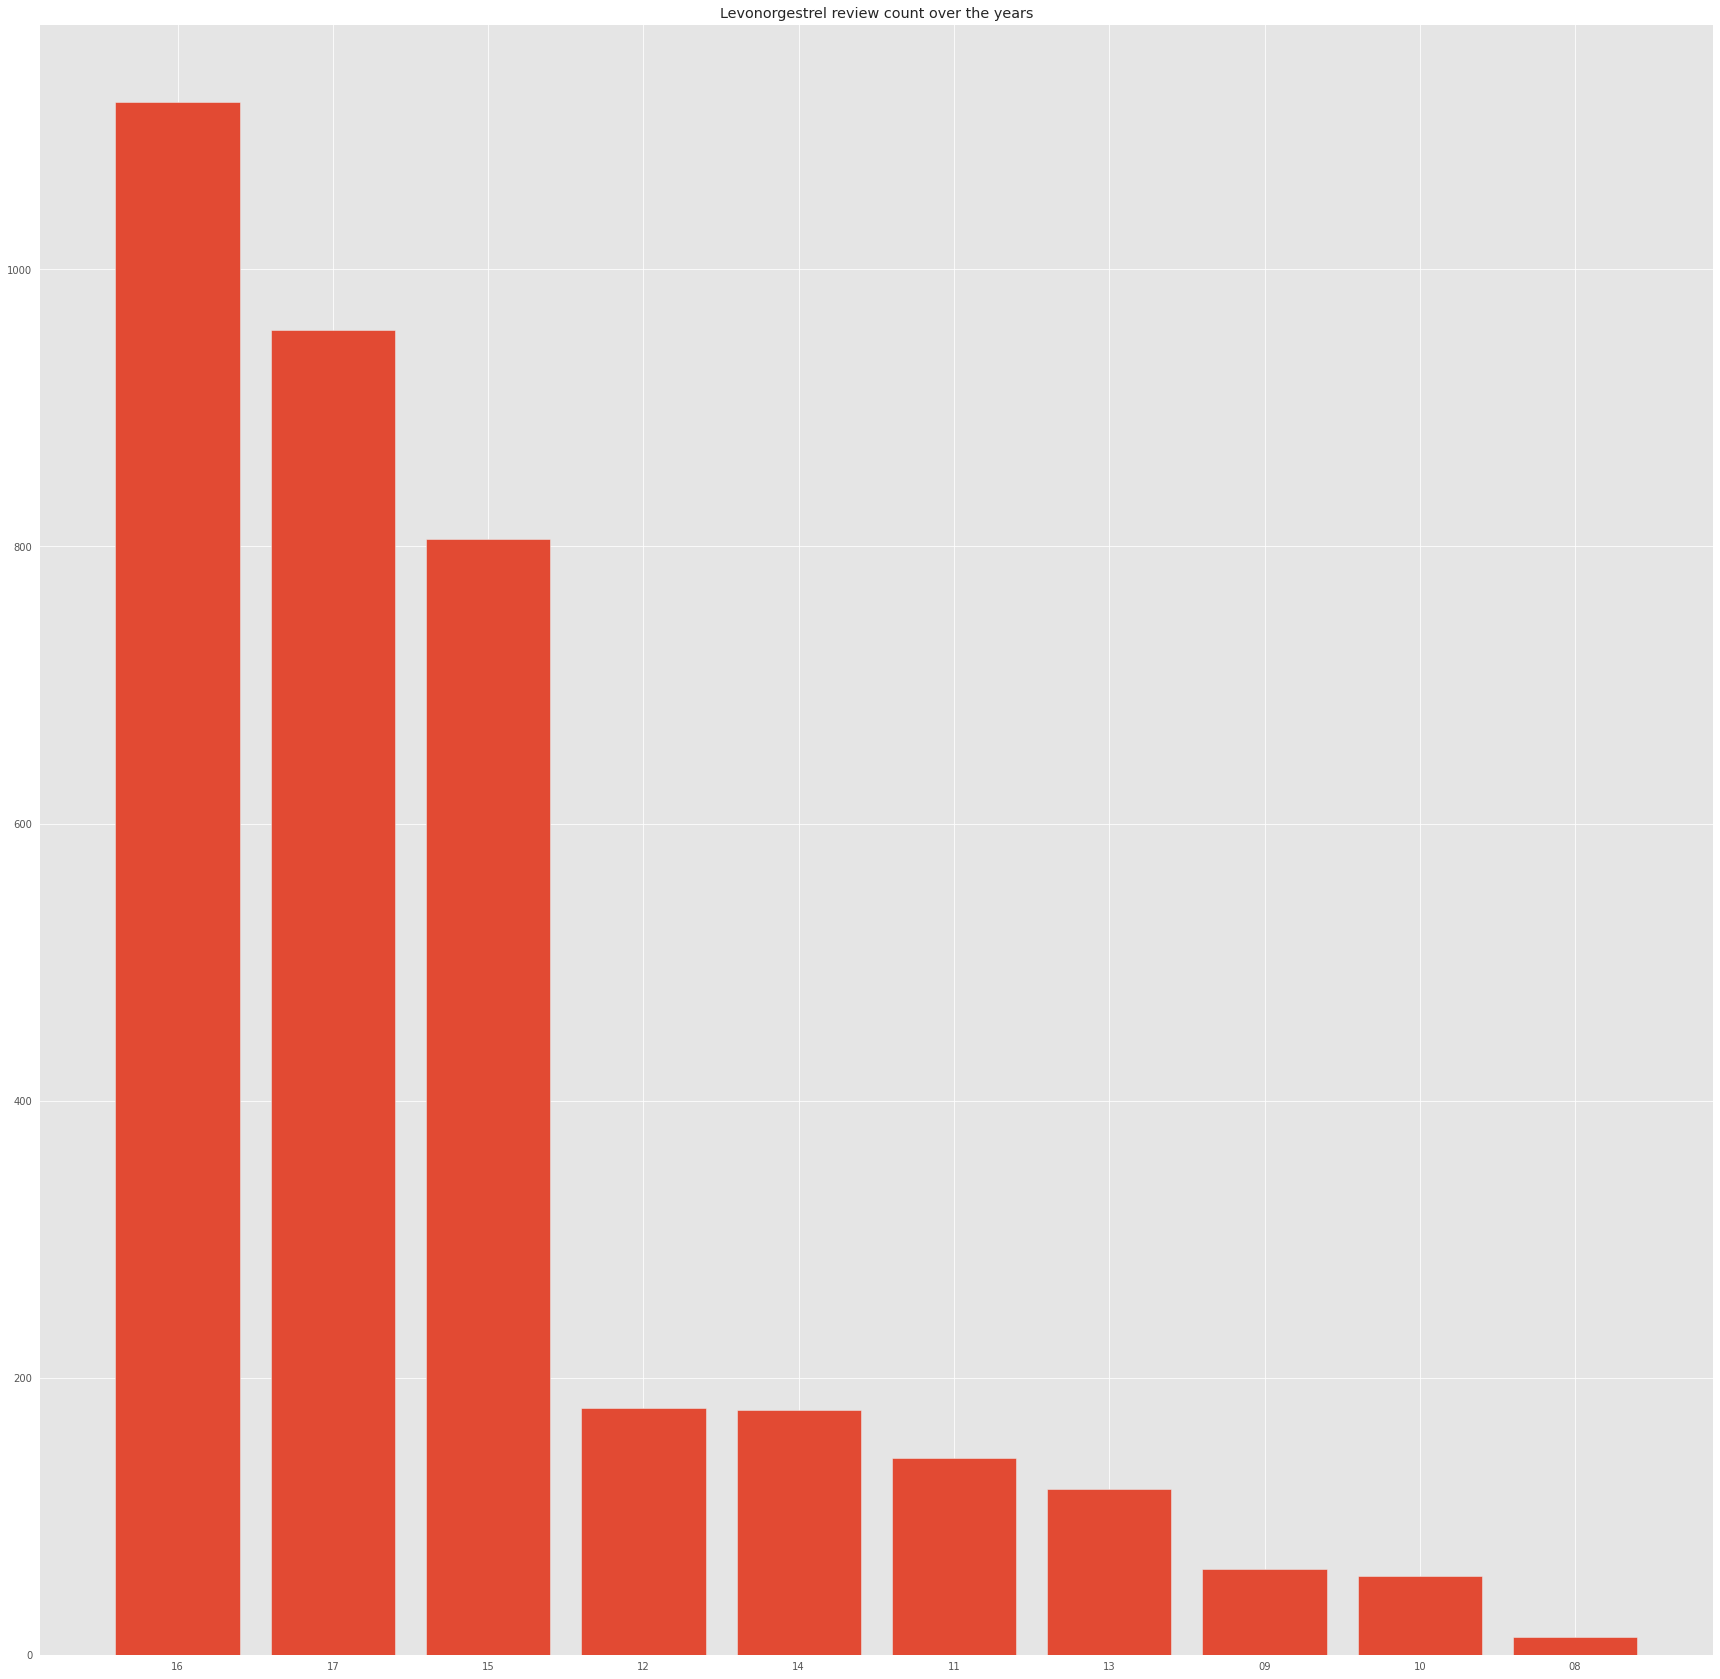

Etonogestrel


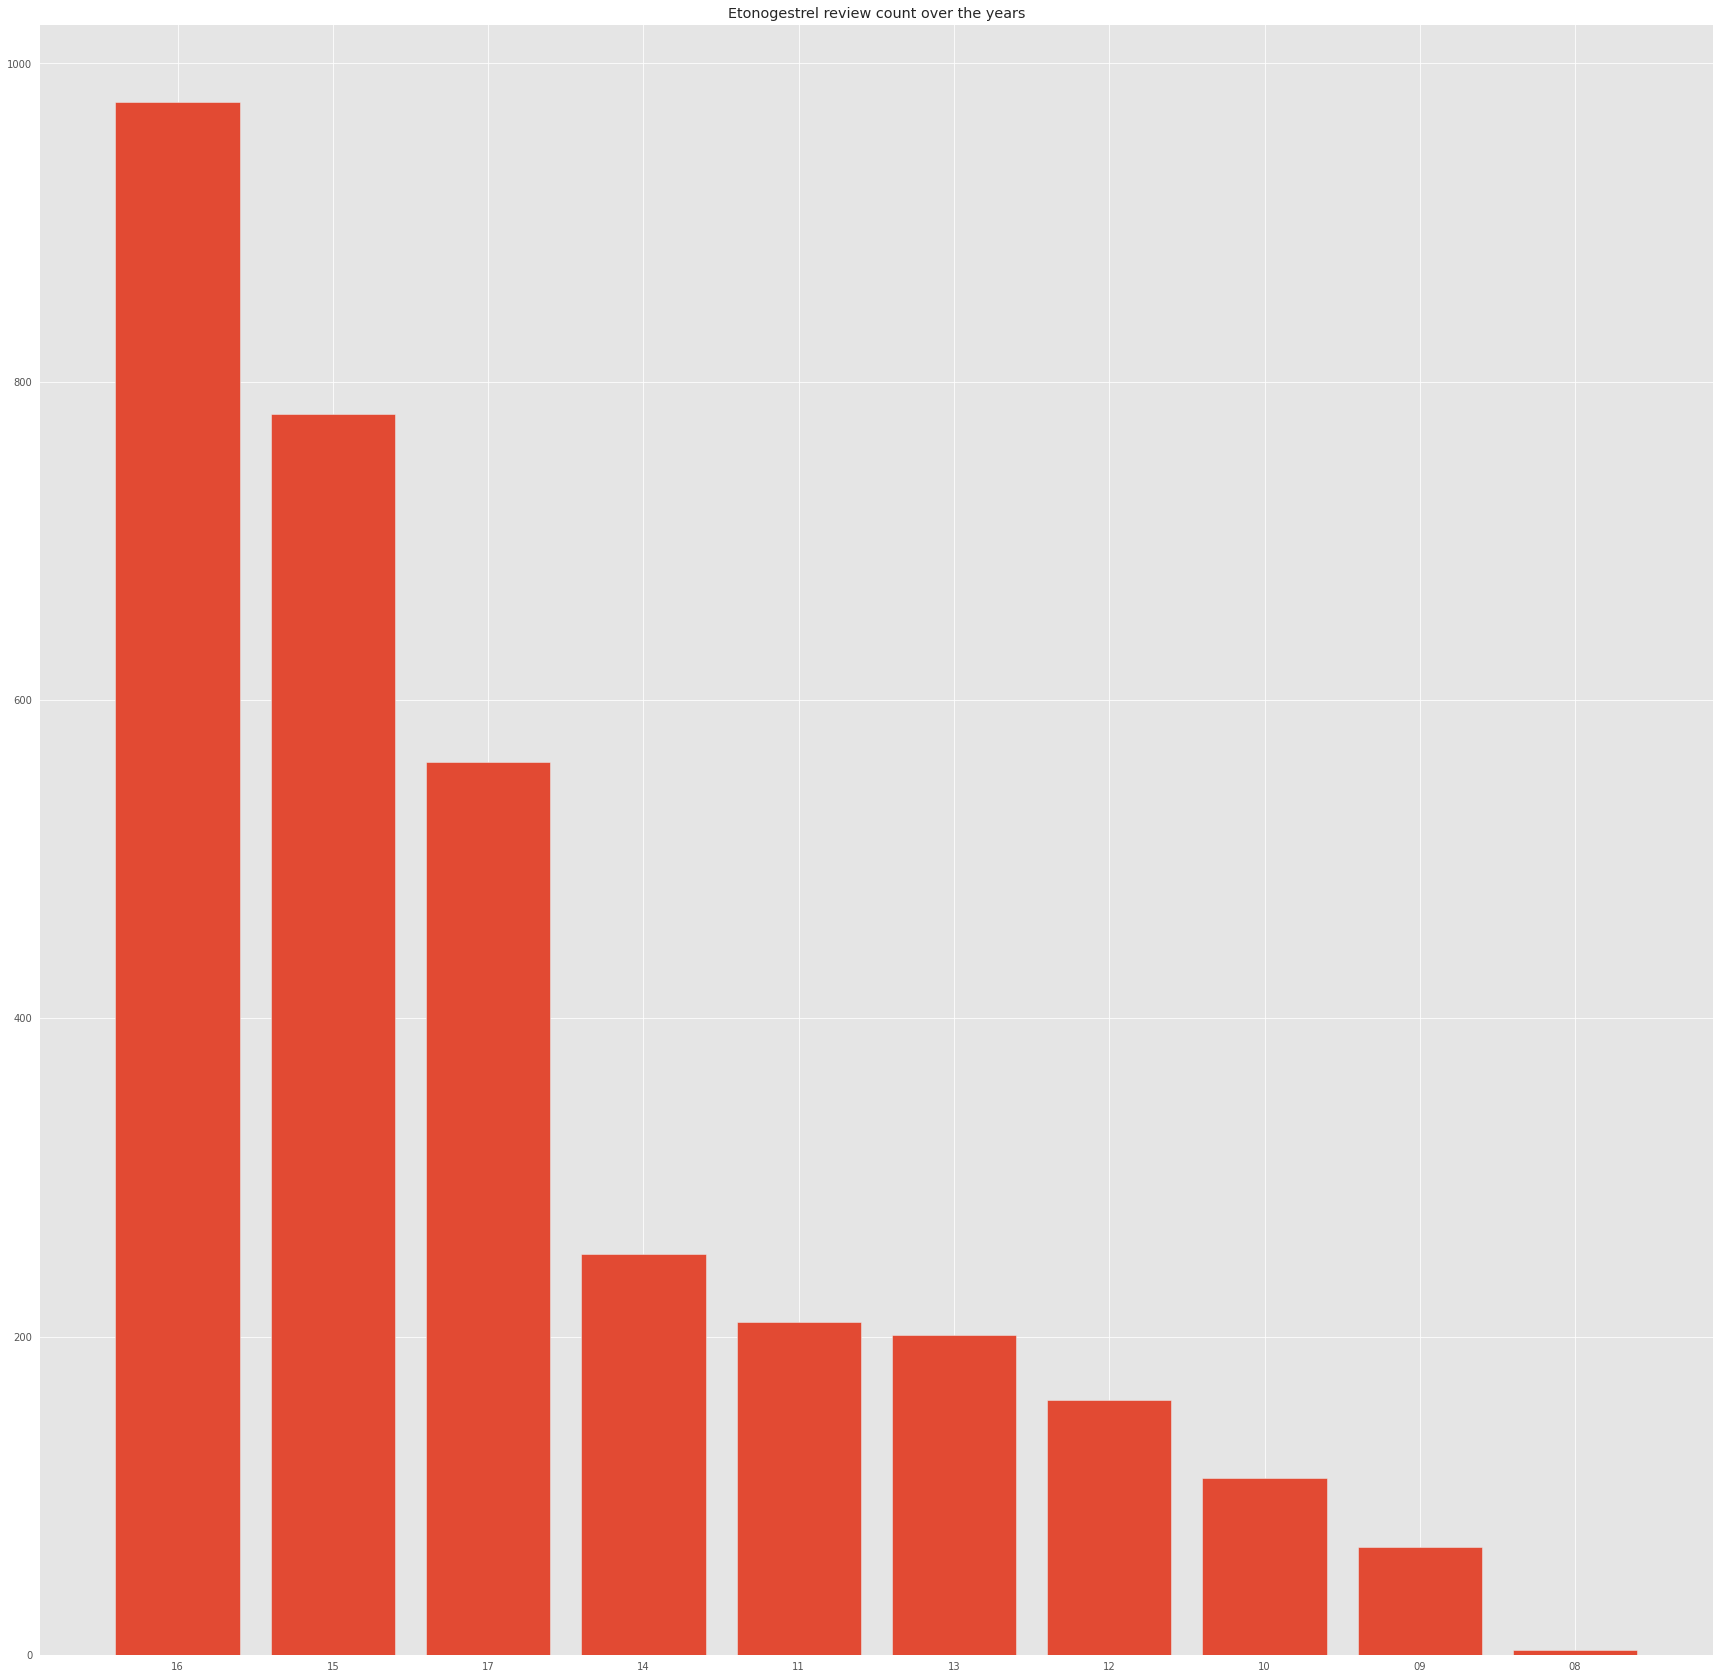

Ethinyl estradiol / norethindrone


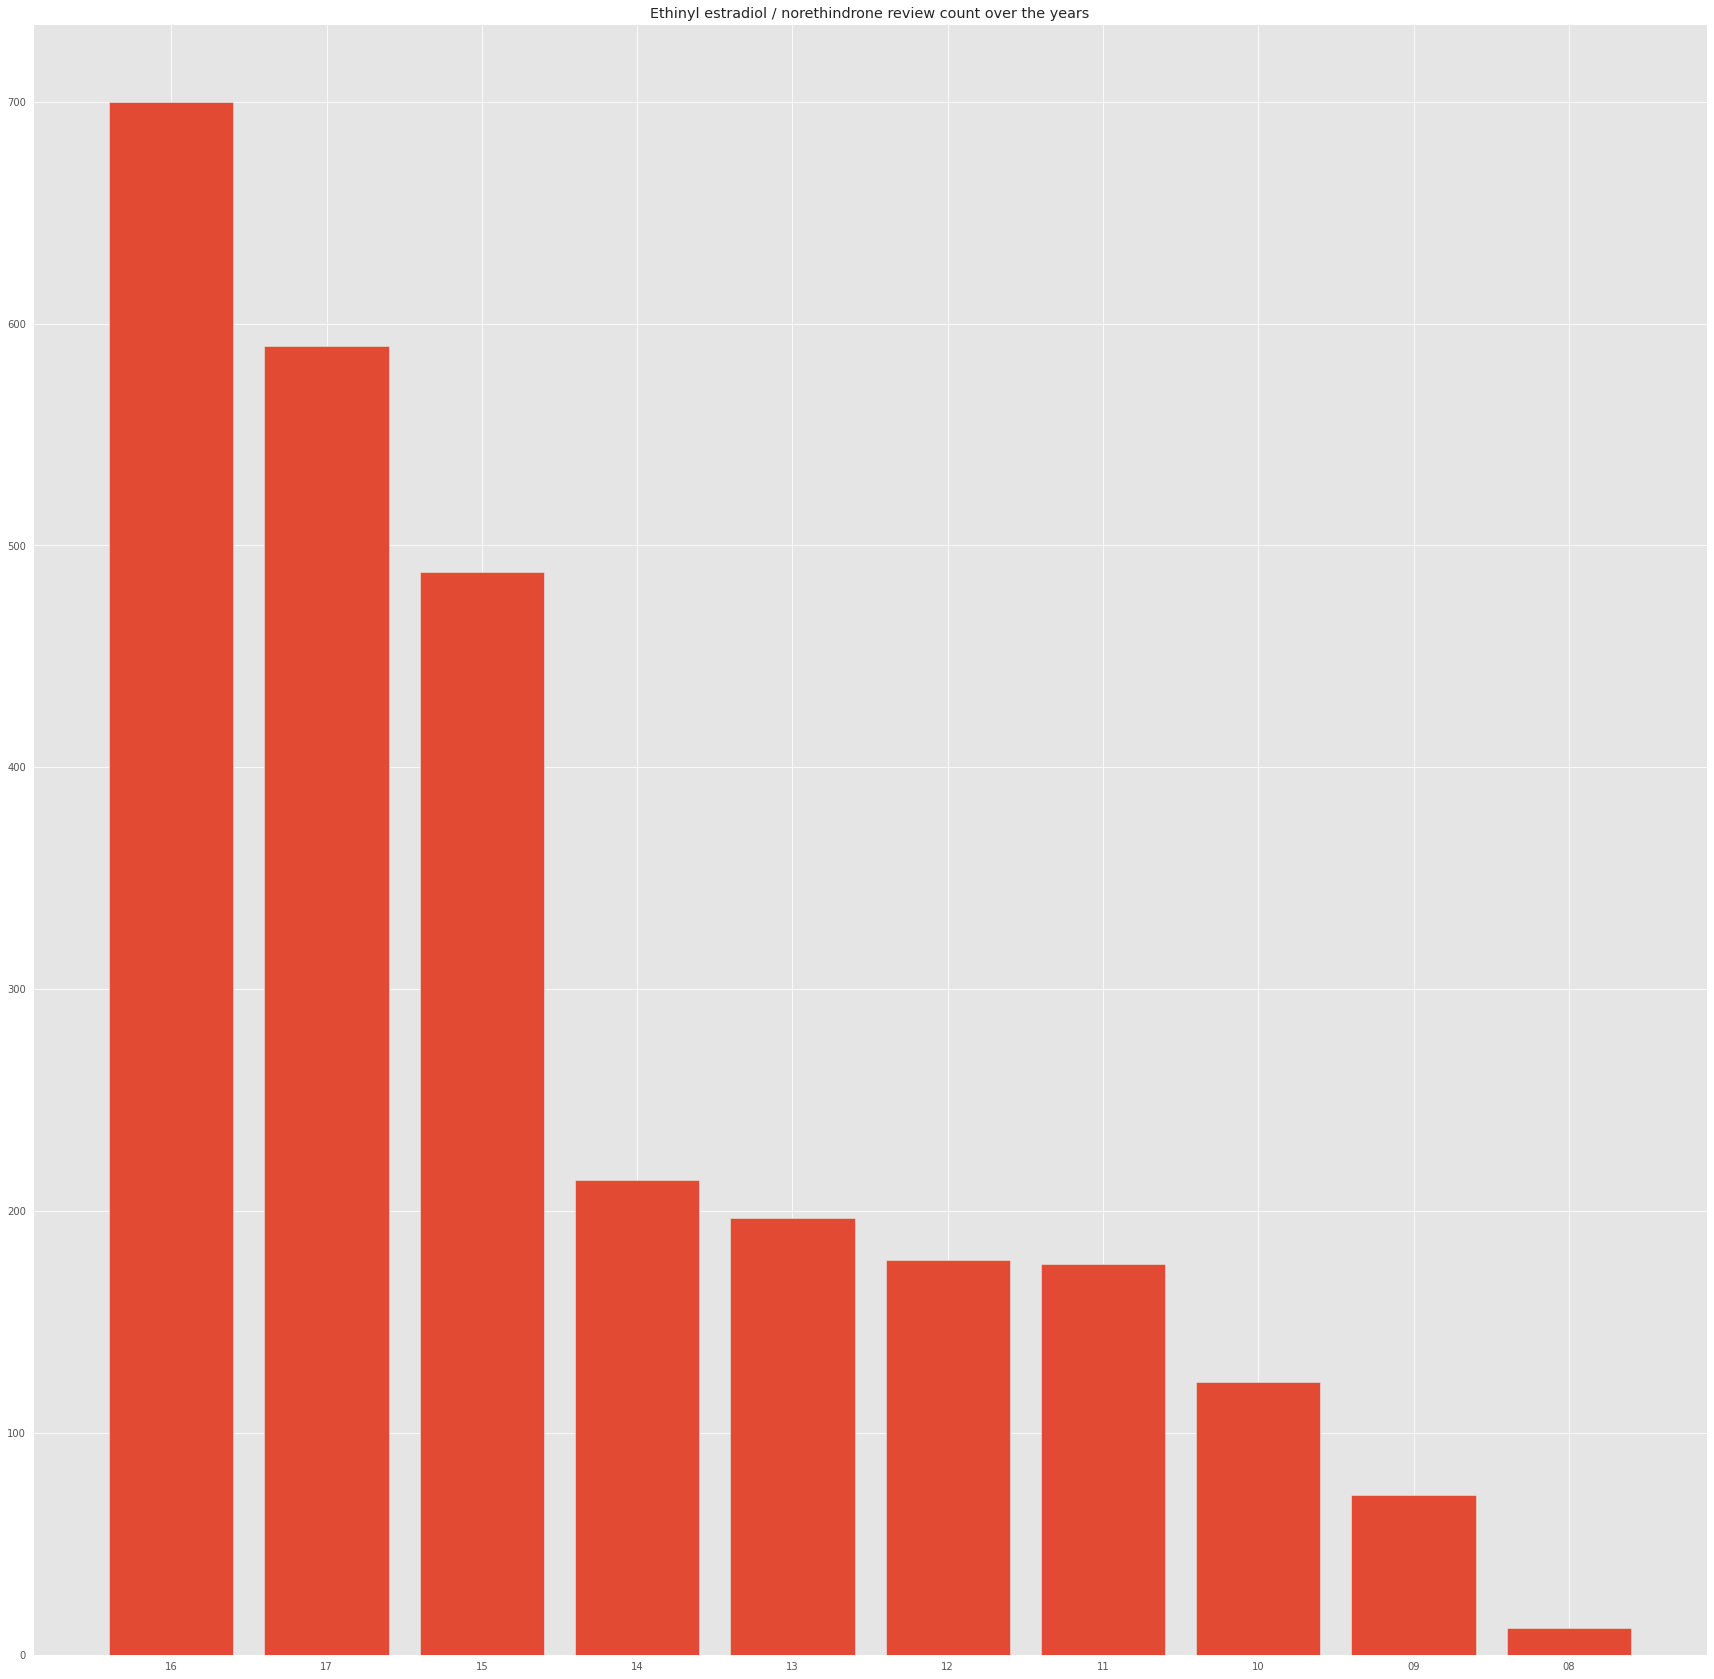

Nexplanon


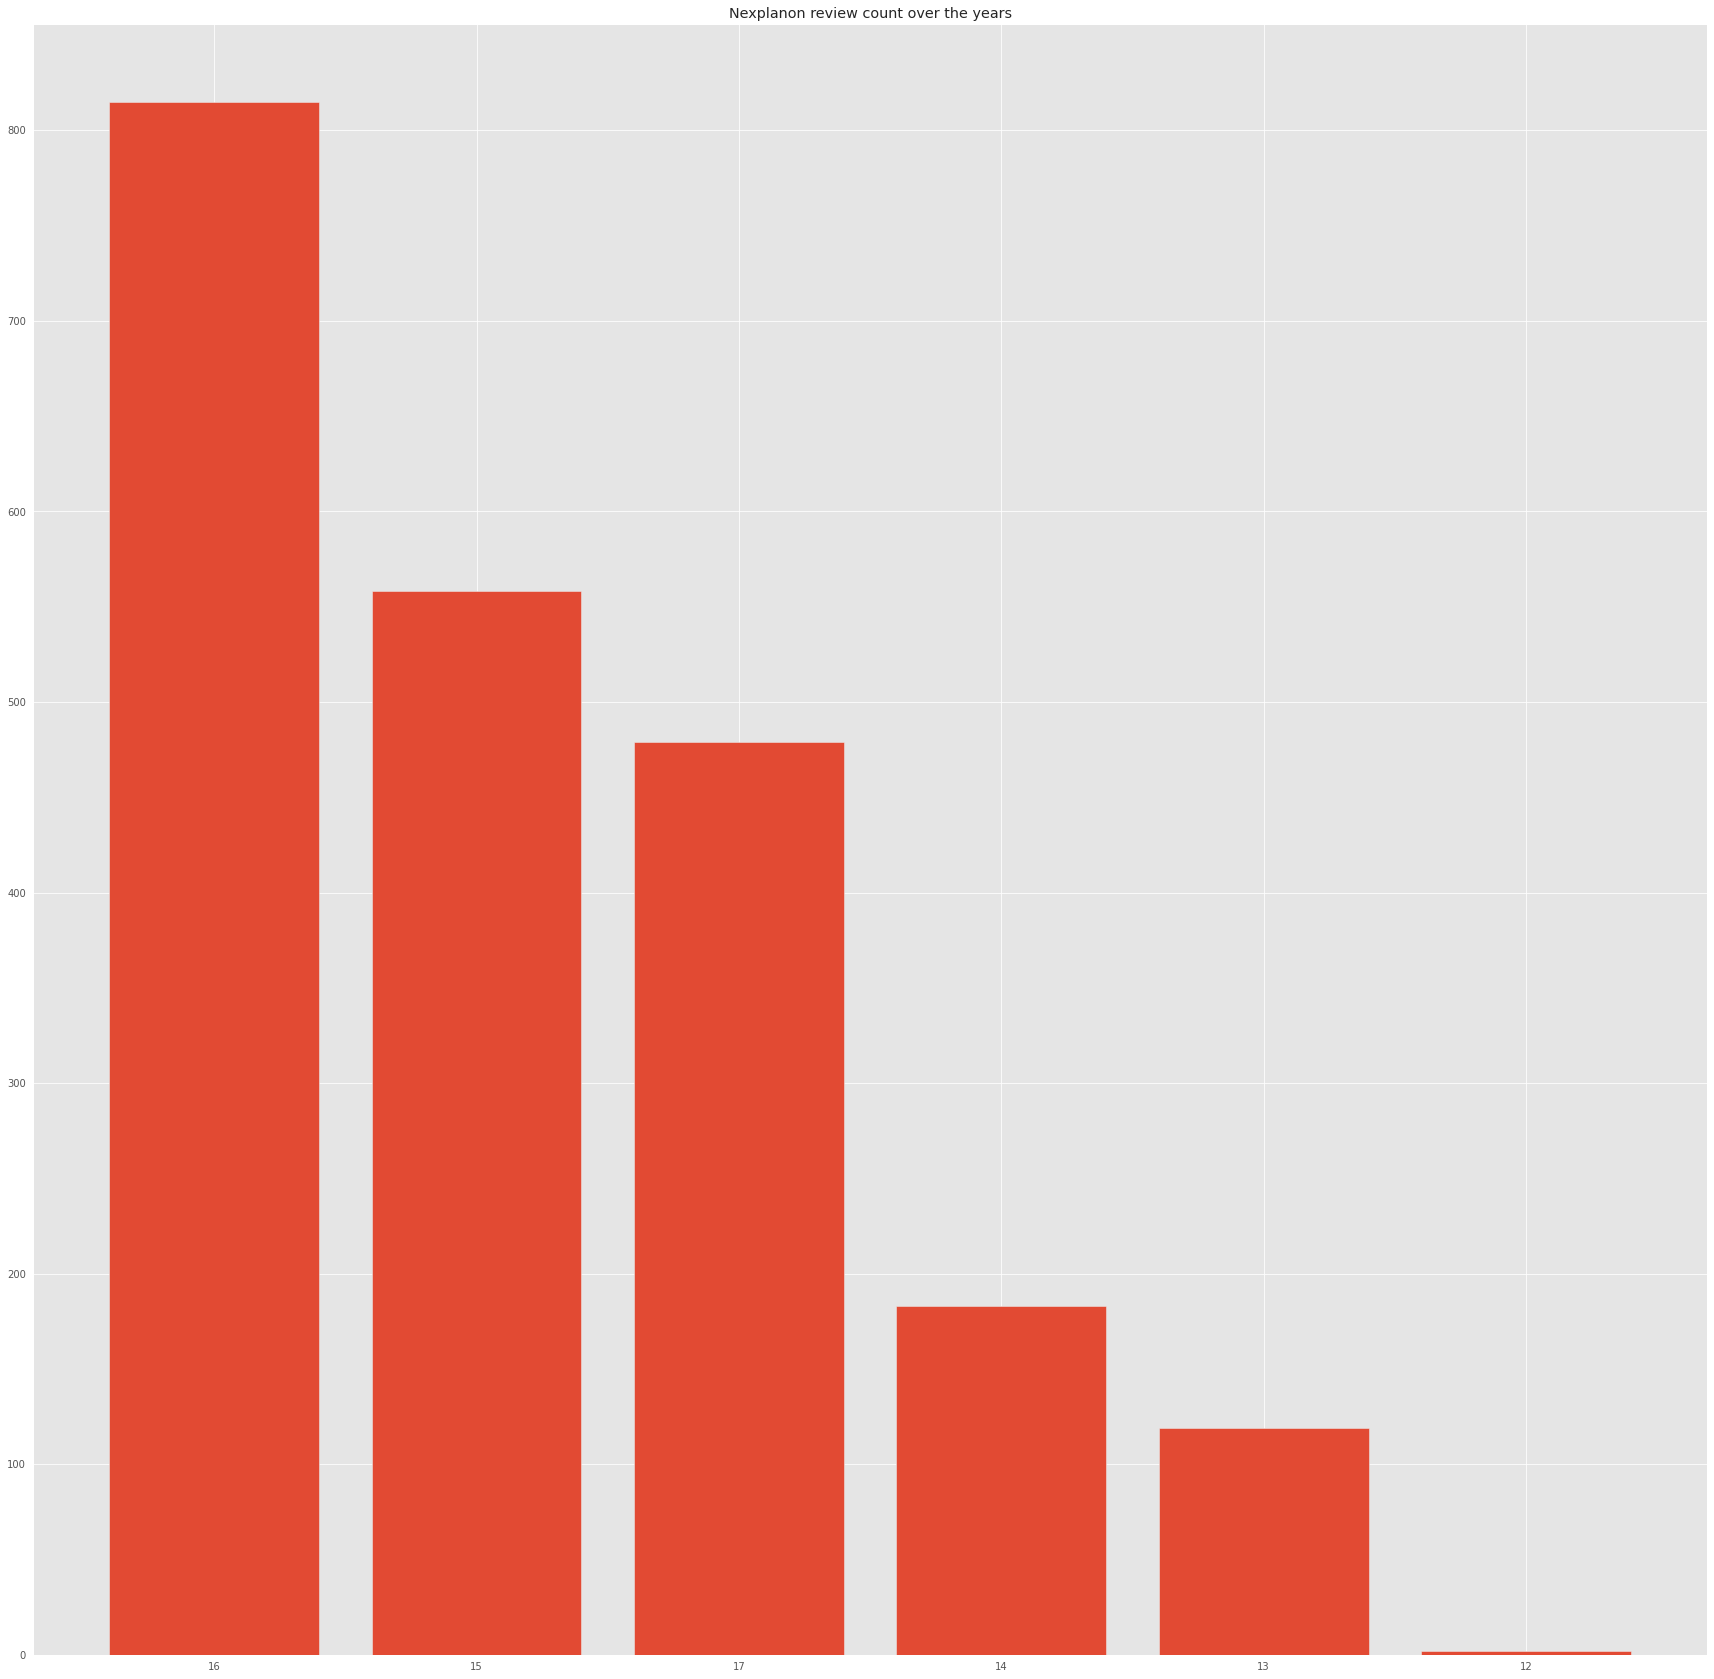

Ethinyl estradiol / norgestimate


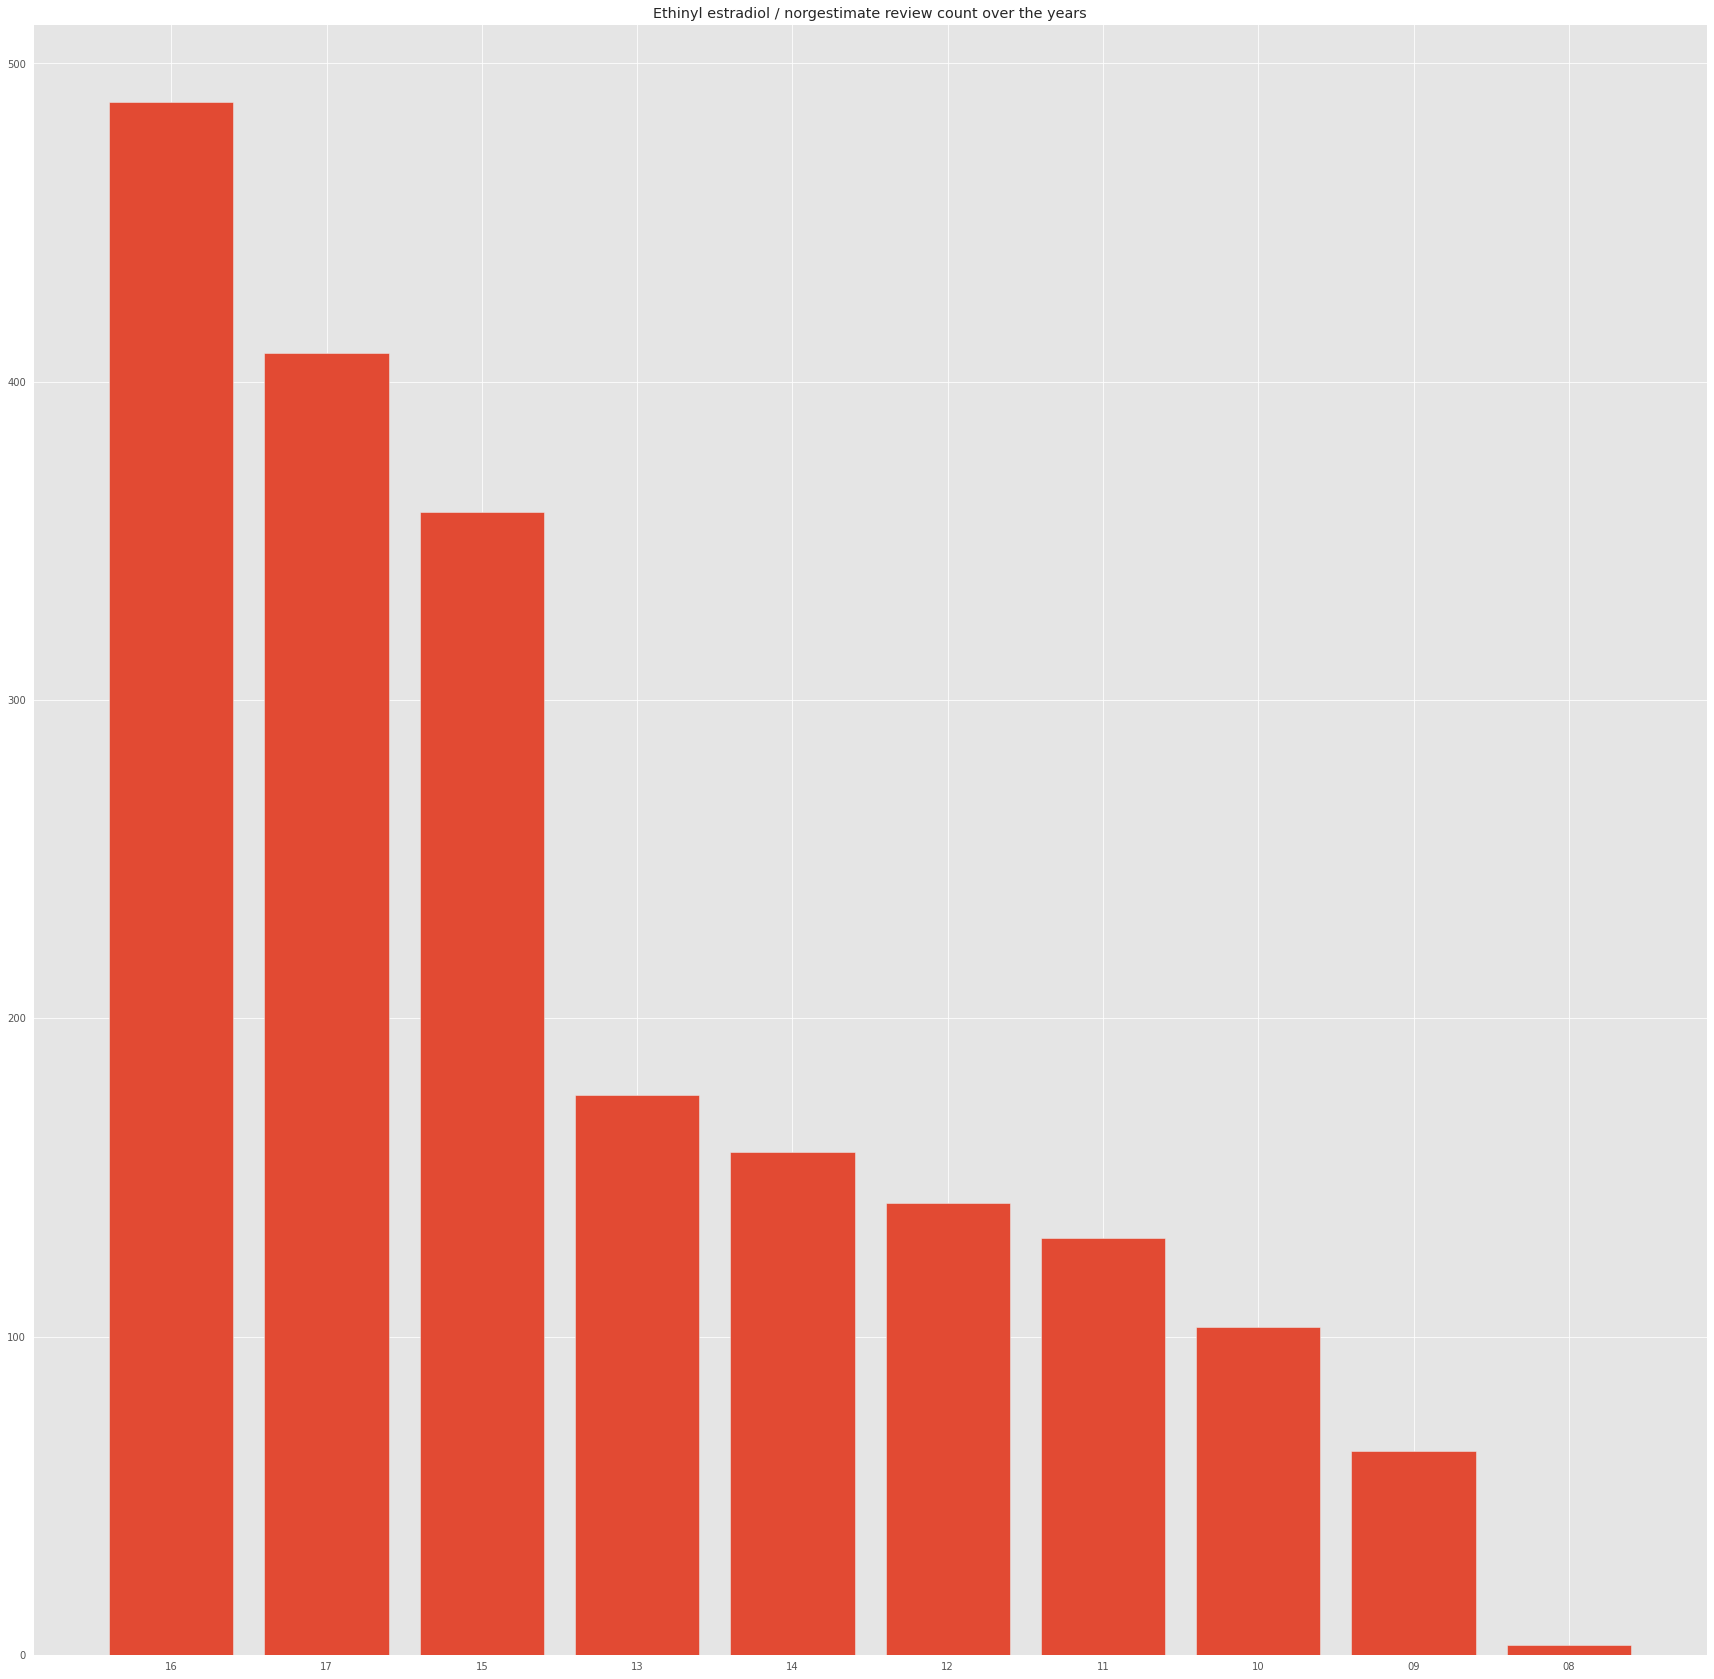

In [933]:
for drug in most_popular_drugs.index[:5]:
    print(drug)
    plt.bar(train['year'][train['drugName'] == drug].value_counts().index, train['year'][train['drugName'] == drug].value_counts())
    plt.title(drug + ' review count over the years')
    plt.show()

# Most popular drugs and conditions have most reviews in the last years, those being the most popular years for reviews

In [14]:
test["year"] = [x[-2:] for x in test["date"]]

Levonorgestrel


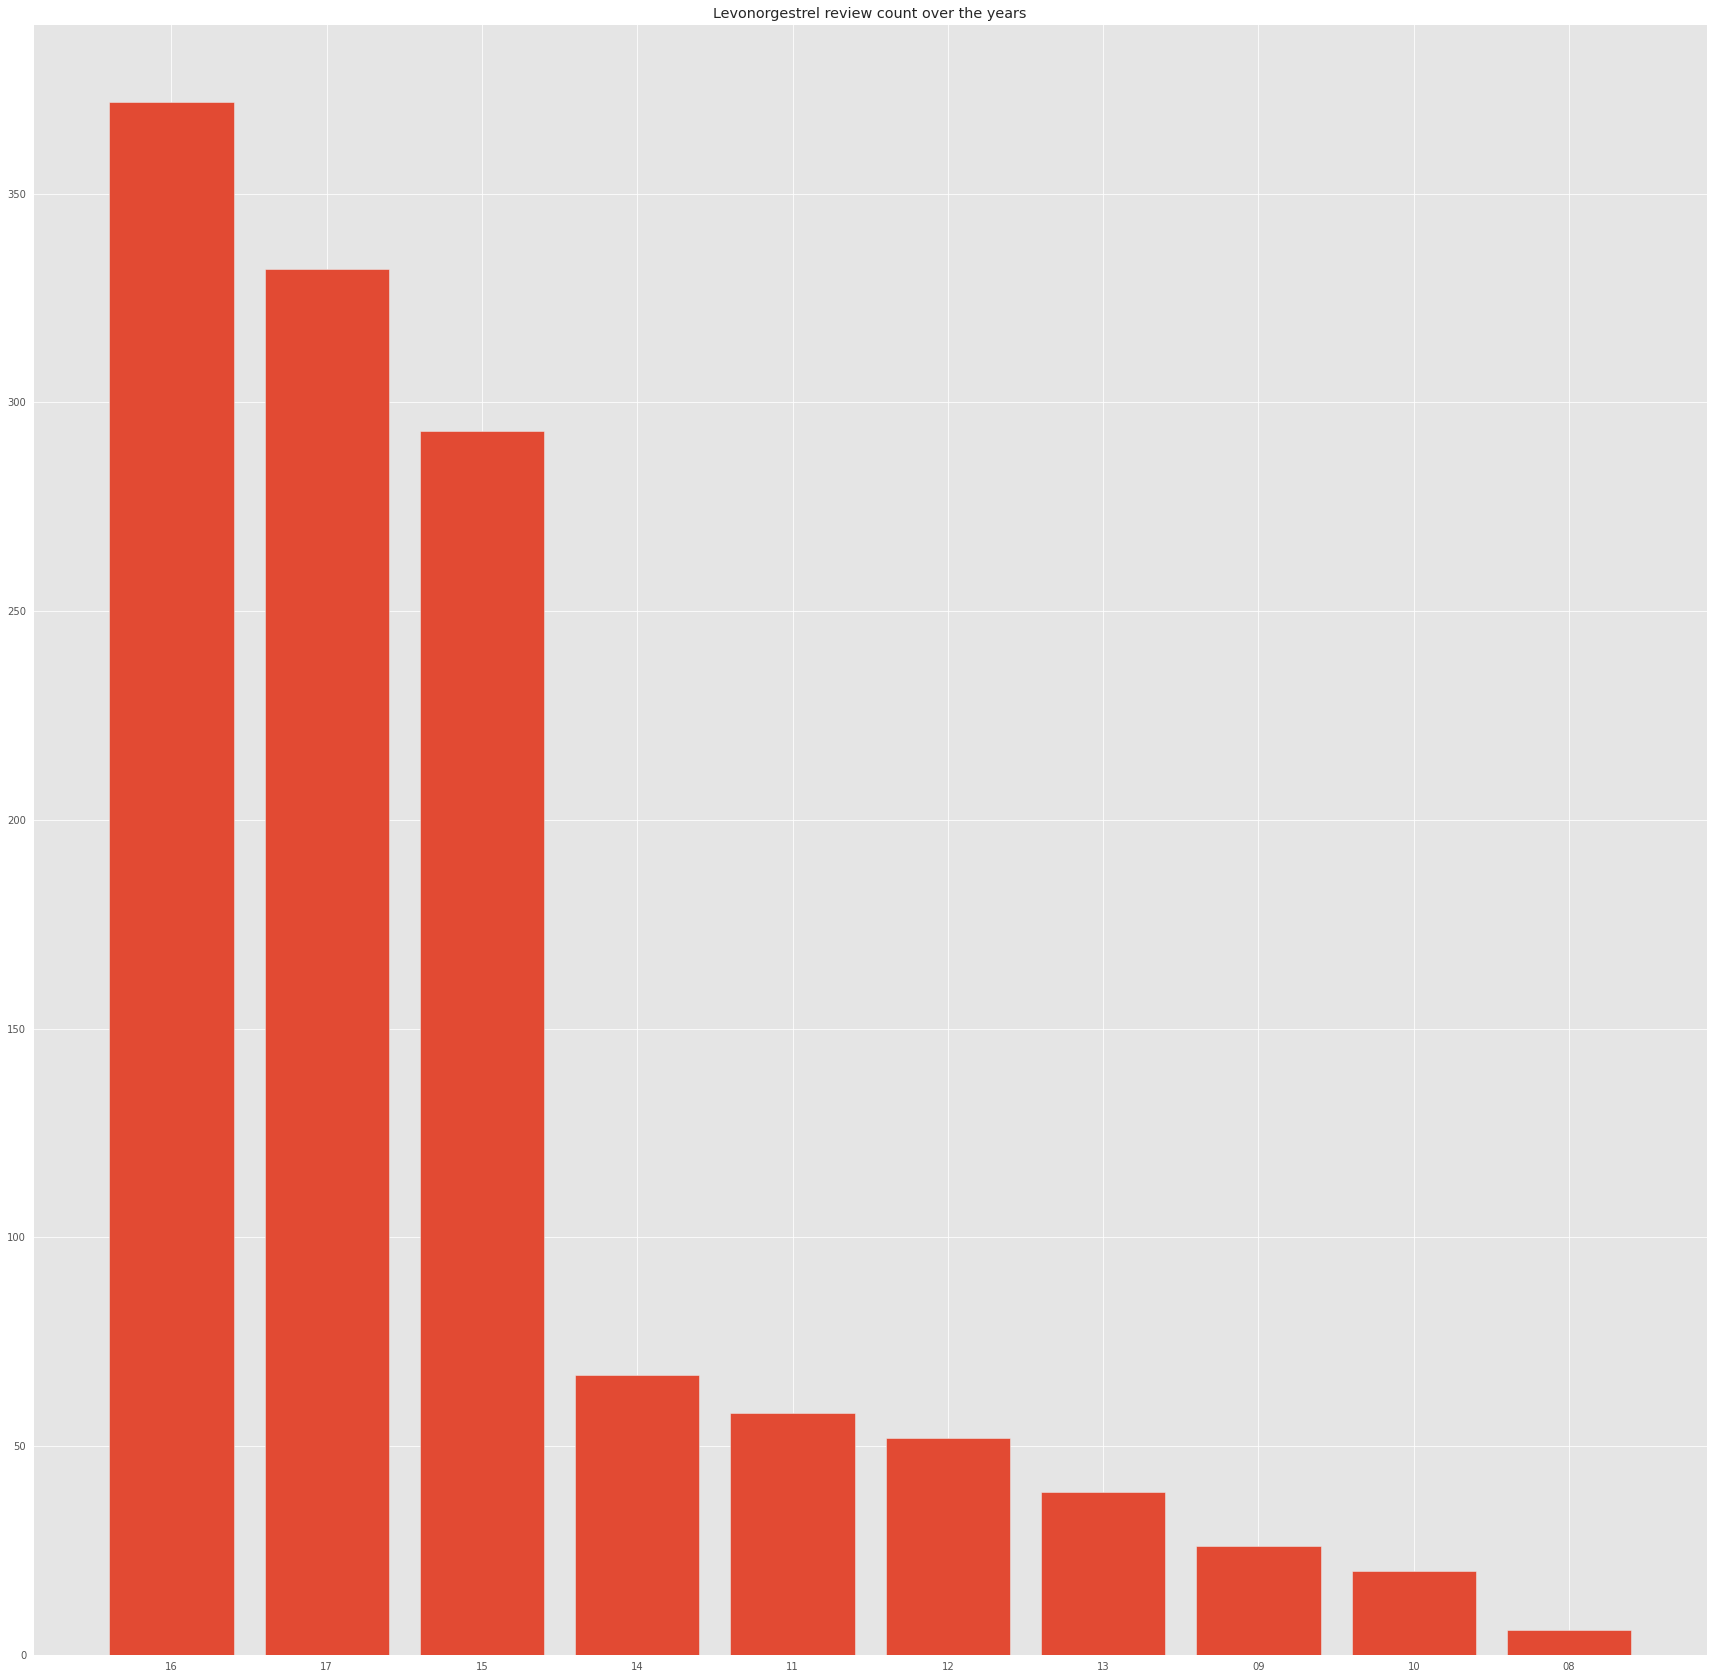

Etonogestrel


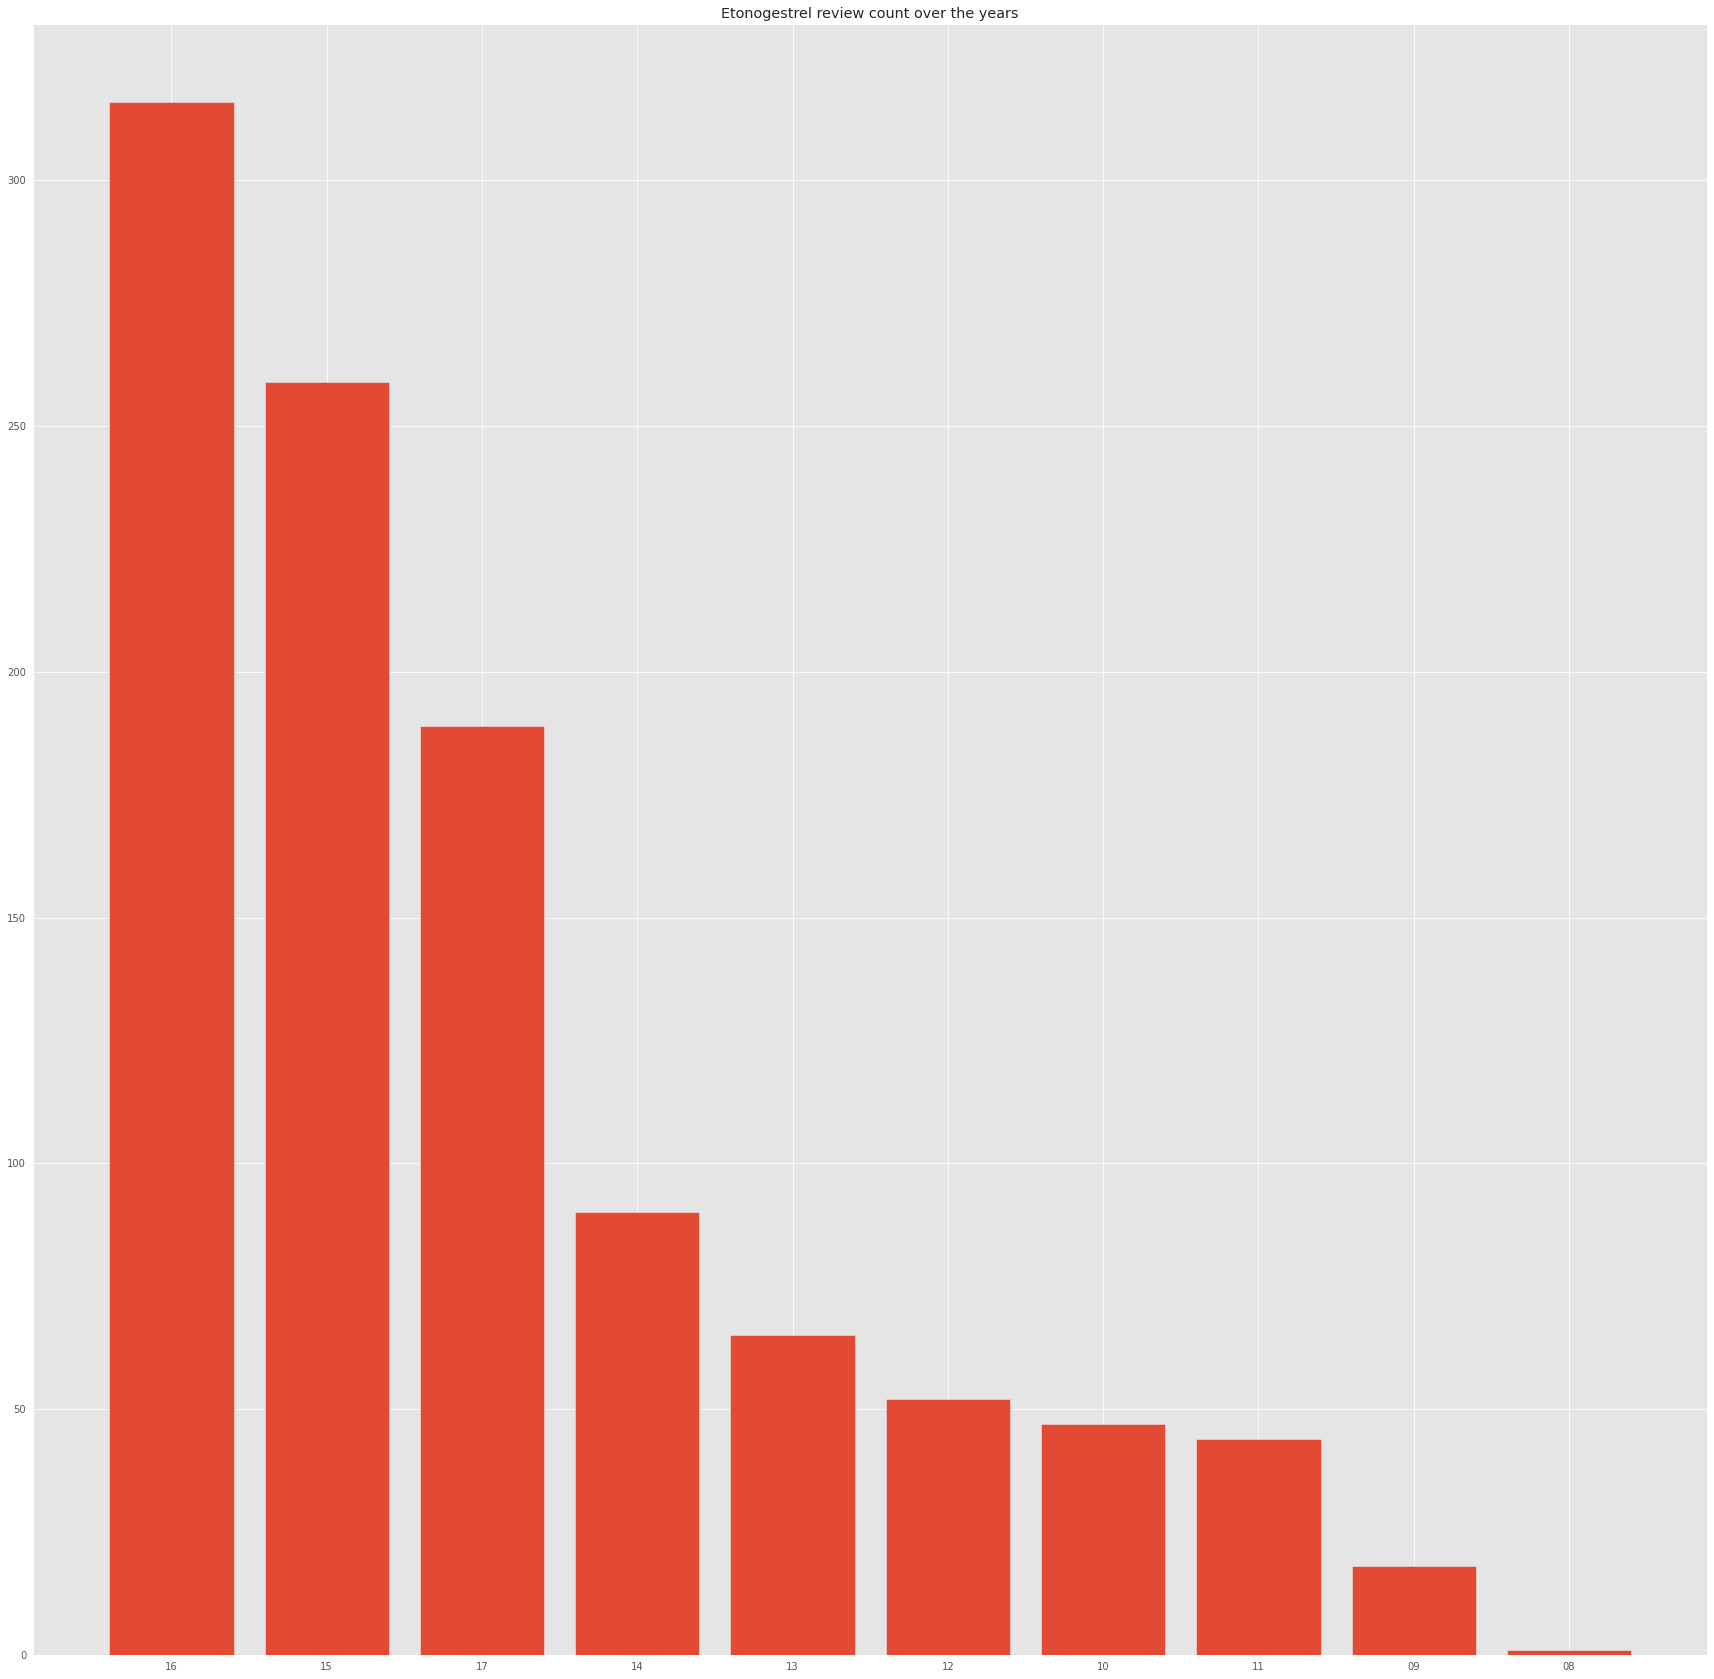

Ethinyl estradiol / norethindrone


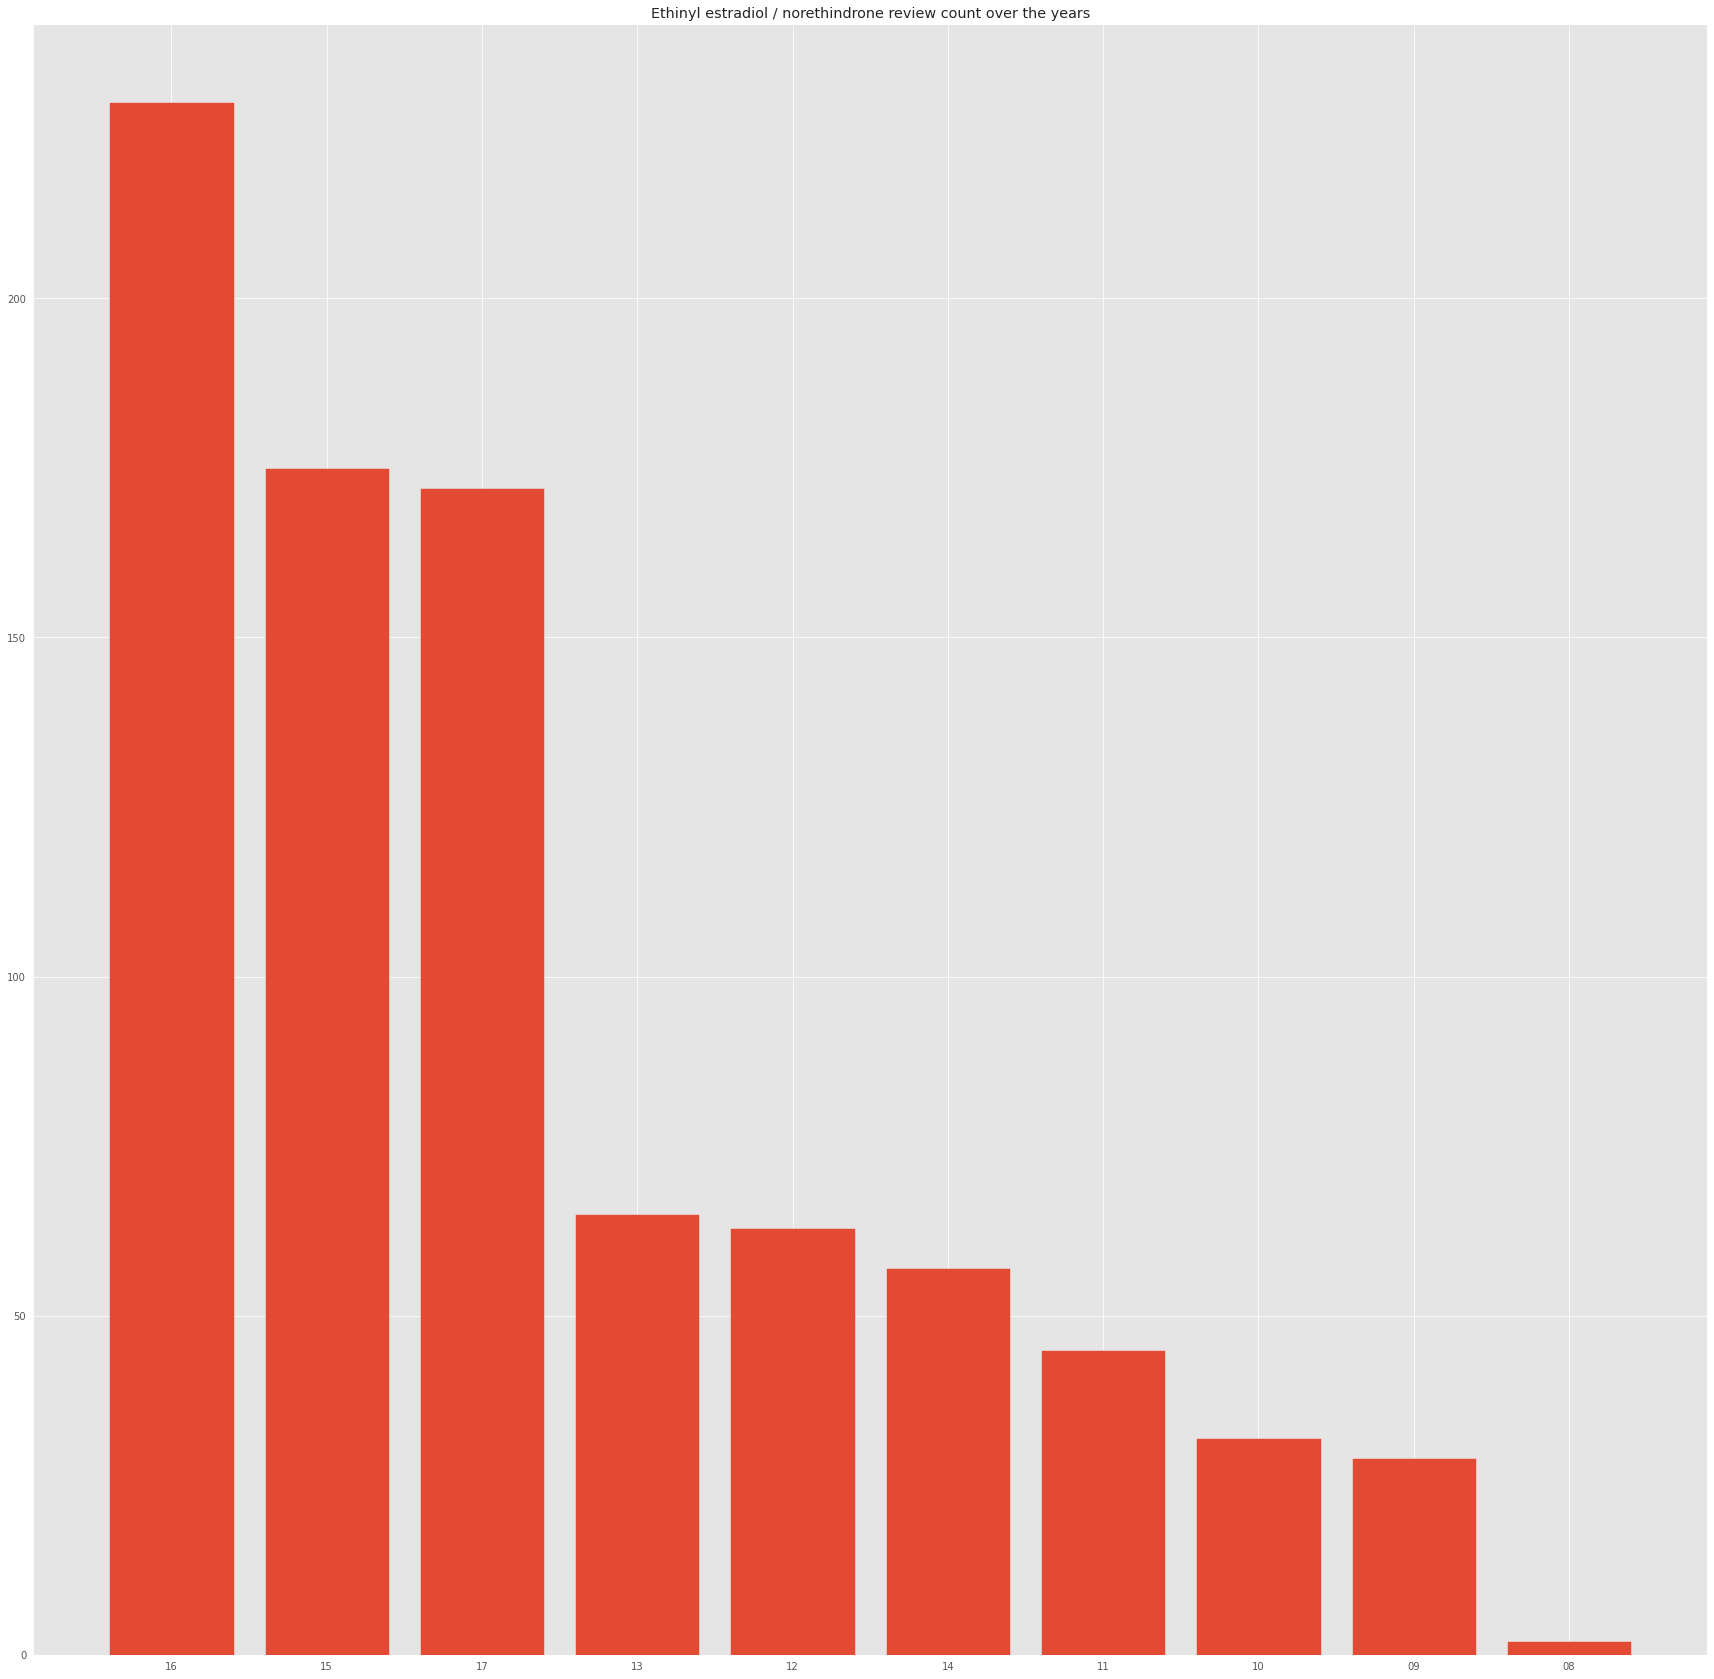

Nexplanon


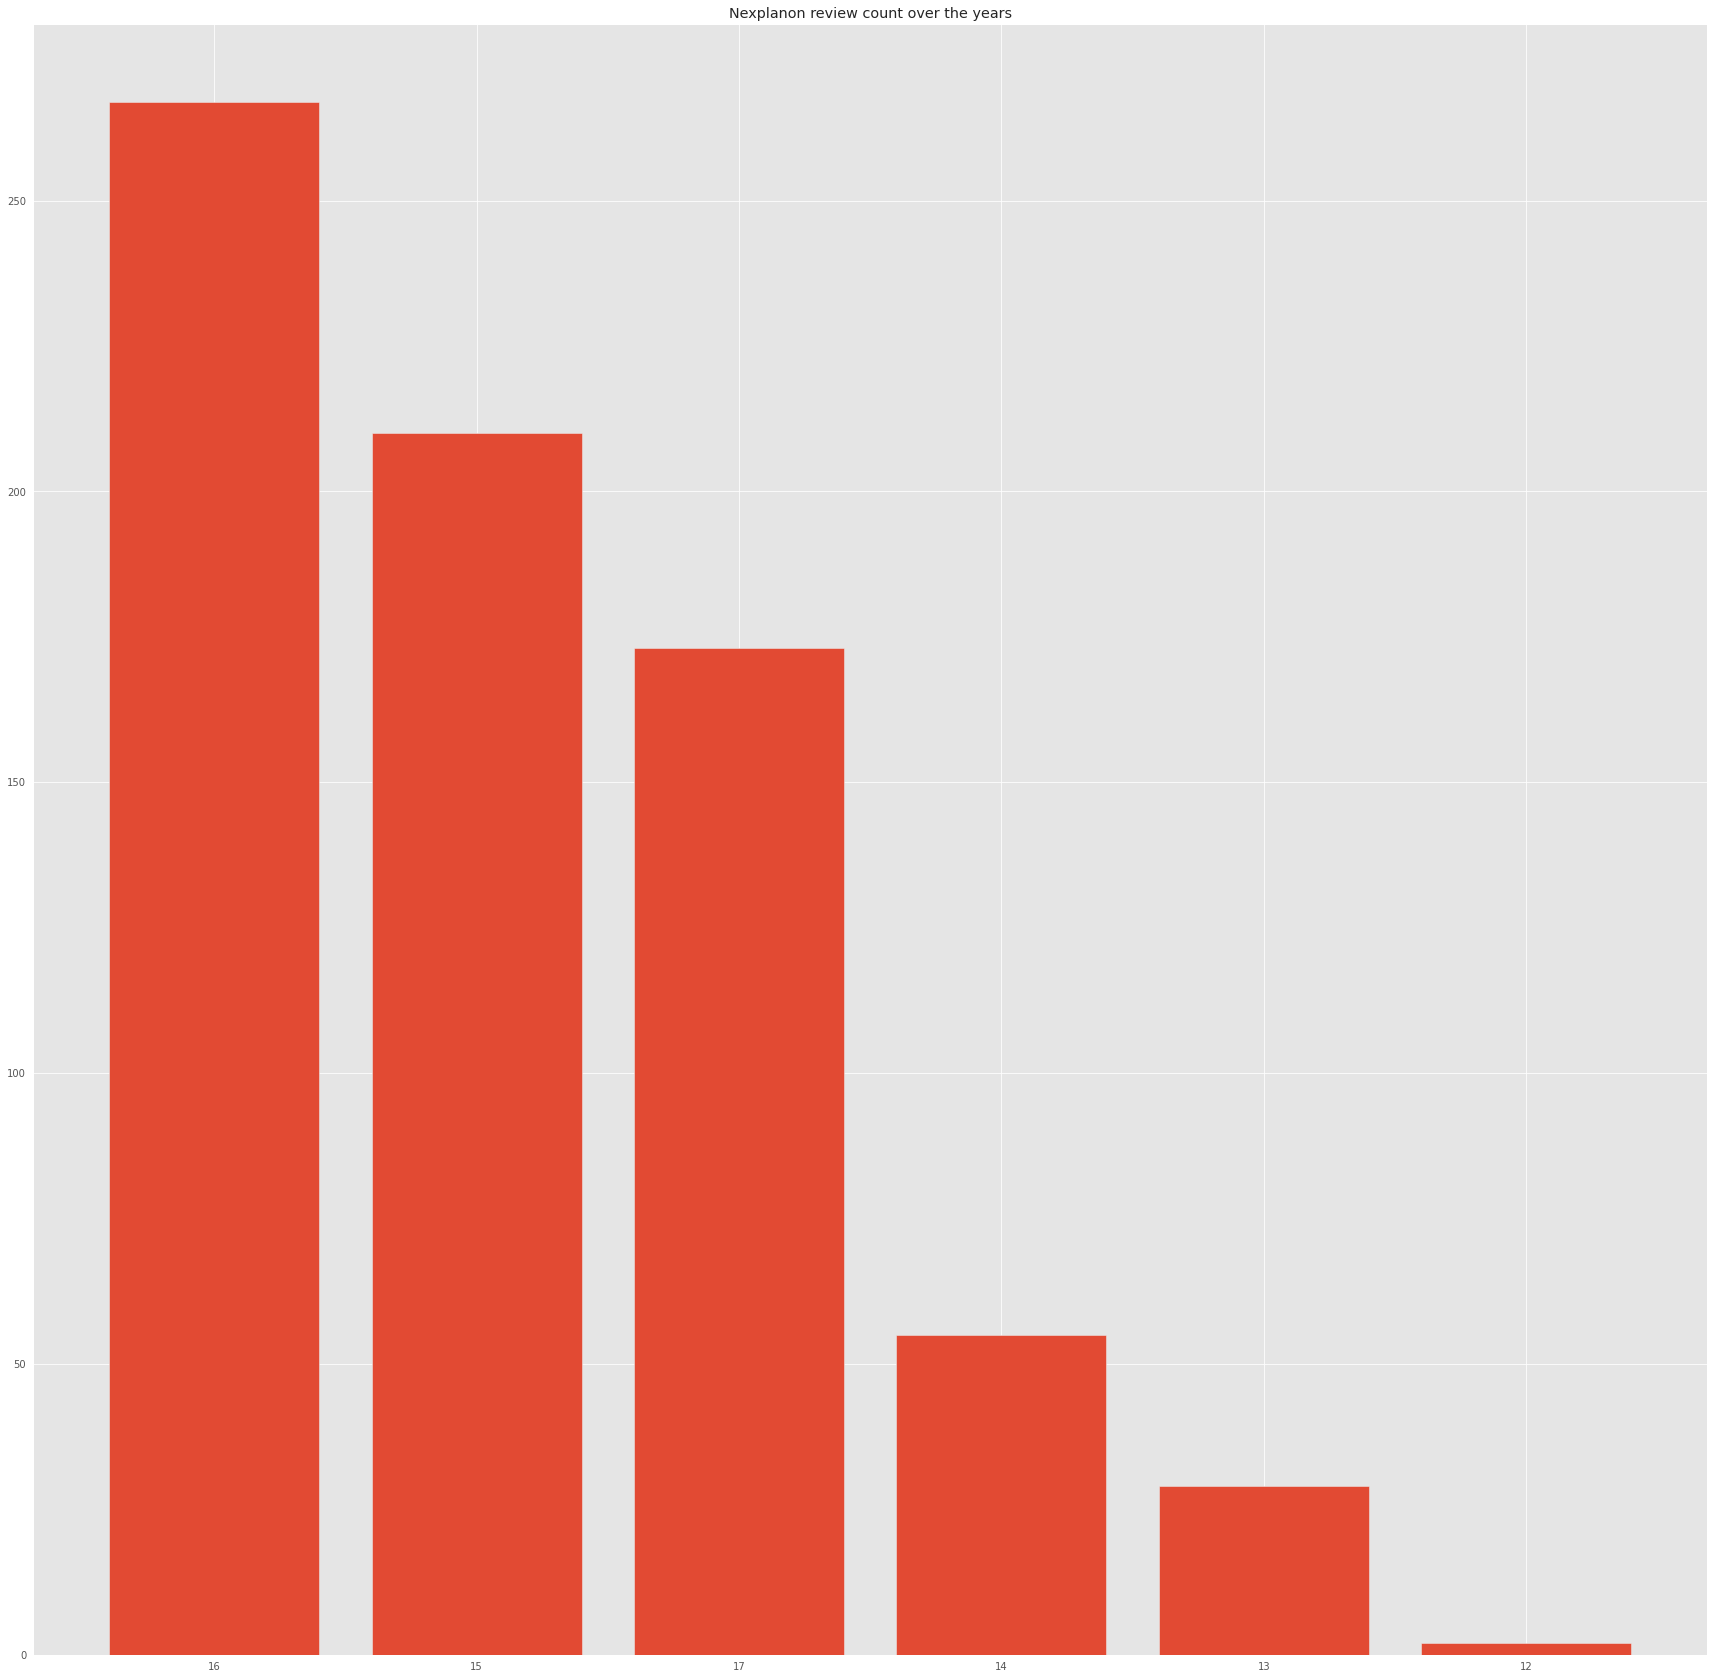

Ethinyl estradiol / norgestimate


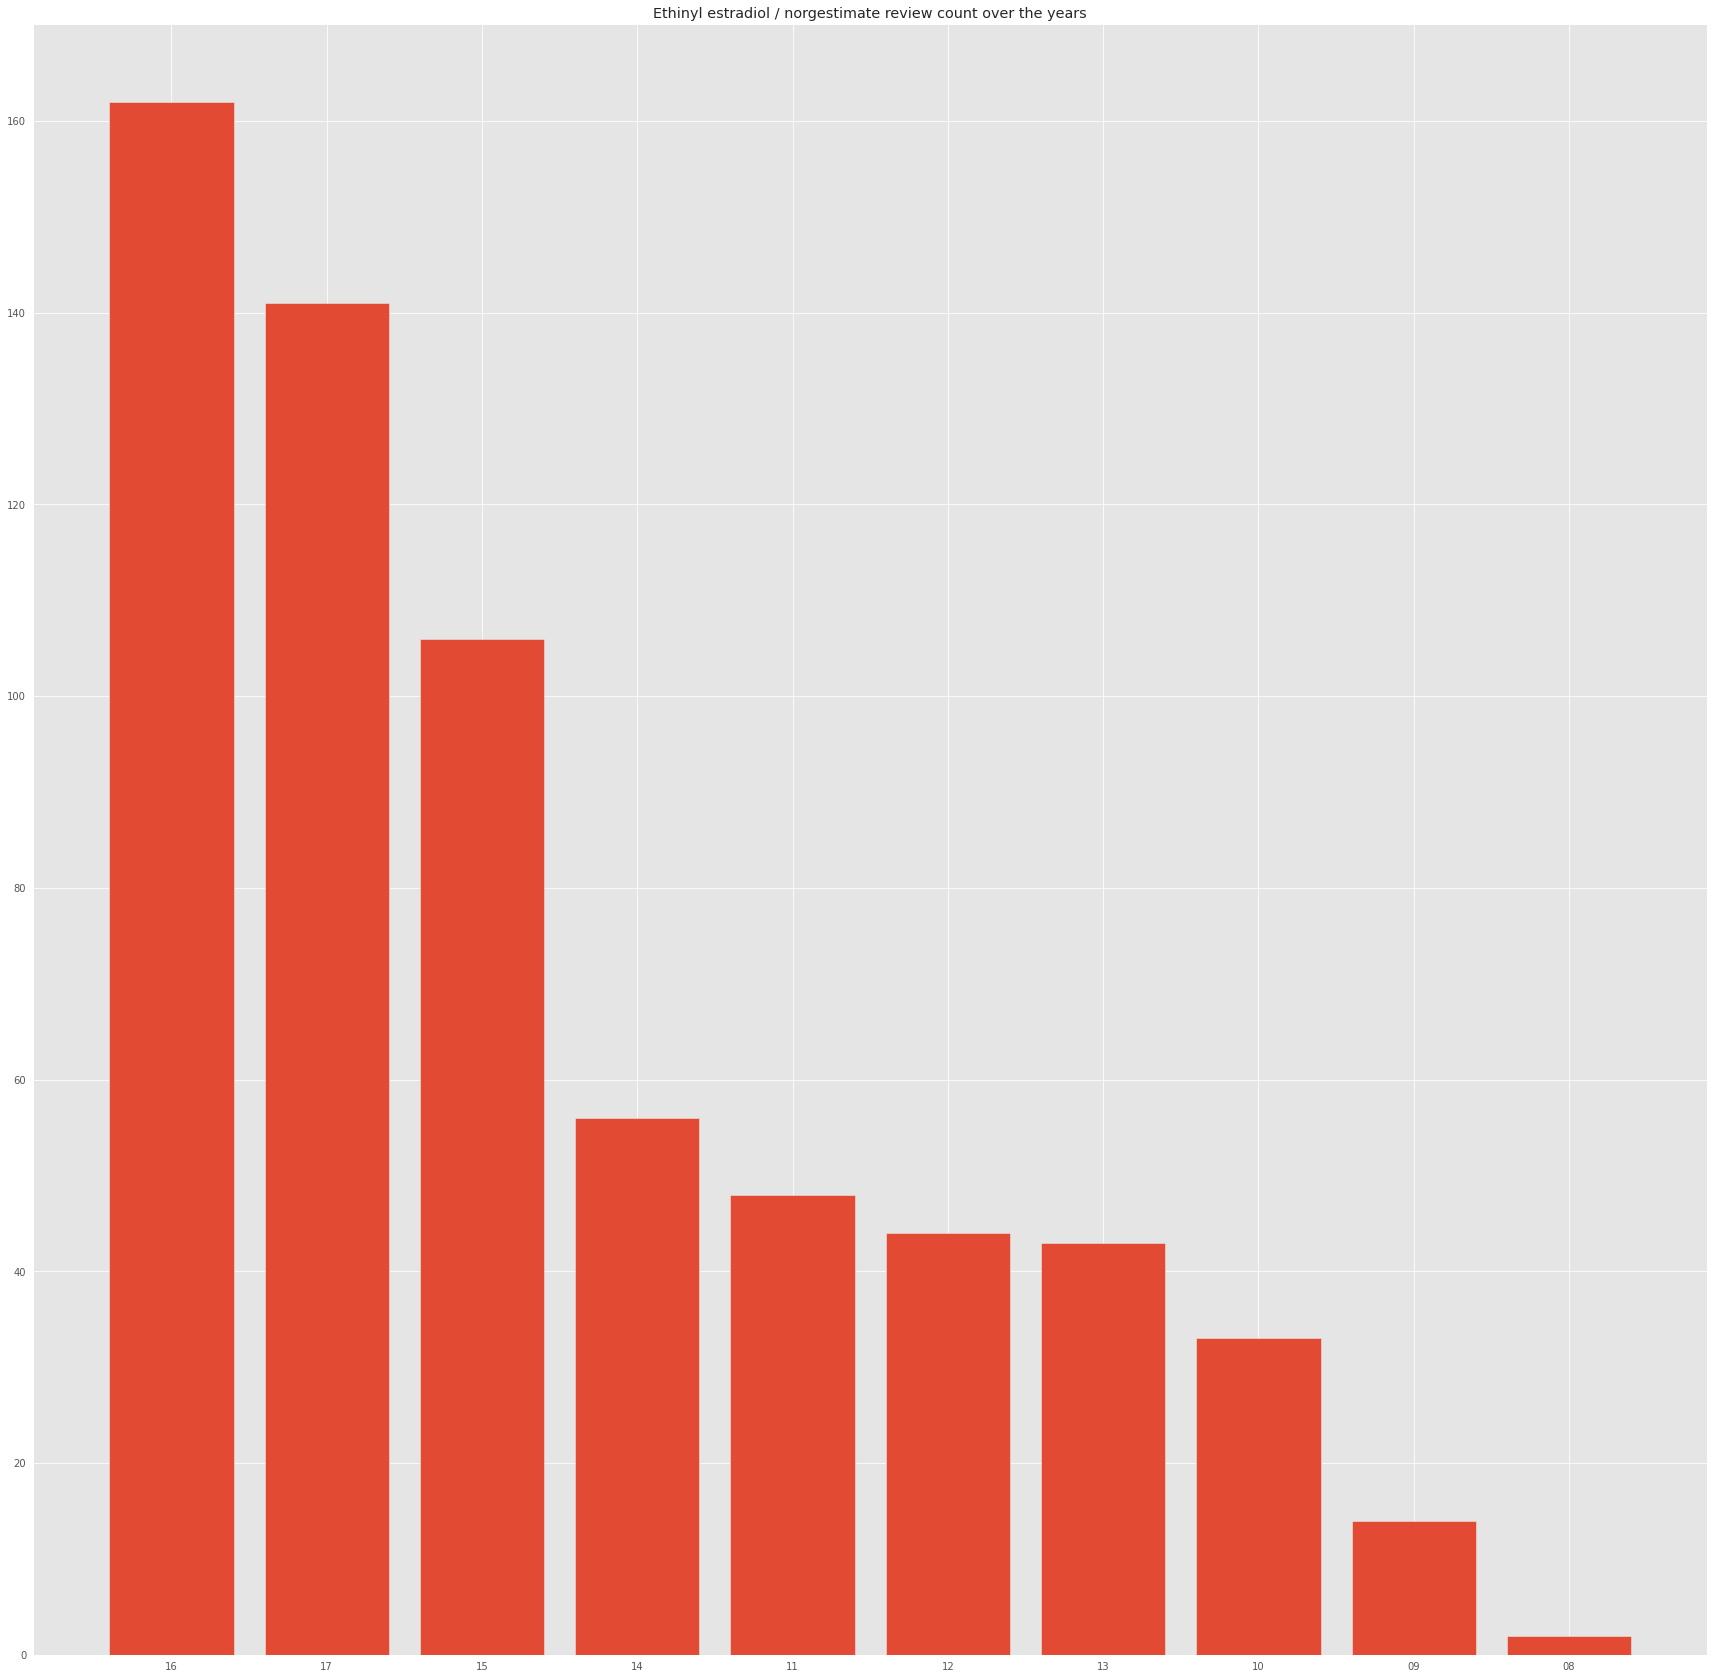

In [935]:
for drug in most_popular_drugs.index[:5]:
    print(drug)
    plt.bar(test['year'][test['drugName'] == drug].value_counts().index, test['year'][test['drugName'] == drug].value_counts())
    plt.title(drug + ' review count over the years')
    plt.show()

In [16]:
train["how current it is"] = train["year"].apply(lambda x: "current" if int(x) > 14 else "more distant" if int(x) <= 14 and int(x) >= 11 else "very distant")

In [17]:
test["how current it is"] = test["year"].apply(lambda x: "current" if int(x) > 14 else "more distant" if int(x) <= 14 and int(x) >= 11 else "very distant")

# Look if all the drugs and conditions are relevant

In [938]:
#train["drugName"].value_counts().sum()

In [939]:
#train["drugName"].value_counts()[-3000:].unique

In [940]:
#train["drugName"].value_counts()[:431].unique

In [941]:
#train["condition"].value_counts().sum()

In [942]:
#train["condition"].value_counts()[-500:].sum()

In [943]:
#train["condition"].value_counts()[:384]

In [23]:
cond_to_keep = train["condition"].value_counts()[:75].index

In [26]:
drug_to_keep = train["drugName"].value_counts()[:250].index

In [27]:
def relevant_entries(train):
    train = train[train["condition"].isin(cond_to_keep)]
    train.reset_index(drop=True, inplace=True)
    train = train[train["drugName"].isin(drug_to_keep)]
    train.reset_index(drop=True, inplace=True)
    return train

In [28]:
train =  relevant_entries(train)

In [29]:
test =  relevant_entries(test)

In [950]:
train

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,how current it is
0,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,15,current
1,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,16,current
2,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,15,current
3,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,17,current
4,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,15,current
...,...,...,...,...,...,...,...,...,...
99465,121154,Venlafaxine,Panic Disorde,"""Had panic attacks and social anxiety starting...",9,10-Nov-16,25,16,current
99466,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,17-Jul-16,33,16,current
99467,132177,Ativan,Anxiety,"""I was super against taking medication. I&#039...",9,16-Aug-16,61,16,current
99468,45410,Fluoxetine,Obsessive Compulsive Disorde,"""I have been off Prozac for about 4 weeks now....",8,21-Jan-15,22,15,current


In [951]:
test

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,how current it is
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,12,more distant
1,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,17,current
2,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,17,current
3,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,6-Jun-16,1,16,current
4,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,21-Apr-09,32,09,very distant
...,...,...,...,...,...,...,...,...,...
33183,33495,Microgestin Fe 1 / 20,Birth Control,"""I was on Microgestin for about 3 years. Over ...",6,1-Aug-14,15,14,more distant
33184,123432,Apri,Birth Control,"""I started taking Apri about 7 months ago. My ...",9,25-Aug-10,18,10,very distant
33185,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11,16,current
33186,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7,10,very distant


# Check for duplicated reviews and how complex the reviwes are

In [953]:
train['review'].value_counts()

"Good."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   13
"Great"                                                                                                                                                                                                                    

In [30]:
train["review complexity"] = train["review"].apply(lambda x: "Very short response" if len(x.split()) < 5 else "Medium response" if len(x.split()) > 5 and len(x.split()) < 75 else "Eleborate response" if len(x.split()) > 75 and len(x.split()) < 150 else "Very elaborate response")

In [955]:
train['review'].apply(lambda x: len(x)).mean()

491.99671257665625

In [31]:
train['review complexity'].value_counts()

Eleborate response         58884
Medium response            35788
Very elaborate response     4031
Very short response          753
Name: review complexity, dtype: int64

In [32]:
plt.rc('figure', figsize=(20, 20))

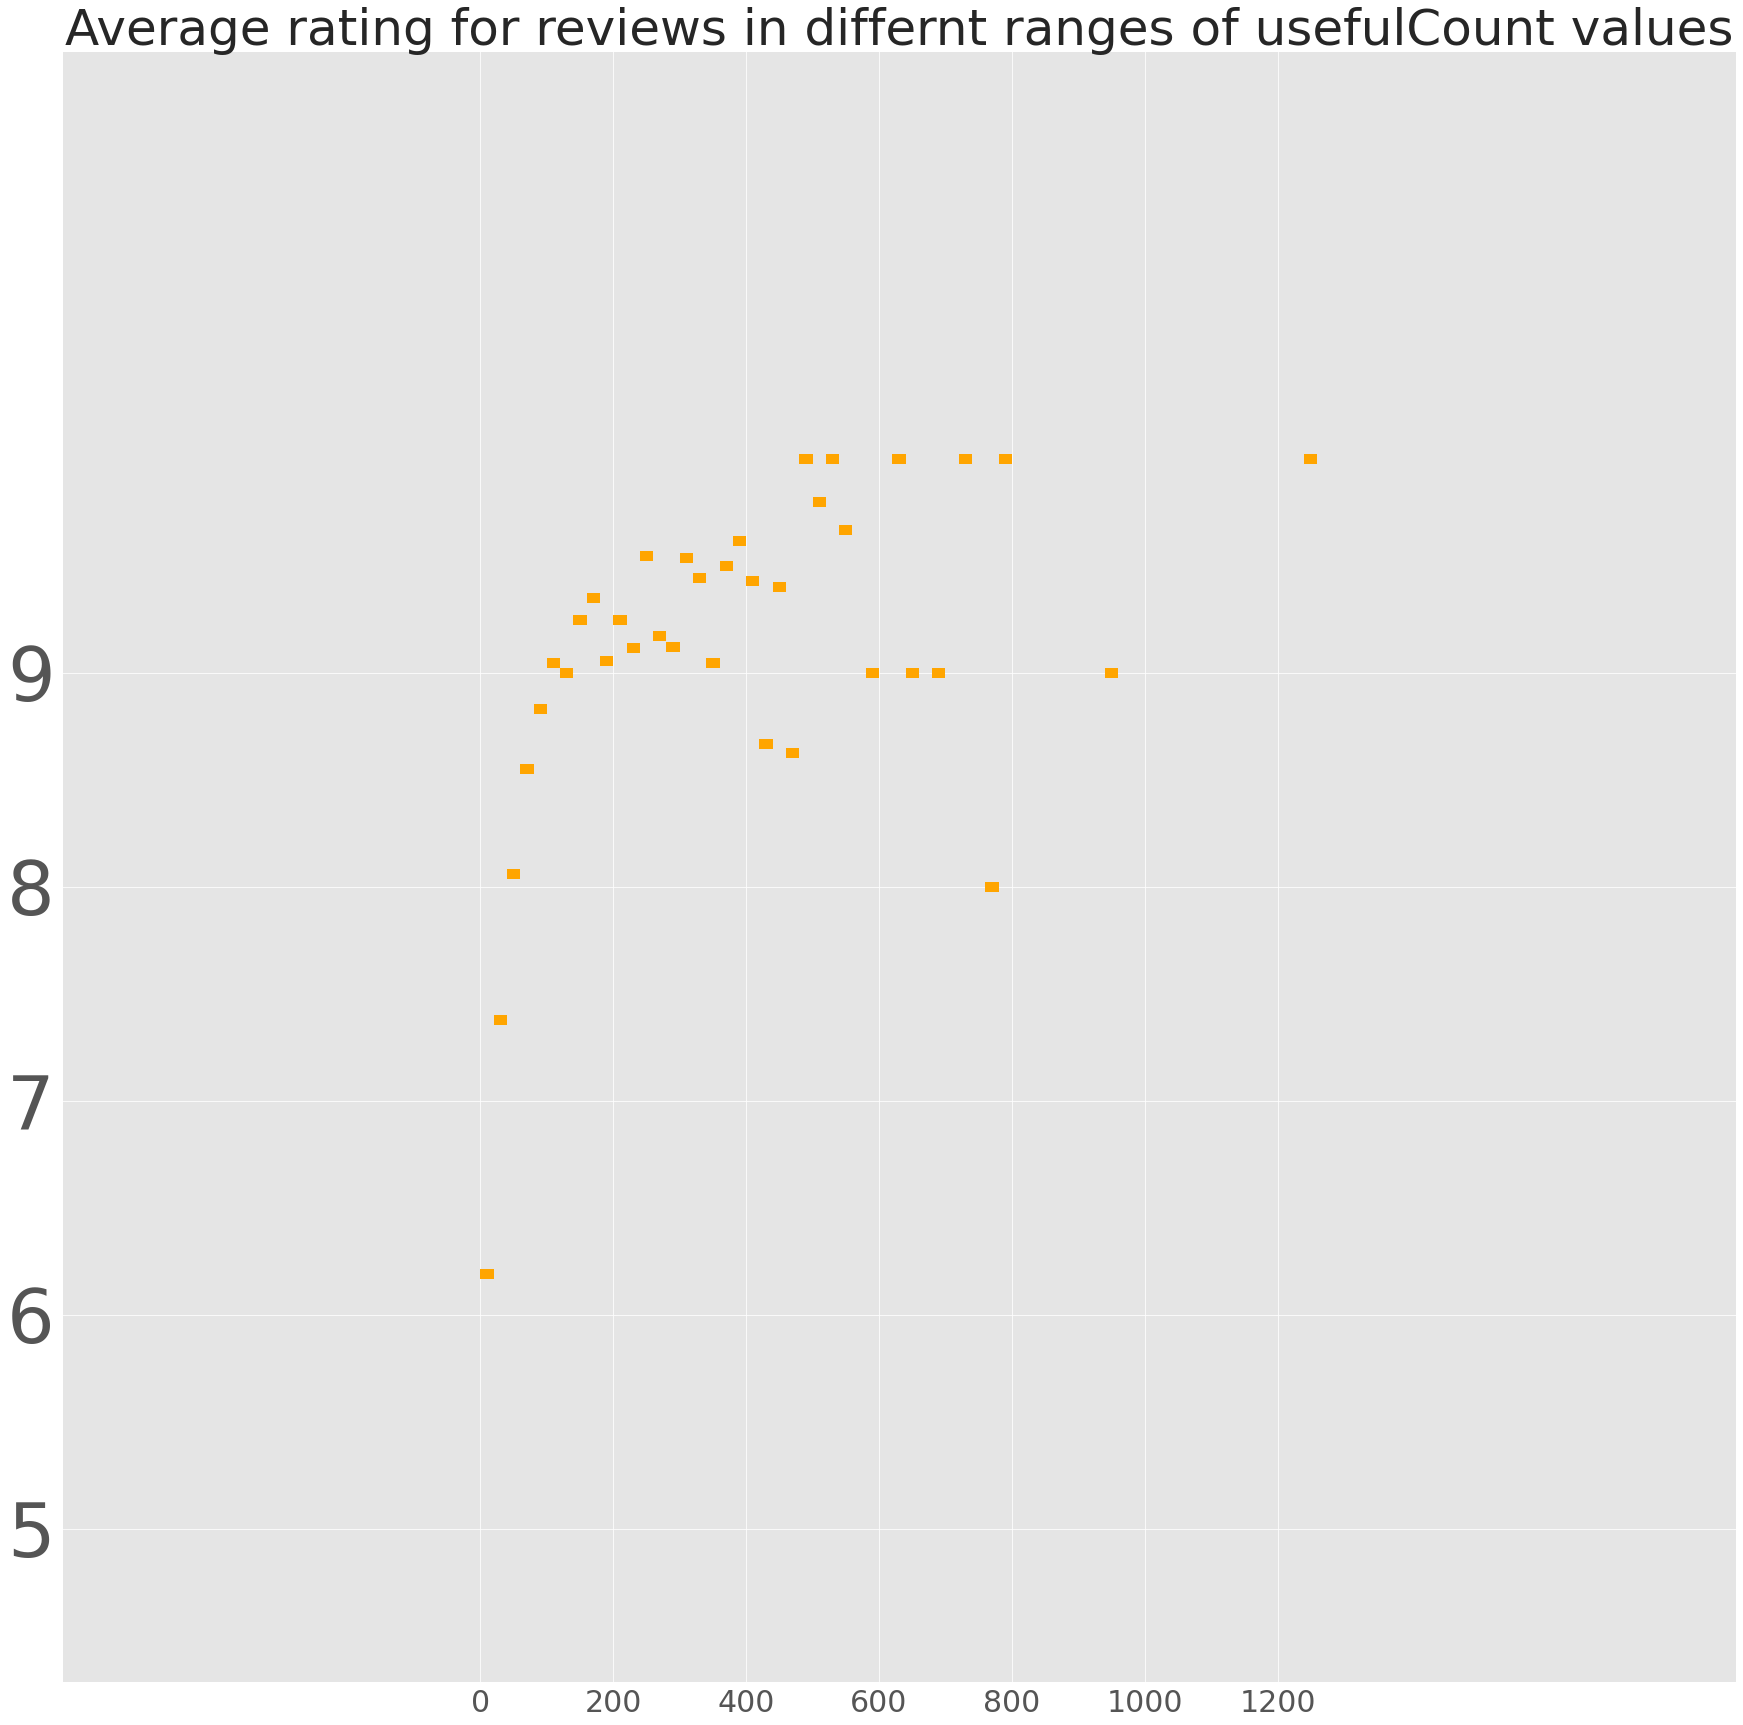

In [958]:
for i in range(20, 1300, 20):
   # print("range", i-20, "" ,i)
   # print(len(train[(train['usefulCount'] > (i-20)) & (train['usefulCount'] < i)]))
   # print("average rating")
   # print(train[(train['usefulCount'] > (i-20)) & (train['usefulCount'] < i)]['rating'].mean())
    avg_rating = train[(train['usefulCount'] > (i-20)) & (train['usefulCount'] < i)]['rating'].mean()
    plt.plot([i-20, i], [avg_rating, avg_rating], lw=10, color="orange", solid_capstyle="butt")#Setting capstyle to butt, because otherwise the length of the line is slightly longer, than required
plt.yticks(range(10))
plt.xticks(range(0, 1300, 200))
plt.margins(0.5)
plt.xticks(fontsize=30)
plt.yticks(fontsize=75)
plt.title('Average rating for reviews in differnt ranges of usefulCount values',fontsize=50)
#plt.title('Average rating for reviews in differnt ranges of usefulCount values')
plt.show()
plt.savefig('plot.png')  
plt.close()

# Majority of usefullCount are up to 120 with 4 ranges, 0-20, 20-40, 40-120, and more than 120

In [959]:
for i in range(20, 1300, 20):
    print(len(test[(test['usefulCount'] > (i-20)) & (test['usefulCount'] < i)]))

17949
6280
2864
1576
794
531
312
194
125
105
74
42
24
19
17
14
7
3
2
3
3
1
1
1
4
1
0
1
0
1
0
1
1
0
2
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [33]:
test["review complexity"] = test["review"].apply(lambda x: "Very short response" if len(x.split()) < 5 else "Medium response" if len(x.split()) > 5 and len(x.split()) < 75 else "Eleborate response" if len(x.split()) > 75 and len(x.split()) < 150 else "Very elaborate response")

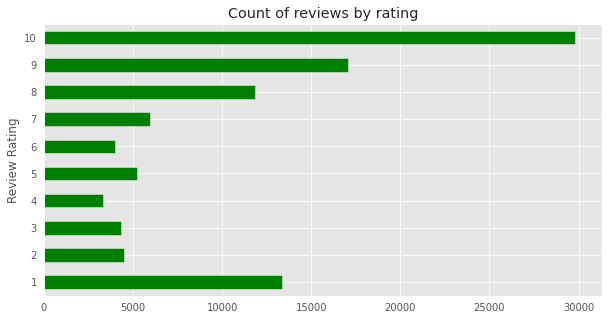

In [961]:
ax = train['rating'].value_counts().sort_index().plot(kind='barh',
                                                      title='Count of reviews by rating',
                                                      figsize=(10,5),
                                                      color='green')

ax.set_ylabel('Review Rating')
plt.show()

In [962]:
#train.to_csv("train_updayed.csv")

In [963]:
#test.to_csv("test_updayed.csv")

In [40]:
def clean(train):
    train.drop(['uniqueID', 'review', 'date', 'year'], inplace=True, axis=1)
    return train

In [966]:
train

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,how current it is,review complexity
0,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,15,current,Eleborate response
1,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,16,current,Eleborate response
2,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,15,current,Medium response
3,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,17,current,Medium response
4,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,15,current,Eleborate response
...,...,...,...,...,...,...,...,...,...,...
99465,121154,Venlafaxine,Panic Disorde,"""Had panic attacks and social anxiety starting...",9,10-Nov-16,25,16,current,Eleborate response
99466,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,17-Jul-16,33,16,current,Medium response
99467,132177,Ativan,Anxiety,"""I was super against taking medication. I&#039...",9,16-Aug-16,61,16,current,Eleborate response
99468,45410,Fluoxetine,Obsessive Compulsive Disorde,"""I have been off Prozac for about 4 weeks now....",8,21-Jan-15,22,15,current,Eleborate response


# Further examination and merge of drugs/conditions

In [977]:
train['rating'][train['rating'] < 4]

2        2
3        1
7        3
14       1
17       1
        ..
99452    3
99453    3
99460    1
99464    3
99466    2
Name: rating, Length: 22187, dtype: int64

In [978]:
train['rating'][(train['rating'] > 3) & (train['rating'] < 8)]

15       6
24       4
27       4
28       7
35       6
        ..
99442    4
99445    4
99446    5
99455    5
99459    6
Name: rating, Length: 18541, dtype: int64

In [979]:
train['rating'][train['rating'] > 7]

0         8
1         9
4        10
5         8
6         9
         ..
99463     9
99465     9
99467     9
99468     8
99469    10
Name: rating, Length: 58742, dtype: int64

In [34]:
train["rating range"] = train['rating'].apply(lambda x: 'low' if x < 4 else 'middle' if x > 3 and x < 8 else 'high')

In [35]:
train['usefulCount range'] = train['usefulCount'].apply(lambda x: 'low' if x < 20  else 'upper low' if x > 20 and x < 40  else 'middle' if x > 40 and x < 100 else 'high')

In [36]:
train['usefullness by rating'] = train['rating range'].astype(str) + " rating and " + train['usefulCount range'].astype(str) + " usefulCount"

In [37]:
train

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,how current it is,review complexity,rating range,usefulCount range,usefullness by rating
0,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,15,current,Eleborate response,high,low,high rating and low usefulCount
1,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,16,current,Eleborate response,high,upper low,high rating and upper low usefulCount
2,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,15,current,Medium response,low,middle,low rating and middle usefulCount
3,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,17,current,Medium response,low,low,low rating and low usefulCount
4,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,15,current,Eleborate response,high,upper low,high rating and upper low usefulCount
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99451,121154,Venlafaxine,Panic Disorde,"""Had panic attacks and social anxiety starting...",9,10-Nov-16,25,16,current,Eleborate response,high,upper low,high rating and upper low usefulCount
99452,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,17-Jul-16,33,16,current,Medium response,low,upper low,low rating and upper low usefulCount
99453,132177,Ativan,Anxiety,"""I was super against taking medication. I&#039...",9,16-Aug-16,61,16,current,Eleborate response,high,middle,high rating and middle usefulCount
99454,45410,Fluoxetine,Obsessive Compulsive Disorde,"""I have been off Prozac for about 4 weeks now....",8,21-Jan-15,22,15,current,Eleborate response,high,upper low,high rating and upper low usefulCount


In [38]:
train['usefullness by rating'].value_counts()

high rating and low usefulCount            27599
low rating and low usefulCount             16902
high rating and middle usefulCount         13229
middle rating and low usefulCount          13071
high rating and upper low usefulCount      12354
high rating and high usefulCount            5553
low rating and upper low usefulCount        3276
middle rating and upper low usefulCount     3146
middle rating and middle usefulCount        1733
low rating and middle usefulCount           1455
middle rating and high usefulCount           609
low rating and high usefulCount              529
Name: usefullness by rating, dtype: int64

In [41]:
train = clean(train)

In [986]:
#train = pd.get_dummies(train)

In [52]:
from sklearn.model_selection import train_test_split

In [988]:
#y = train['rating']
#X = train.drop(['rating'], axis=1)

In [989]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [990]:
#X_train = X_train.values
#X_test = X_test.values
#y_train = y_train.values
#y_test = y_test.values

In [991]:
train

,drugName,condition,rating,usefulCount,how current it is,review complexity,rating range,usefulCount range,usefullness by rating
0,Ortho Evra,Birth Control,8,10,current,Eleborate response,high,low,high rating and low usefulCount
1,Buprenorphine / naloxone,Opiate Dependence,9,37,current,Eleborate response,high,upper low,high rating and upper low usefulCount
2,Cialis,Benign Prostatic Hyperplasia,2,43,current,Medium response,low,middle,low rating and middle usefulCount
3,Levonorgestrel,Emergency Contraception,1,5,current,Medium response,low,low,low rating and low usefulCount
4,Aripiprazole,Bipolar Disorde,10,32,current,Eleborate response,high,upper low,high rating and upper low usefulCount
...,...,...,...,...,...,...,...,...,...
99465,Venlafaxine,Panic Disorde,9,25,current,Eleborate response,high,upper low,high rating and upper low usefulCount
99466,Vortioxetine,Depression,2,33,current,Medium response,low,upper low,low rating and upper low usefulCount
99467,Ativan,Anxiety,9,61,current,Eleborate response,high,middle,high rating and middle usefulCount
99468,Fluoxetine,Obsessive Compulsive Disorde,8,22,current,Eleborate response,high,upper low,high rating and upper low usefulCount


In [43]:
import scipy.stats

In [42]:
y = train['rating']
X = train.drop(['rating'], axis=1)

# Skewed features

In [44]:
skew_df = pd.DataFrame(X.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(X[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,usefulCount,5.379637,5.379637,True


In [45]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    X[column] = np.log1p(X[column])

In [46]:
X = pd.get_dummies(X)

In [997]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


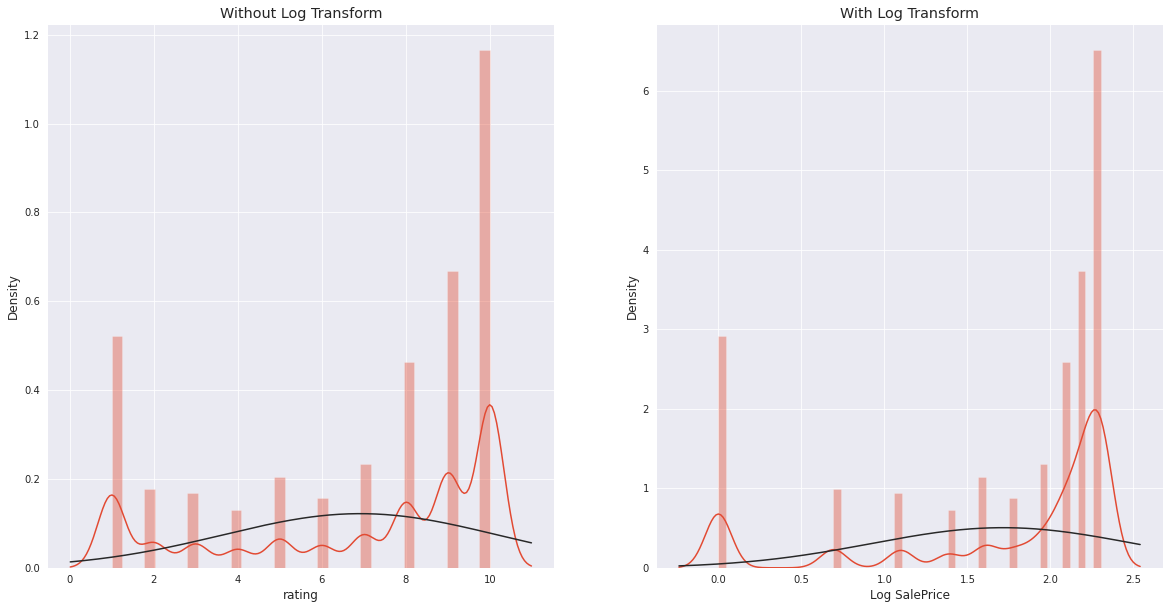

In [998]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.distplot(y, kde=True, fit=scipy.stats.norm)
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(y), kde=True, fit=scipy.stats.norm)
plt.xlabel("Log SalePrice")
plt.title("With Log Transform")

plt.show()

# Scalling

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
scaler.fit(X)

X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)

In [1001]:
X

,usefulCount,drugName_Abilify,drugName_Abreva,drugName_Accutane,drugName_Acetaminophen / hydrocodone,drugName_Acetaminophen / oxycodone,drugName_Adalimumab,drugName_Adapalene,drugName_Adapalene / benzoyl peroxide,drugName_Adderall,...,usefullness by rating_high rating and middle usefulCount,usefullness by rating_high rating and upper low usefulCount,usefullness by rating_low rating and high usefulCount,usefullness by rating_low rating and low usefulCount,usefullness by rating_low rating and middle usefulCount,usefullness by rating_low rating and upper low usefulCount,usefullness by rating_middle rating and high usefulCount,usefullness by rating_middle rating and low usefulCount,usefullness by rating_middle rating and middle usefulCount,usefullness by rating_middle rating and upper low usefulCount
0,-0.252883,-0.063701,-0.039887,-0.057431,-0.07072,-0.059932,-0.037002,-0.042101,-0.063302,-0.043631,...,-0.392101,-0.376787,-0.07319,-0.452555,-0.122051,-0.184892,-0.078552,-0.388407,-0.133276,-0.181019
1,0.777147,-0.063701,-0.039887,-0.057431,-0.07072,-0.059932,-0.037002,-0.042101,-0.063302,-0.043631,...,-0.392101,2.654021,-0.07319,-0.452555,-0.122051,-0.184892,-0.078552,-0.388407,-0.133276,-0.181019
2,0.898957,-0.063701,-0.039887,-0.057431,-0.07072,-0.059932,-0.037002,-0.042101,-0.063302,-0.043631,...,-0.392101,-0.376787,-0.07319,-0.452555,8.193298,-0.184892,-0.078552,-0.388407,-0.133276,-0.181019
3,-0.756507,-0.063701,-0.039887,-0.057431,-0.07072,-0.059932,-0.037002,-0.042101,-0.063302,-0.043631,...,-0.392101,-0.376787,-0.07319,2.209676,-0.122051,-0.184892,-0.078552,-0.388407,-0.133276,-0.181019
4,0.659928,-0.063701,-0.039887,-0.057431,-0.07072,-0.059932,-0.037002,-0.042101,-0.063302,-0.043631,...,-0.392101,2.654021,-0.07319,-0.452555,-0.122051,-0.184892,-0.078552,-0.388407,-0.133276,-0.181019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99465,0.461838,-0.063701,-0.039887,-0.057431,-0.07072,-0.059932,-0.037002,-0.042101,-0.063302,-0.043631,...,-0.392101,2.654021,-0.07319,-0.452555,-0.122051,-0.184892,-0.078552,-0.388407,-0.133276,-0.181019
99466,0.684733,-0.063701,-0.039887,-0.057431,-0.07072,-0.059932,-0.037002,-0.042101,-0.063302,-0.043631,...,-0.392101,-0.376787,-0.07319,-0.452555,-0.122051,5.408552,-0.078552,-0.388407,-0.133276,-0.181019
99467,1.183902,-0.063701,-0.039887,-0.057431,-0.07072,-0.059932,-0.037002,-0.042101,-0.063302,-0.043631,...,2.550360,-0.376787,-0.07319,-0.452555,-0.122051,-0.184892,-0.078552,-0.388407,-0.133276,-0.181019
99468,0.359971,-0.063701,-0.039887,-0.057431,-0.07072,-0.059932,-0.037002,-0.042101,-0.063302,-0.043631,...,-0.392101,2.654021,-0.07319,-0.452555,-0.122051,-0.184892,-0.078552,-0.388407,-0.133276,-0.181019


In [1002]:
y

0         8
1         9
2         2
3         1
4        10
         ..
99465     9
99466     2
99467     9
99468     8
99469    10
Name: rating, Length: 99470, dtype: int64

In [1003]:
test

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,how current it is,review complexity
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,12,more distant,Medium response
1,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,17,current,Very short response
2,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,17,current,Eleborate response
3,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,6-Jun-16,1,16,current,Eleborate response
4,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,21-Apr-09,32,09,very distant,Medium response
...,...,...,...,...,...,...,...,...,...,...
33183,33495,Microgestin Fe 1 / 20,Birth Control,"""I was on Microgestin for about 3 years. Over ...",6,1-Aug-14,15,14,more distant,Eleborate response
33184,123432,Apri,Birth Control,"""I started taking Apri about 7 months ago. My ...",9,25-Aug-10,18,10,very distant,Eleborate response
33185,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11,16,current,Eleborate response
33186,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7,10,very distant,Eleborate response


In [50]:
test["rating range"] = test['rating'].apply(lambda x: 'low' if x < 4 else 'middle' if x > 3 and x < 8 else 'high')
test['usefulCount range'] = test['usefulCount'].apply(lambda x: 'low' if x < 20  else 'upper low' if x > 20 and x < 40  else 'middle' if x > 40 and x < 100 else 'high')
test['usefullness by rating'] = test['rating range'].astype(str) + " rating and " + train['usefulCount range'].astype(str) + " usefulCount"

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=109)

In [1008]:
import catboost as ctb

In [1009]:
#model_CBC = ctb.CatBoostClassifier(verbose=False)
#model_CBC.fit(X_train, y_train)

In [1010]:
from sklearn import metrics

In [1011]:
#expected_y  = y_val
#predicted_y = model_CBC.predict(X_val)

In [1012]:
#print(metrics.classification_report(expected_y, predicted_y))
#print(metrics.confusion_matrix(expected_y, predicted_y))

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import load_wine
import optuna
from optuna.samplers import TPESampler
import catboost
import pickle


In [1016]:
# def objective(trial):
#     model = catboost.CatBoostClassifier(
#         iterations=trial.suggest_int("iterations", 100, 1000),
#         learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
#         depth=trial.suggest_int("depth", 4, 10),
#         l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
#         bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
#         random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
#         bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
#         od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
#         od_wait=trial.suggest_int("od_wait", 10, 50),
#         verbose=False
#     )
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_val)
#     return accuracy_score(y_val, y_pred)


In [1017]:
# optuna.logging.set_verbosity(optuna.logging.WARNING)

# sampler = TPESampler(seed=1)
# study = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
# study.optimize(objective, n_trials=20)


In [1018]:
# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial
# print("  Value: ", trial.value)
# print("  Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))


In [1019]:
# model_catboost = catboost.CatBoostClassifier(**trial.params, verbose=False)
# model_catboost.fit(X_train, y_train)
# expected_y  = y_val
# predicted_y = model_catboost.predict(X_val)


In [1022]:
#trial.params

In [1024]:
from xgboost import XGBClassifier

In [1025]:
# def objective_XGBoost(trial):
#     """Define the objective function"""

#     params = {
#         'max_depth': trial.suggest_int('max_depth', 1, 9),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
#         'n_estimators': trial.suggest_int('n_estimators', 50, 500),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
#         'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
#         'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
#         'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
#         'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
#         'eval_metric': 'mlogloss',
#         'use_label_encoder': False
#     }

#     # Fit the model
#     optuna_model = XGBClassifier(**params)
#     optuna_model.fit(X_train, y_train)

#     # Make predictions
#     y_pred = optuna_model.predict(X_val)

#     # Evaluate predictions
#     accuracy = accuracy_score(y_val, y_pred)
#     return accuracy


In [1026]:
#study = optuna.create_study(direction='maximize')


In [1027]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)

In [1028]:
#study.optimize(objective_XGBoost, n_trials=20)


In [1029]:
#y_val = le.fit_transform(y_val)

In [1030]:
# print('Number of finished trials: {}'.format(len(study.trials)))
# print('Best trial:')
# trial = study.best_trial

# print('  Value: {}'.format(trial.value))
# print('  Params: ')

# for key, value in trial.params.items():
#     print('    {}: {}'.format(key, value))


In [1031]:
# params = trial.params

# model_XGB = XGBClassifier(**params)
# model_XGB.fit(X_train, y_train)
# y_pred = model_XGB.predict(X_val)


In [55]:
loaded_model = pickle.load(open('/kaggle/input/xgbmodel/XGB_model.pkl', 'rb'))
result = loaded_model.score(X_val, y_val)
print(result)

0.2131510154836115


In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_val = le.fit_transform(y_val)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       900
           2       0.44      0.02      0.04       832
           3       0.67      0.01      0.01       691
           4       0.34      0.48      0.40      1047
           5       0.00      0.00      0.00       799
           6       0.37      0.68      0.48      1204
           7       0.00      0.00      0.00      2307
           8       0.00      0.00      0.00      3413
           9       0.51      1.00      0.68      6006
          10       0.00      0.00      0.00         0

   micro avg       0.47      0.43      0.45     17199
   macro avg       0.23      0.22      0.16     17199
weighted avg       0.27      0.43      0.30     17199



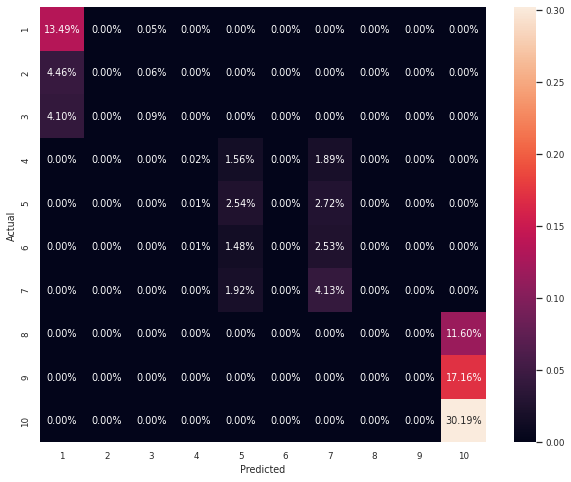

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, f1_score
preds = loaded_model.predict(X_val)
plt.rc('figure', figsize=(10, 8))

cf_matrix = confusion_matrix(y_val, preds)
class_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
sns.set(font_scale=0.8) # Adjust to fit
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,  fmt='.2%', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted');

from sklearn.metrics import classification_report
print(classification_report(y_val, preds, target_names=class_names, labels=[1,2,3,4,5,6,7,8,9,10]))

In [68]:
catboost = pickle.load(open('/kaggle/input/catboost/catboost_model.pkl', 'rb'))
result = catboost.score(X_val, y_val)
print(result)

0.5278503921174341


              precision    recall  f1-score   support

           1       0.63      0.99      0.77      2693
           2       0.95      0.02      0.04       900
           3       0.49      0.10      0.16       832
           4       0.65      0.04      0.07       691
           5       0.37      0.60      0.46      1047
           6       0.55      0.08      0.14       799
           7       0.42      0.67      0.52      1204
           8       0.56      0.04      0.07      2307
           9       0.44      0.12      0.19      3413
          10       0.54      0.96      0.69      6006

    accuracy                           0.53     19892
   macro avg       0.56      0.36      0.31     19892
weighted avg       0.54      0.53      0.42     19892



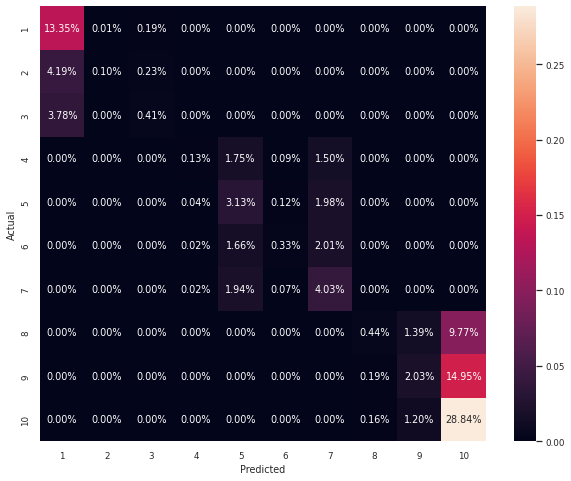

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, f1_score
preds = catboost.predict(X_val)

cf_matrix = confusion_matrix(y_val, preds)
class_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
sns.set(font_scale=0.8) # Adjust to fit

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,  fmt='.2%', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted');

from sklearn.metrics import classification_report
print(classification_report(y_val, preds, target_names=class_names, labels=[1,2,3,4,5,6,7,8,9,10]))